In [1]:
# importing all the libraries
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',81)
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC , LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

In [2]:
train = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Data_Train.xlsx')
test = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Data_Test.xlsx')
submission = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Sample_Submission.xlsx')


In [3]:
print(train.shape)
print(test.shape)
print(submission.shape)

(6237, 9)
(1560, 8)
(1560, 1)


In [4]:
target = train['Price']
train = train.drop(['Price'],axis=1)

In [5]:
df = pd.concat([train,test],axis=0).reset_index(drop=True)

In [6]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography"


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         6237 non-null   object
 1   Author        6237 non-null   object
 2   Edition       6237 non-null   object
 3   Reviews       6237 non-null   object
 4   Ratings       6237 non-null   object
 5   Synopsis      6237 non-null   object
 6   Genre         6237 non-null   object
 7   BookCategory  6237 non-null   object
dtypes: object(8)
memory usage: 389.9+ KB


In [8]:
train.describe()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,6237,6237,6237,6237,6237,6237,6237,6237
unique,5568,3679,3370,36,342,5549,345,11
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure
freq,4,69,48,1375,1040,8,947,818


# Title

In [9]:
len(train['Title'].unique())

5568

In [10]:
train['Title'].value_counts()

Casino Royale: James Bond 007 (Vintage)                       4
A Game of Thrones (A Song of Ice and Fire)                    4
Sidemen: The Book: The book you've been waiting for           3
How to Write Movie in 21 Days                                 3
The Andromeda Strain                                          3
                                                             ..
Tales of Arjuna (Amar Chitra Katha)                           1
The Midnight Rose                                             1
They Call Me Coach                                            1
Thea Stilton Graphic Novels #2: Revenge of the Lizard Club    1
The First Order (Sam Capra)                                   1
Name: Title, Length: 5568, dtype: int64

In [11]:
for i in train['Title'].value_counts():
    print(i)

4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [12]:
# groped_Title = train.groupby('Title').agg({'Price': ['mean', 'min', 'max']})
# print(groped_Title)

In [13]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='bookprice.html')

# Author

In [14]:
df['Author'].value_counts()

Agatha Christie       87
Ladybird              63
DK                    61
Albert Uderzo         48
Nora Roberts          40
                      ..
Steve Waugh            1
Desh Gaurav Sekhri     1
James Victore          1
Riyaz Tayyibji         1
Heinz Guderian         1
Name: Author, Length: 4372, dtype: int64

In [15]:
# groped_Author = train.groupby('Author').agg({'Price': ['mean', 'min', 'max']})
# print(groped_Author)

In [16]:
#groped_Author.head(20)

# Edition 

In [17]:
df['Edition'].value_counts()

Paperback,– 5 Oct 2017                 60
Paperback,– 2016                       58
Paperback,– 2017                       47
Paperback,– 2019                       37
Paperback,– 2013                       35
                                       ..
Paperback,– May 2016                    1
Mass Market Paperback,– 29 Jul 2014     1
Paperback,– 5 Jun 2019                  1
Hardcover,– 18 Jan 2018                 1
Paperback,– 16 Sep 2016                 1
Name: Edition, Length: 3882, dtype: int64

In [18]:
df['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Hardcover,– 11 Apr 2017',
       'Paperback,– 2 Jul 1999', 'Paperback,– 16 Sep 2016'], dtype=object)

In [19]:
import re

In [20]:
editionYear = []

for value in df['Edition']:
    year = re.findall('(\d{4})',value)
    
    if len(year)!=0:
        editionYear.append(year[0])
    else:
        editionYear.append('1997')
    

In [21]:
type(editionYear)

list

In [22]:
len(editionYear)

7797

In [23]:
df['Edition_Year'] = editionYear

In [24]:
df['Edition_Year'].value_counts()

2018    1018
2017     930
2016     835
2015     639
2014     503
2013     463
2019     457
2012     367
2011     356
2010     306
2009     234
2008     204
2005     165
2006     139
2007     131
2003     119
2004     108
2002      83
2000      83
2001      80
1997      76
1999      54
1995      41
1998      39
1996      39
1994      39
1992      38
1991      26
1993      26
1989      24
1986      18
1990      18
1984      18
1987      17
1988      15
1982      14
1985      12
1983      10
1976       9
1980       7
1971       5
1975       4
1960       3
1979       3
1977       3
1964       3
1974       3
1978       2
1981       2
1961       1
1942       1
1973       1
1925       1
1969       1
1900       1
1905       1
1970       1
1972       1
Name: Edition_Year, dtype: int64

In [25]:
review = []

for value in df['Reviews']:
    rev = re.findall('(\d+\.\d+)',value)
    #print(rev)
    review.append(rev[0])

In [26]:
df['Review_New'] = review

In [27]:
df['Review_New'].value_counts()

5.0    1751
4.0     713
4.5     626
4.6     491
4.4     488
4.3     450
4.7     412
4.2     406
4.1     381
3.9     300
4.8     272
3.8     239
3.7     203
3.0     176
3.6     145
3.5     143
4.9      99
3.4      92
3.3      74
1.0      65
3.1      57
3.2      50
2.0      44
2.9      36
2.5      23
2.7      18
2.8      12
2.3       7
1.5       6
2.4       5
2.6       5
2.2       3
1.4       2
1.7       1
1.6       1
2.1       1
Name: Review_New, dtype: int64

In [28]:
df['Ratings'].value_counts()

1 customer review         1328
2 customer reviews         886
3 customer reviews         613
4 customer reviews         444
5 customer reviews         379
                          ... 
1,227 customer reviews       1
337 customer reviews         1
973 customer reviews         1
310 customer reviews         1
531 customer reviews         1
Name: Ratings, Length: 368, dtype: int64

In [29]:
rating = []

for value in df['Ratings']:
    rev = re.findall(r'\d+',value)
    out = [int(match.replace(',', '')) for match in re.findall('[\d,]+', value)]
    #print(out)
    rating.append(out[0])

In [30]:
df['Ratings_New'] = rating

In [31]:
df['Ratings_New'].value_counts()

1       1328
2        886
3        613
4        444
5        379
        ... 
1227       1
337        1
973        1
310        1
531        1
Name: Ratings_New, Length: 368, dtype: int64

In [32]:
df['Synopsis'].value_counts()

A Tinkle Double Digest is two Tinkle Digests in one volume. These include the best stories of Tinkle over the years.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [33]:
for col in df['Genre'].value_counts():
    print(col)

1183
517
463
335
325
244
234
145
120
119
98
94
92
92
92
88
84
83
82
82
80
80
80
76
71
66
64
61
59
52
50
49
48
47
47
46
44
43
41
40
40
39
35
35
34
33
29
28
27
25
25
25
25
25
24
24
24
23
23
22
22
22
21
21
21
21
19
19
18
18
17
17
16
16
16
16
15
15
15
15
14
14
14
13
13
13
12
12
12
12
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [34]:
genre_dict= {}
for i,j in df['Genre'].value_counts().items():
        #print(i,j)
        print(j)
        
        if j>=10:
            genre_dict[i] = i
        else:
            genre_dict[i] = 'other'

1183
517
463
335
325
244
234
145
120
119
98
94
92
92
92
88
84
83
82
82
80
80
80
76
71
66
64
61
59
52
50
49
48
47
47
46
44
43
41
40
40
39
35
35
34
33
29
28
27
25
25
25
25
25
24
24
24
23
23
22
22
22
21
21
21
21
19
19
18
18
17
17
16
16
16
16
15
15
15
15
14
14
14
13
13
13
12
12
12
12
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [35]:
genre_dict

{'Action & Adventure (Books)': 'Action & Adventure (Books)',
 'Romance (Books)': 'Romance (Books)',
 'Biographies & Autobiographies (Books)': 'Biographies & Autobiographies (Books)',
 'Crime, Thriller & Mystery (Books)': 'Crime, Thriller & Mystery (Books)',
 'Contemporary Fiction (Books)': 'Contemporary Fiction (Books)',
 'Comics & Mangas (Books)': 'Comics & Mangas (Books)',
 'Mangas': 'Mangas',
 'Music Books': 'Music Books',
 'Design': 'Design',
 'Humour (Books)': 'Humour (Books)',
 'Dictionaries': 'Dictionaries',
 'Indian Writing (Books)': 'Indian Writing (Books)',
 'Cinema & Broadcast (Books)': 'Cinema & Broadcast (Books)',
 'Handicrafts, Decorative Arts & Crafts (Books)': 'Handicrafts, Decorative Arts & Crafts (Books)',
 'Arts History, Theory & Criticism (Books)': 'Arts History, Theory & Criticism (Books)',
 'Computer Science Books': 'Computer Science Books',
 'True Accounts (Books)': 'True Accounts (Books)',
 'Healthy Living & Wellness (Books)': 'Healthy Living & Wellness (Books)'

In [36]:
df['New_Genre'] = df['Genre'].map(genre_dict)

In [37]:
df['New_Genre'].value_counts()

Action & Adventure (Books)               1183
other                                     828
Romance (Books)                           517
Biographies & Autobiographies (Books)     463
Crime, Thriller & Mystery (Books)         335
                                         ... 
Vocabulary Books                           10
Literature Encyclopedias                   10
Golf (Books)                               10
History & Surveys                          10
Earth Sciences Textbooks                   10
Name: New_Genre, Length: 110, dtype: int64

In [38]:
df['BookCategory'].value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

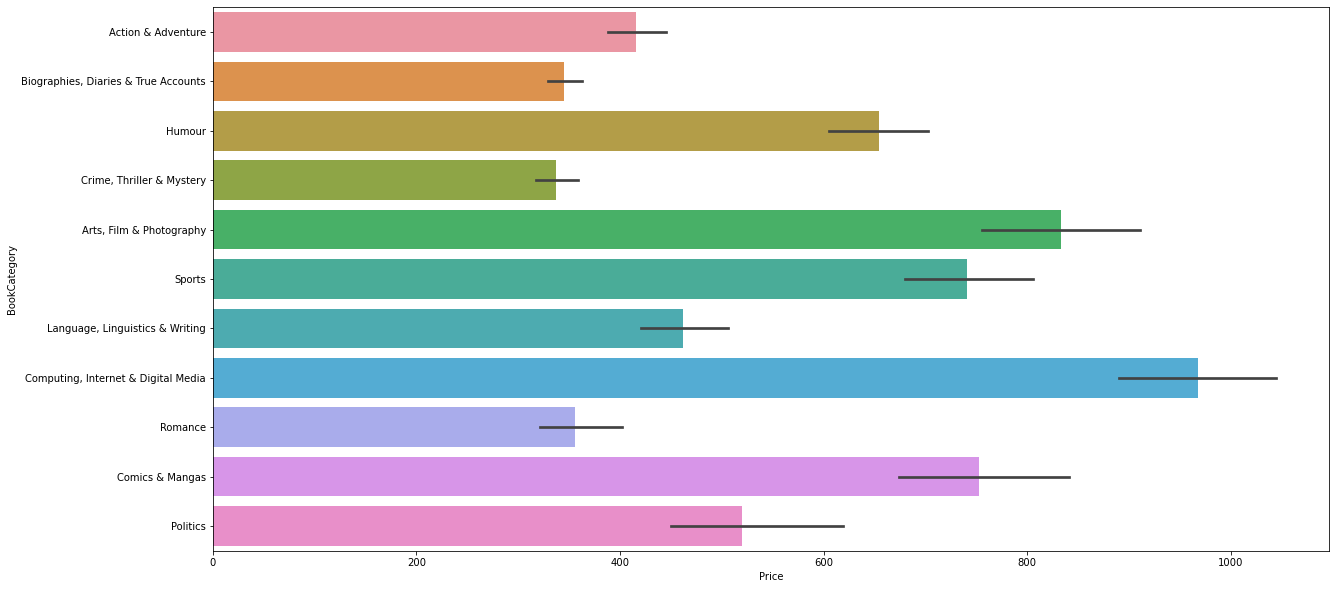

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['BookCategory'],x=target)
plt.show()

<AxesSubplot:>

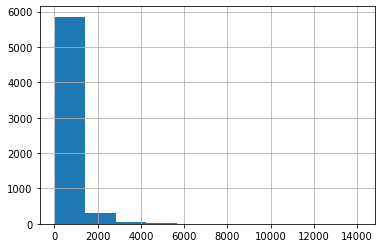

In [40]:
target.hist()

In [41]:
for i,j in df['Author'].value_counts().items():
    print(i,j)

Agatha Christie 87
Ladybird 63
DK 61
Albert Uderzo 48
Nora Roberts 40
Herge 40
James Patterson 39
Bill Watterson 36
John Grisham 34
Sidney Sheldon 33
P.G. Wodehouse 33
Clive Cussler 30
Sophie Kinsella 27
David Baldacci 26
Stephen King 26
Wilbur Smith 26
Danielle Steel 25
Lee Child 25
George R.R. Martin 23
Jeffrey Archer 22
Frederick Forsyth 21
Louis L'Amour 21
Oliver Bowden 20
Dreamland Publications 20
Matthew Reilly 19
Michael Crichton 19
Akira Toriyama 19
Ruskin Bond 18
Geronimo Stilton 17
René Goscinny, Albert Uderzo 17
Neil Gaiman 17
Various 16
Robert Ludlum 16
James Rollins 15
Oxford Dictionaries 15
Dan Brown 15
Ken Follett 15
Alistair MacLean 15
Novoneel Chakraborty 14
Haruki Murakami 14
J.K. Rowling 14
Daniel Silva 14
Jim Davis 14
Trinity College Lond 14
Ian Fleming 13
Kohei Horikoshi 13
Masashi Kishimoto 13
Luca Caioli 13
Dav Pilkey 13
Cecelia Ahern 12
Ernest Hemingway 12
Bill Bryson 12
Eiichiro Oda 12
Michael Connelly 12
National Geographic 12
Julia Donaldson 11
Anant Pai 11
C

Daniel silva 1
Sam Harris 1
Tetsuko Kuroyanagi 1
Arianna Huffington 1
George Mumford 1
B. Raman 1
Anna MM Vetticad 1
Parag Khanna 1
Mike Tyson 1
Garrett Grolemund 1
Peter Van Ham 1
Trenton Lee Stewart 1
Paul Terry 1
Mahalekshmi T 1
Cory O'Brien 1
Dr Prem Motwani, Noriko Masukawa 1
S P Dhanavel 1
Garth Jones 1
Ian Jack 1
Nivedita Menon 1
Yvon Chouinard 1
Xun Liu 1
Austin Granville 1
Ushinor Majumdar 1
Mau-Kun Yim 1
Gerry Spence 1
Alexandra Bracken 1
Anand Gopal 1
Ryan North 1
Kuldeep Nayar 1
Paul Kennedy 1
Ruth Gairns & Stuart Redmanidea 1
Tristan Gooley 1
Mark Masse 1
Stephen Book 1
Yash Birla 1
Jung Chang 1
Yana Toboso 1
Milan Vaishnav 1
Kalpana Swaminathan 1
Charu C. Aggarwal 1
Mike Ellis 1
Kevin Hearne 1
Greg McGee 1
Heartin Kanikathottu 1
Alison Bechdel 1
Anshul Dupare 1
Melanie Morgan, Steven Butler 1
Nancy Stearns Bercaw 1
Elspeth Beard 1
M A Yadugiri 1
Ernst Neufert 1
Rajendra Prasad 1
Rekha Diwakar 1
Jaydip Sarkar, Anindya Bhattacharya 1
Echo Bodine 1
Andrie de Vries, Joris Mey

Michael Janes, Daniele Bourdais, Sue Finnie 1
Jeff Hawkins 1
Souvik Bhadra, Pingal Khan 1
Sam Lake 1
Charles Severance, Mauro Toselli 1
Rajiv Dogra 1
Darynda Jones 1
M. Rajaram 1
CD Projekt Red 1
Aaron Horschig 1
Katharina Kakar 1
Raphael Honigstein 1
Andreas Muller 1
Steve Alten 1
Ian Marshall 1
Naren Yellavula 1
Stephen Wildish 1
Charles Seife 1
George Watsky 1
Virginia Woolf 1
Beck Weathers 1
Elmore Leonard 1
Durgabai Vyam 1
Bob Dylan 1
Jason Koop, Jim Rutberg 1
Sukesh Marla 1
Jeff Kinney 1
Steven S Skiena 1
Gojko Adzic 1
Robert Hine 1
S.L. Bhyrappa, L.V. Shanthakumari 1
Manash Firaq Bhattacharjee 1
Bhawna Saxena, RPH Editorial Board 1
Dean Pohlman 1
Loretta Chase 1
Kevin Mitnick, Robert Vamosi, Mikko Hypponen 1
Patrick O'Brian 1
C.K. Nagpal 1
Rod Judkins 1
Ramesh Singh 1
Kevin P. Murphy 1
Ian Christie 1
Bill Gates 1
Felicia Day 1
Steven Bird 1
Petra-Andrea Hinz 1
Lindsay Adler 1
Cody Franklin 1
Anjali Hooda Sangwan 1
Jess Walter 1
Warwick Jessup 1
Julian Barnes 1
Andrea Pirlo 1
Lea

Azad A.K. 1
Alan Francis 1
Dr Sandesh Mayekar 1
Abhay Narayan Sapru 1
A J Hoge 1
Jeff Vander Meer 1
Terry Hayes 1
J. P. Dalvi 1
Samah Visaria 1
Murasaki Shikibu 1
Katarina Bivald 1
James Stern 1
Alison Reid 1
Barrington Barber 1
David R Kalvitis 1
Bose Sisir K., Bose Sugata 1
Barker J.D. 1
K. Neihsial, 2 1
Alfred V. Aho 1
Parthesh Thakkar 1
André Béteille 1
Niall Kishtainy 1
Jr George H. Gadbois 1
M.H. Abrams, Geoffrey Galt Harpham 1
Estelle Maskame 1
Susan Stephens 1
Kirsty Thathapudi 1
Himanshu Rai 1
Neha Narkhede 1
Dave Dowling 1
Nalini Singh 1
Shweta Taneja 1
Arihant Experts 1
Judea Pearl 1
Abhimanyu Singh Sisodia, Sachin Nagar 1
Sophie Jordan 1
Laura Brandenburg 1
Paul Roetert 1
A.K. Thakur 1
Akira Higashiyama 1
Ravi Dabral 1
Mark Lauren 1
Kevin Hart 1
Leah Bendavid-Val 1
R. Champakalakshmi 1
Doguhan Uluca 1
Dan,Lester, Phil Howell 1
Roderick Hunt 1
S Meenakshi Ammal 1
David Kahn 1
Rahul Pandita 1
George, Weedon Grossmith 1
Graham Hunter 1
Charles Barry Townsend 1
Abbi Glines 1
Pi

In [42]:
df['Title'].value_counts()

Casino Royale: James Bond 007 (Vintage)                                                                         4
The Elements of Style                                                                                           4
Doing Justice: A Prosecutor’s Thoughts on Crime, Punishment and the Rule of Law                                 4
Innovators: How a Group of Inventors, Hackers, Geniuses and Geeks Created the Digital Revolution                4
Sidemen: The Book: The book you've been waiting for                                                             4
                                                                                                               ..
Practice Makes Perfect (Berkley Sensation)                                                                      1
The Last Ball Six                                                                                               1
Things I Want My Daughters to Know                                                      

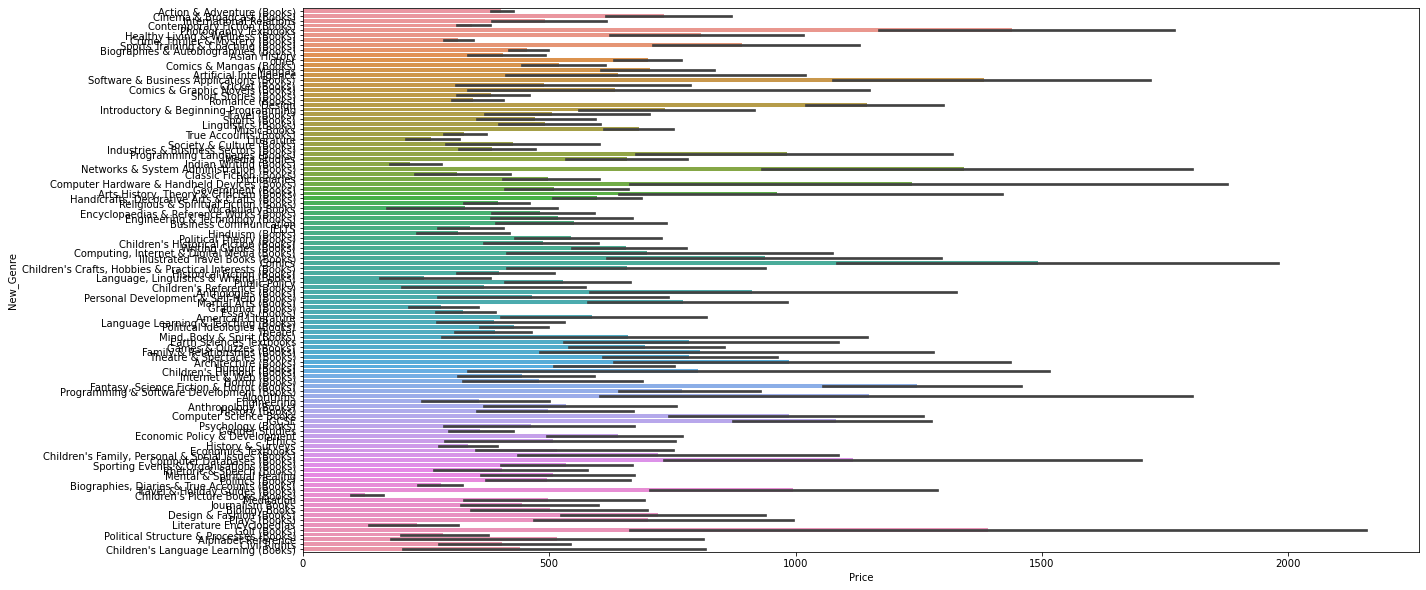

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['New_Genre'],x=target)
plt.show()

In [44]:
df['Edition_Year'] = pd.to_numeric(df['Edition_Year'])
df['Review_New'] = pd.to_numeric(df['Review_New'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Reviews       7797 non-null   object 
 4   Ratings       7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Edition_Year  7797 non-null   int64  
 9   Review_New    7797 non-null   float64
 10  Ratings_New   7797 non-null   int64  
 11  New_Genre     7797 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 731.1+ KB


<AxesSubplot:xlabel='Edition_Year', ylabel='Density'>

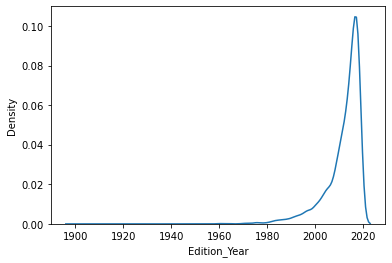

In [46]:
sns.kdeplot(df['Edition_Year'])

<AxesSubplot:xlabel='Review_New', ylabel='Density'>

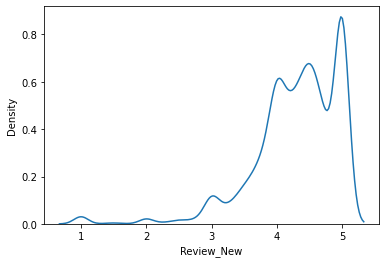

In [47]:
sns.kdeplot(df['Review_New'])

<AxesSubplot:xlabel='Ratings_New', ylabel='Density'>

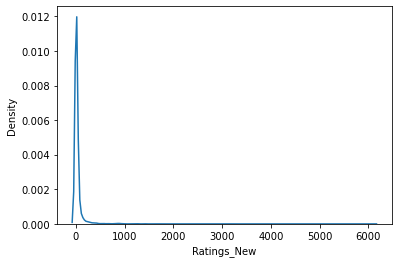

In [48]:
sns.kdeplot(df['Ratings_New'])

In [49]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Year,Review_New,Ratings_New,New_Genre
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,2016,4.0,8,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",2012,3.9,14,Cinema & Broadcast (Books)
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,1982,4.8,6,International Relations
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",2017,4.1,13,Contemporary Fiction (Books)
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",2006,5.0,1,Photography Textbooks


In [50]:
count_frequency_Title = df['Title'].value_counts().to_dict()
count_frequency_Author = df['Author'].value_counts().to_dict()


In [51]:
df['Title'] = df['Title'].map(count_frequency_Title)
df['Author'] = df['Author'].map(count_frequency_Author)

In [52]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Year,Review_New,Ratings_New,New_Genre
0,1,4,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,2016,4.0,8,Action & Adventure (Books)
1,2,2,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",2012,3.9,14,Cinema & Broadcast (Books)
2,3,3,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,1982,4.8,6,International Relations
3,1,87,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",2017,4.1,13,Contemporary Fiction (Books)
4,1,1,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",2006,5.0,1,Photography Textbooks


In [53]:
df = df.drop(['Edition','Reviews','Ratings','Synopsis','Genre'],axis=1)

In [54]:
df.head()

,Title,Author,BookCategory,Edition_Year,Review_New,Ratings_New,New_Genre
0,1,4,Action & Adventure,2016,4.0,8,Action & Adventure (Books)
1,2,2,"Biographies, Diaries & True Accounts",2012,3.9,14,Cinema & Broadcast (Books)
2,3,3,Humour,1982,4.8,6,International Relations
3,1,87,"Crime, Thriller & Mystery",2017,4.1,13,Contemporary Fiction (Books)
4,1,1,"Arts, Film & Photography",2006,5.0,1,Photography Textbooks


In [55]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

label = LabelEncoder()

df['BookCategory'] = label.fit_transform(df['BookCategory'])


In [56]:
df['New_Genre'] = label.fit_transform(df['New_Genre'])

In [57]:
#df['New_Genre_Labeled'] = ohe.fit_transform(df['New_Genre'])
#df['BookCategory_Labeled'] = ohe.fit_transform(df['BookCategory'])
#df = pd.get_dummies(df, columns = ['New_Genre','BookCategory'])

In [58]:
df.shape

(7797, 7)

In [59]:
scaler = MinMaxScaler()
scaler.fit(df)
#df_scaled = scaler.transform(df)


MinMaxScaler()

In [60]:
df = pd.DataFrame(df,columns=df.columns)

In [61]:
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [62]:
y = target
train_final = df.loc[:6236, :].copy()
test_final = df.loc[6236 + 1:, :].reset_index(drop=True).copy()


In [63]:
print(y.shape)
print(train_final.shape)
print(test_final.shape)

(6237,)
(6237, 7)
(1560, 7)


In [64]:
X_train,X_test,y_train,y_test = train_test_split(train_final,y,test_size=0.2,random_state=42)

In [65]:
X_train.isnull().sum()

Title           0
Author          0
BookCategory    0
Edition_Year    0
Review_New      0
Ratings_New     0
New_Genre       0
dtype: int64

In [66]:
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline,make_pipeline
# from sklearn.feature_selection import SelectKBest,chi2
# from sklearn.tree import DecisionTreeClassifier

In [67]:
# trf1 = ColumnTransformer([
#   ('scale',MinMaxScaler(),slice(0,7))
# ])

In [68]:
# # Feature selection
# trf2 = SelectKBest(score_func=chi2,k=6)

In [69]:
# # train the model
# trf3 = CatBoostRegressor()

In [70]:
# pipe = Pipeline([
#     ('trf1',trf1),
#     ('trf2',trf2),
#     ('trf3',trf3)
# ])

In [71]:
# # using LGBM Regressor

# lgbm = LGBMRegressor()

# lgbm.fit(X_train,y_train)


In [72]:
#lgbm_predict = lgbm.predict(X_test)

In [73]:
# for i in lgbm_predict:
#     if i<0:
#         print('yes')
#         print(i)
#         lgbm_predict[i] = i*-1
        

In [74]:
# print(metrics.r2_score(y_test, lgbm_predict))
# print(metrics.mean_squared_log_error(y_test, lgbm_predict))

In [75]:
#!pip install catboost

In [76]:
from catboost import CatBoostClassifier,CatBoostRegressor

In [77]:
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor()
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2)
grid.fit(X_train, y_train)


    
                                                                                                                                                                                                                                                                  

0:	learn: 734.0965469	total: 56ms	remaining: 504ms
1:	learn: 733.7522924	total: 57.6ms	remaining: 230ms
2:	learn: 733.4360574	total: 58.9ms	remaining: 138ms
3:	learn: 733.1054017	total: 59.9ms	remaining: 89.9ms
4:	learn: 732.6995844	total: 60.8ms	remaining: 60.8ms
5:	learn: 732.4658782	total: 61.5ms	remaining: 41ms
6:	learn: 732.0354513	total: 62.4ms	remaining: 26.7ms
7:	learn: 731.6739052	total: 63.1ms	remaining: 15.8ms
8:	learn: 731.3562537	total: 64.1ms	remaining: 7.12ms
9:	learn: 731.0125390	total: 65ms	remaining: 0us
0:	learn: 659.6207909	total: 873us	remaining: 7.86ms
1:	learn: 659.2747016	total: 1.8ms	remaining: 7.18ms
2:	learn: 658.8897501	total: 2.64ms	remaining: 6.15ms
3:	learn: 658.4604541	total: 3.41ms	remaining: 5.11ms
4:	learn: 658.0692116	total: 4.24ms	remaining: 4.24ms
5:	learn: 657.6936626	total: 5.06ms	remaining: 3.37ms
6:	learn: 657.2535261	total: 5.88ms	remaining: 2.52ms
7:	learn: 656.9187535	total: 6.83ms	remaining: 1.71ms
8:	learn: 656.5592657	total: 8.04ms	remain

1:	learn: 657.7109878	total: 1.98ms	remaining: 17.9ms
2:	learn: 656.6199192	total: 2.96ms	remaining: 16.8ms
3:	learn: 655.6207710	total: 3.81ms	remaining: 15.2ms
4:	learn: 654.4071225	total: 4.58ms	remaining: 13.7ms
5:	learn: 653.4254495	total: 5.36ms	remaining: 12.5ms
6:	learn: 652.2699144	total: 6.14ms	remaining: 11.4ms
7:	learn: 651.4337048	total: 7.2ms	remaining: 10.8ms
8:	learn: 650.5473772	total: 8.66ms	remaining: 10.6ms
9:	learn: 649.6864850	total: 9.97ms	remaining: 9.97ms
10:	learn: 648.7028221	total: 11.1ms	remaining: 9.07ms
11:	learn: 647.6441234	total: 12.3ms	remaining: 8.18ms
12:	learn: 646.9834963	total: 13.6ms	remaining: 7.34ms
13:	learn: 645.7592158	total: 15ms	remaining: 6.45ms
14:	learn: 645.0200410	total: 16.6ms	remaining: 5.54ms
15:	learn: 644.3802753	total: 18.1ms	remaining: 4.53ms
16:	learn: 643.7207256	total: 20.9ms	remaining: 3.69ms
17:	learn: 643.0336759	total: 23.8ms	remaining: 2.64ms
18:	learn: 642.3051026	total: 25ms	remaining: 1.31ms
19:	learn: 641.7263406	t

28:	learn: 636.6449482	total: 31.3ms	remaining: 1.08ms
29:	learn: 636.1827702	total: 32.3ms	remaining: 0us
0:	learn: 732.8534667	total: 1.61ms	remaining: 46.6ms
1:	learn: 731.8107880	total: 2.53ms	remaining: 35.4ms
2:	learn: 730.6594678	total: 3.32ms	remaining: 29.9ms
3:	learn: 729.4502630	total: 4.14ms	remaining: 26.9ms
4:	learn: 728.2688118	total: 5.24ms	remaining: 26.2ms
5:	learn: 727.4839181	total: 8.84ms	remaining: 35.4ms
6:	learn: 725.9918156	total: 9.72ms	remaining: 31.9ms
7:	learn: 724.7823792	total: 10.5ms	remaining: 28.9ms
8:	learn: 723.4214639	total: 11.3ms	remaining: 26.4ms
9:	learn: 722.1320177	total: 12.4ms	remaining: 24.9ms
10:	learn: 721.0661282	total: 13.3ms	remaining: 23ms
11:	learn: 720.1242277	total: 14.1ms	remaining: 21.2ms
12:	learn: 718.6417516	total: 15ms	remaining: 19.6ms
13:	learn: 717.6488383	total: 16.4ms	remaining: 18.7ms
14:	learn: 716.6261761	total: 17.2ms	remaining: 17.2ms
15:	learn: 715.5005973	total: 18ms	remaining: 15.8ms
16:	learn: 714.9590137	total:

1:	learn: 658.4846616	total: 1.92ms	remaining: 36.6ms
2:	learn: 657.7362832	total: 3.22ms	remaining: 39.7ms
3:	learn: 657.1665317	total: 4.08ms	remaining: 36.7ms
4:	learn: 656.4226152	total: 5.12ms	remaining: 35.8ms
5:	learn: 655.7186451	total: 6.01ms	remaining: 34ms
6:	learn: 654.8875171	total: 6.87ms	remaining: 32.4ms
7:	learn: 654.2722892	total: 7.8ms	remaining: 31.2ms
8:	learn: 653.4659354	total: 8.68ms	remaining: 29.9ms
9:	learn: 652.5954046	total: 9.59ms	remaining: 28.8ms
10:	learn: 651.8452183	total: 10.4ms	remaining: 27.5ms
11:	learn: 651.0663259	total: 12.3ms	remaining: 28.6ms
12:	learn: 650.5408808	total: 13.4ms	remaining: 27.9ms
13:	learn: 649.6518400	total: 14.4ms	remaining: 26.7ms
14:	learn: 649.2314192	total: 15.8ms	remaining: 26.4ms
15:	learn: 648.7715915	total: 16.7ms	remaining: 25ms
16:	learn: 648.3033244	total: 18ms	remaining: 24.4ms
17:	learn: 647.7490680	total: 18.9ms	remaining: 23.1ms
18:	learn: 647.2353963	total: 19.8ms	remaining: 21.8ms
19:	learn: 646.6786165	tot

13:	learn: 641.9471884	total: 26.5ms	remaining: 49.3ms
14:	learn: 641.0897759	total: 29.1ms	remaining: 48.6ms
15:	learn: 640.3825581	total: 30.1ms	remaining: 45.2ms
16:	learn: 639.6570315	total: 31.1ms	remaining: 42ms
17:	learn: 638.9408113	total: 34.1ms	remaining: 41.7ms
18:	learn: 638.1715311	total: 35.2ms	remaining: 38.9ms
19:	learn: 636.8381586	total: 36.1ms	remaining: 36.1ms
20:	learn: 636.2871365	total: 37ms	remaining: 33.5ms
21:	learn: 635.6758228	total: 38ms	remaining: 31.1ms
22:	learn: 634.8965655	total: 39.1ms	remaining: 28.9ms
23:	learn: 634.2710803	total: 41.2ms	remaining: 27.5ms
24:	learn: 633.6282788	total: 43.8ms	remaining: 26.3ms
25:	learn: 633.0022875	total: 44.5ms	remaining: 24ms
26:	learn: 632.3859001	total: 46ms	remaining: 22.1ms
27:	learn: 631.9365288	total: 46.9ms	remaining: 20.1ms
28:	learn: 631.4304627	total: 47.9ms	remaining: 18.2ms
29:	learn: 631.0287610	total: 48.8ms	remaining: 16.3ms
30:	learn: 630.5115309	total: 49.9ms	remaining: 14.5ms
31:	learn: 630.26473

27:	learn: 711.1736619	total: 26.1ms	remaining: 20.5ms
28:	learn: 710.4735342	total: 27.8ms	remaining: 20.1ms
29:	learn: 709.7650738	total: 30.1ms	remaining: 20ms
30:	learn: 709.4920901	total: 31ms	remaining: 19ms
31:	learn: 708.8342731	total: 31.9ms	remaining: 18ms
32:	learn: 708.5737344	total: 34.5ms	remaining: 17.8ms
33:	learn: 708.3028581	total: 35.6ms	remaining: 16.7ms
34:	learn: 707.5963781	total: 36.7ms	remaining: 15.7ms
35:	learn: 707.1476877	total: 37.8ms	remaining: 14.7ms
36:	learn: 706.7409925	total: 39ms	remaining: 13.7ms
37:	learn: 706.5936853	total: 40ms	remaining: 12.6ms
38:	learn: 705.8892469	total: 41.3ms	remaining: 11.6ms
39:	learn: 705.2163402	total: 42.4ms	remaining: 10.6ms
40:	learn: 704.8465971	total: 43.7ms	remaining: 9.59ms
41:	learn: 704.2407197	total: 45.1ms	remaining: 8.6ms
42:	learn: 703.9666527	total: 46.9ms	remaining: 7.64ms
43:	learn: 703.2191520	total: 48.4ms	remaining: 6.59ms
44:	learn: 702.9542460	total: 49.3ms	remaining: 5.48ms
45:	learn: 702.6906291	

25:	learn: 725.0919430	total: 29.7ms	remaining: 38.8ms
26:	learn: 724.7950022	total: 31.5ms	remaining: 38.5ms
27:	learn: 724.5559110	total: 32.7ms	remaining: 37.3ms
28:	learn: 724.1729273	total: 33.6ms	remaining: 35.9ms
29:	learn: 723.8040052	total: 34.6ms	remaining: 34.6ms
30:	learn: 723.4258489	total: 35.7ms	remaining: 33.4ms
31:	learn: 723.1855411	total: 36.5ms	remaining: 32ms
32:	learn: 722.7997216	total: 37.4ms	remaining: 30.6ms
33:	learn: 722.4503530	total: 38.1ms	remaining: 29.1ms
34:	learn: 722.1923070	total: 38.9ms	remaining: 27.8ms
35:	learn: 721.8477097	total: 40.7ms	remaining: 27.1ms
36:	learn: 721.5694705	total: 42.1ms	remaining: 26.1ms
37:	learn: 721.4184920	total: 43.2ms	remaining: 25ms
38:	learn: 721.1187992	total: 44ms	remaining: 23.7ms
39:	learn: 720.8718080	total: 44.8ms	remaining: 22.4ms
40:	learn: 720.6109456	total: 45.6ms	remaining: 21.1ms
41:	learn: 720.2790815	total: 46.4ms	remaining: 19.9ms
42:	learn: 719.8642053	total: 47.2ms	remaining: 18.7ms
43:	learn: 719.5

1:	learn: 732.2648672	total: 1.95ms	remaining: 56.5ms
2:	learn: 731.3737058	total: 2.95ms	remaining: 56ms
3:	learn: 730.4495699	total: 3.74ms	remaining: 52.4ms
4:	learn: 729.4663627	total: 4.61ms	remaining: 50.7ms
5:	learn: 728.8556042	total: 6.04ms	remaining: 54.4ms
6:	learn: 727.6835886	total: 7.79ms	remaining: 59ms
7:	learn: 726.7414650	total: 8.61ms	remaining: 56ms
8:	learn: 725.9337355	total: 9.44ms	remaining: 53.5ms
9:	learn: 724.8760494	total: 10.2ms	remaining: 51.2ms
10:	learn: 723.9878676	total: 11ms	remaining: 49.1ms
11:	learn: 723.2282882	total: 11.8ms	remaining: 47ms
12:	learn: 721.9901659	total: 12.6ms	remaining: 45.6ms
13:	learn: 721.1309864	total: 13.4ms	remaining: 44ms
14:	learn: 719.9735983	total: 14.2ms	remaining: 42.7ms
15:	learn: 719.0482717	total: 15.1ms	remaining: 41.6ms
16:	learn: 718.4267647	total: 15.9ms	remaining: 40.2ms
17:	learn: 717.3781731	total: 16.7ms	remaining: 39ms
18:	learn: 716.8710277	total: 17.5ms	remaining: 37.7ms
19:	learn: 716.2557011	total: 18.

1:	learn: 733.7522924	total: 2.07ms	remaining: 70.4ms
2:	learn: 733.4360574	total: 3.18ms	remaining: 71ms
3:	learn: 733.1054017	total: 4.01ms	remaining: 66.1ms
4:	learn: 732.6995844	total: 4.82ms	remaining: 62.7ms
5:	learn: 732.4658782	total: 5.56ms	remaining: 59.3ms
6:	learn: 732.0354513	total: 6.4ms	remaining: 57.6ms
7:	learn: 731.6739052	total: 7.3ms	remaining: 56.6ms
8:	learn: 731.3562537	total: 8.2ms	remaining: 55.5ms
9:	learn: 731.0125390	total: 9ms	remaining: 54ms
10:	learn: 730.6561557	total: 9.8ms	remaining: 52.6ms
11:	learn: 730.3395647	total: 10.6ms	remaining: 51.2ms
12:	learn: 729.7752151	total: 11.6ms	remaining: 50.7ms
13:	learn: 729.3736108	total: 12.4ms	remaining: 49.7ms
14:	learn: 728.9181077	total: 13.3ms	remaining: 48.7ms
15:	learn: 728.5174828	total: 14.1ms	remaining: 47.5ms
16:	learn: 728.2035181	total: 14.8ms	remaining: 46.3ms
17:	learn: 727.7424765	total: 15.6ms	remaining: 45.1ms
18:	learn: 727.4351010	total: 16.3ms	remaining: 43.9ms
19:	learn: 726.9524533	total: 

62:	learn: 629.2440633	total: 53.7ms	remaining: 5.96ms
63:	learn: 628.8757070	total: 54.7ms	remaining: 5.13ms
64:	learn: 628.7069885	total: 55.6ms	remaining: 4.28ms
65:	learn: 628.5241398	total: 56.3ms	remaining: 3.41ms
66:	learn: 628.1458779	total: 57.1ms	remaining: 2.56ms
67:	learn: 627.8192304	total: 57.8ms	remaining: 1.7ms
68:	learn: 627.5902111	total: 58.6ms	remaining: 849us
69:	learn: 627.4549249	total: 59.4ms	remaining: 0us
0:	learn: 733.2638923	total: 828us	remaining: 57.2ms
1:	learn: 732.2648672	total: 1.7ms	remaining: 57.9ms
2:	learn: 731.3737058	total: 2.6ms	remaining: 58.1ms
3:	learn: 730.4495699	total: 4.83ms	remaining: 79.7ms
4:	learn: 729.4663627	total: 6.12ms	remaining: 79.5ms
5:	learn: 728.8556042	total: 6.81ms	remaining: 72.7ms
6:	learn: 727.6835886	total: 7.67ms	remaining: 69.1ms
7:	learn: 726.7414650	total: 8.48ms	remaining: 65.7ms
8:	learn: 725.9337355	total: 9.21ms	remaining: 62.4ms
9:	learn: 724.8760494	total: 9.98ms	remaining: 59.9ms
10:	learn: 723.9878676	total

36:	learn: 702.5375836	total: 37.3ms	remaining: 33.3ms
37:	learn: 702.4372131	total: 38.2ms	remaining: 32.2ms
38:	learn: 701.7842564	total: 39.1ms	remaining: 31.1ms
39:	learn: 701.0489641	total: 40.2ms	remaining: 30.2ms
40:	learn: 700.7110267	total: 41ms	remaining: 29ms
41:	learn: 699.6989433	total: 41.8ms	remaining: 27.9ms
42:	learn: 699.3763565	total: 42.6ms	remaining: 26.8ms
43:	learn: 698.5947249	total: 43.4ms	remaining: 25.7ms
44:	learn: 698.2923037	total: 44.3ms	remaining: 24.6ms
45:	learn: 698.1004986	total: 45.1ms	remaining: 23.5ms
46:	learn: 697.6891188	total: 45.9ms	remaining: 22.5ms
47:	learn: 697.3422710	total: 46.7ms	remaining: 21.4ms
48:	learn: 696.8114787	total: 47.5ms	remaining: 20.4ms
49:	learn: 696.3926948	total: 48.5ms	remaining: 19.4ms
50:	learn: 696.2000373	total: 49.9ms	remaining: 18.6ms
51:	learn: 695.9722345	total: 50.8ms	remaining: 17.6ms
52:	learn: 695.6824180	total: 51.5ms	remaining: 16.5ms
53:	learn: 694.9521328	total: 52.3ms	remaining: 15.5ms
54:	learn: 694

44:	learn: 645.2272445	total: 52.5ms	remaining: 40.8ms
45:	learn: 644.9486325	total: 53.7ms	remaining: 39.7ms
46:	learn: 644.6780919	total: 54.8ms	remaining: 38.5ms
47:	learn: 644.3130048	total: 55.7ms	remaining: 37.2ms
48:	learn: 644.1101858	total: 56.7ms	remaining: 35.9ms
49:	learn: 643.7535732	total: 61ms	remaining: 36.6ms
50:	learn: 643.4648259	total: 62.1ms	remaining: 35.3ms
51:	learn: 643.2676644	total: 63.1ms	remaining: 34ms
52:	learn: 643.0692372	total: 64.6ms	remaining: 32.9ms
53:	learn: 642.8655458	total: 65.5ms	remaining: 31.5ms
54:	learn: 642.6757253	total: 66.4ms	remaining: 30.2ms
55:	learn: 642.4747787	total: 67.1ms	remaining: 28.8ms
56:	learn: 642.3083827	total: 67.9ms	remaining: 27.4ms
57:	learn: 642.1353378	total: 68.7ms	remaining: 26.1ms
58:	learn: 641.9603459	total: 69.5ms	remaining: 24.7ms
59:	learn: 641.6065806	total: 70.3ms	remaining: 23.4ms
60:	learn: 641.3237456	total: 71.1ms	remaining: 22.1ms
61:	learn: 641.0939963	total: 73.9ms	remaining: 21.5ms
62:	learn: 640

37:	learn: 706.5936853	total: 46.7ms	remaining: 51.6ms
38:	learn: 705.8892469	total: 47.7ms	remaining: 50.1ms
39:	learn: 705.2163402	total: 49.7ms	remaining: 49.7ms
40:	learn: 704.8465971	total: 50.5ms	remaining: 48.1ms
41:	learn: 704.2407197	total: 51.6ms	remaining: 46.7ms
42:	learn: 703.9666527	total: 52.5ms	remaining: 45.2ms
43:	learn: 703.2191520	total: 53.5ms	remaining: 43.8ms
44:	learn: 702.9542460	total: 54.4ms	remaining: 42.3ms
45:	learn: 702.6906291	total: 55.7ms	remaining: 41.2ms
46:	learn: 702.3131742	total: 56.7ms	remaining: 39.8ms
47:	learn: 702.0447280	total: 59.7ms	remaining: 39.8ms
48:	learn: 701.6477987	total: 60.6ms	remaining: 38.3ms
49:	learn: 701.3037692	total: 61.4ms	remaining: 36.9ms
50:	learn: 701.0123039	total: 62.2ms	remaining: 35.4ms
51:	learn: 700.7974005	total: 63ms	remaining: 33.9ms
52:	learn: 700.5174922	total: 63.8ms	remaining: 32.5ms
53:	learn: 699.8756384	total: 64.7ms	remaining: 31.2ms
54:	learn: 699.5733363	total: 65.6ms	remaining: 29.8ms
55:	learn: 6

27:	learn: 631.9365288	total: 32.1ms	remaining: 59.6ms
28:	learn: 631.4304627	total: 33.6ms	remaining: 59.1ms
29:	learn: 631.0287610	total: 34.5ms	remaining: 57.5ms
30:	learn: 630.5115309	total: 35.8ms	remaining: 56.7ms
31:	learn: 630.2647379	total: 36.7ms	remaining: 55ms
32:	learn: 629.4395938	total: 37.4ms	remaining: 53.3ms
33:	learn: 628.7057963	total: 40.2ms	remaining: 54.4ms
34:	learn: 628.1309969	total: 41.9ms	remaining: 53.8ms
35:	learn: 627.8267700	total: 42.7ms	remaining: 52.2ms
36:	learn: 627.1340027	total: 43.5ms	remaining: 50.6ms
37:	learn: 626.3362016	total: 44.3ms	remaining: 49ms
38:	learn: 626.0324348	total: 45.2ms	remaining: 47.5ms
39:	learn: 625.8097760	total: 46ms	remaining: 46ms
40:	learn: 625.6407939	total: 46.9ms	remaining: 44.6ms
41:	learn: 624.8391529	total: 47.7ms	remaining: 43.2ms
42:	learn: 624.2961920	total: 48.6ms	remaining: 41.8ms
43:	learn: 623.6697286	total: 49.4ms	remaining: 40.4ms
44:	learn: 623.4063474	total: 50.3ms	remaining: 39.1ms
45:	learn: 622.878

34:	learn: 714.0712988	total: 41.1ms	remaining: 64.6ms
35:	learn: 713.5261308	total: 42.3ms	remaining: 63.5ms
36:	learn: 713.1735325	total: 44.2ms	remaining: 63.3ms
37:	learn: 713.0624631	total: 45.4ms	remaining: 62.1ms
38:	learn: 712.5223452	total: 46.8ms	remaining: 61.2ms
39:	learn: 712.1409162	total: 48.1ms	remaining: 60.1ms
40:	learn: 711.7006844	total: 49.6ms	remaining: 59.3ms
41:	learn: 711.1943709	total: 50.9ms	remaining: 58.2ms
42:	learn: 710.9241969	total: 52.1ms	remaining: 57ms
43:	learn: 710.3354668	total: 54.9ms	remaining: 57.4ms
44:	learn: 710.1116198	total: 55.9ms	remaining: 55.9ms
45:	learn: 709.8127492	total: 56.9ms	remaining: 54.5ms
46:	learn: 709.4870432	total: 57.8ms	remaining: 52.9ms
47:	learn: 709.4236219	total: 58.5ms	remaining: 51.2ms
48:	learn: 709.1091380	total: 59.4ms	remaining: 49.7ms
49:	learn: 708.6530268	total: 60.3ms	remaining: 48.3ms
50:	learn: 708.3735506	total: 61.1ms	remaining: 46.7ms
51:	learn: 708.2283508	total: 61.9ms	remaining: 45.2ms
52:	learn: 7

89:	learn: 689.7731889	total: 97.6ms	remaining: 0us
0:	learn: 658.7121825	total: 1.32ms	remaining: 117ms
1:	learn: 657.7109878	total: 2.64ms	remaining: 116ms
2:	learn: 656.6199192	total: 3.97ms	remaining: 115ms
3:	learn: 655.6207710	total: 5.66ms	remaining: 122ms
4:	learn: 654.4071225	total: 6.42ms	remaining: 109ms
5:	learn: 653.4254495	total: 11.3ms	remaining: 158ms
6:	learn: 652.2699144	total: 12.4ms	remaining: 146ms
7:	learn: 651.4337048	total: 13.4ms	remaining: 138ms
8:	learn: 650.5473772	total: 14.7ms	remaining: 132ms
9:	learn: 649.6864850	total: 16.2ms	remaining: 130ms
10:	learn: 648.7028221	total: 17.3ms	remaining: 124ms
11:	learn: 647.6441234	total: 18.3ms	remaining: 119ms
12:	learn: 646.9834963	total: 19.2ms	remaining: 114ms
13:	learn: 645.7592158	total: 20.1ms	remaining: 109ms
14:	learn: 645.0200410	total: 21ms	remaining: 105ms
15:	learn: 644.3802753	total: 25.2ms	remaining: 116ms
16:	learn: 643.7207256	total: 26.6ms	remaining: 114ms
17:	learn: 643.0336759	total: 27.6ms	remai

14:	learn: 641.0897759	total: 25.8ms	remaining: 129ms
15:	learn: 640.3825581	total: 27.1ms	remaining: 125ms
16:	learn: 639.6570315	total: 28.1ms	remaining: 120ms
17:	learn: 638.9408113	total: 29.6ms	remaining: 118ms
18:	learn: 638.1715311	total: 30.6ms	remaining: 114ms
19:	learn: 636.8381586	total: 31.8ms	remaining: 111ms
20:	learn: 636.2871365	total: 32.7ms	remaining: 107ms
21:	learn: 635.6758228	total: 33.6ms	remaining: 104ms
22:	learn: 634.8965655	total: 35ms	remaining: 102ms
23:	learn: 634.2710803	total: 39.6ms	remaining: 109ms
24:	learn: 633.6282788	total: 41.6ms	remaining: 108ms
25:	learn: 633.0022875	total: 42.6ms	remaining: 105ms
26:	learn: 632.3859001	total: 43.5ms	remaining: 101ms
27:	learn: 631.9365288	total: 44.4ms	remaining: 98.2ms
28:	learn: 631.4304627	total: 45.2ms	remaining: 95.1ms
29:	learn: 631.0287610	total: 46ms	remaining: 92.1ms
30:	learn: 630.5115309	total: 47ms	remaining: 89.5ms
31:	learn: 630.2647379	total: 47.9ms	remaining: 86.8ms
32:	learn: 629.4395938	total:

52:	learn: 643.0692372	total: 56.6ms	remaining: 50.2ms
53:	learn: 642.8655458	total: 58ms	remaining: 49.4ms
54:	learn: 642.6757253	total: 59.8ms	remaining: 48.9ms
55:	learn: 642.4747787	total: 60.9ms	remaining: 47.8ms
56:	learn: 642.3083827	total: 63.8ms	remaining: 48.2ms
57:	learn: 642.1353378	total: 64.7ms	remaining: 46.8ms
58:	learn: 641.9603459	total: 65.7ms	remaining: 45.7ms
59:	learn: 641.6065806	total: 66.6ms	remaining: 44.4ms
60:	learn: 641.3237456	total: 67.3ms	remaining: 43.1ms
61:	learn: 641.0939963	total: 68.1ms	remaining: 41.8ms
62:	learn: 640.7521803	total: 68.8ms	remaining: 40.4ms
63:	learn: 640.4532995	total: 69.8ms	remaining: 39.3ms
64:	learn: 640.2834998	total: 70.7ms	remaining: 38.1ms
65:	learn: 640.0258940	total: 71.6ms	remaining: 36.9ms
66:	learn: 639.7330193	total: 72.9ms	remaining: 35.9ms
67:	learn: 639.3778710	total: 73.8ms	remaining: 34.7ms
68:	learn: 639.1672022	total: 74.8ms	remaining: 33.6ms
69:	learn: 639.0275523	total: 76.7ms	remaining: 32.9ms
70:	learn: 6

80:	learn: 624.6751537	total: 78.4ms	remaining: 18.4ms
81:	learn: 624.5157986	total: 80.2ms	remaining: 17.6ms
82:	learn: 624.3768346	total: 81.2ms	remaining: 16.6ms
83:	learn: 624.1712572	total: 82ms	remaining: 15.6ms
84:	learn: 623.9193028	total: 82.9ms	remaining: 14.6ms
85:	learn: 623.5510643	total: 83.7ms	remaining: 13.6ms
86:	learn: 623.3132792	total: 84.5ms	remaining: 12.6ms
87:	learn: 623.1462422	total: 85.3ms	remaining: 11.6ms
88:	learn: 622.8495331	total: 86.1ms	remaining: 10.6ms
89:	learn: 622.6822231	total: 86.9ms	remaining: 9.66ms
90:	learn: 622.5661230	total: 87.8ms	remaining: 8.68ms
91:	learn: 622.3224976	total: 88.7ms	remaining: 7.71ms
92:	learn: 622.1774255	total: 89.7ms	remaining: 6.75ms
93:	learn: 622.1200124	total: 90.6ms	remaining: 5.79ms
94:	learn: 621.8781899	total: 92.3ms	remaining: 4.86ms
95:	learn: 621.7677248	total: 93.3ms	remaining: 3.89ms
96:	learn: 621.5565042	total: 94.5ms	remaining: 2.92ms
97:	learn: 621.4534243	total: 95.4ms	remaining: 1.95ms
98:	learn: 6

31:	learn: 704.7550790	total: 41.7ms	remaining: 88.5ms
32:	learn: 704.4520359	total: 43.5ms	remaining: 88.4ms
33:	learn: 704.1059218	total: 44.5ms	remaining: 86.4ms
34:	learn: 703.5111023	total: 45.6ms	remaining: 84.8ms
35:	learn: 702.9829227	total: 46.7ms	remaining: 83ms
36:	learn: 702.5375836	total: 47.5ms	remaining: 81ms
37:	learn: 702.4372131	total: 50.3ms	remaining: 82ms
38:	learn: 701.7842564	total: 51.8ms	remaining: 81ms
39:	learn: 701.0489641	total: 53.5ms	remaining: 80.3ms
40:	learn: 700.7110267	total: 54.5ms	remaining: 78.4ms
41:	learn: 699.6989433	total: 55.3ms	remaining: 76.4ms
42:	learn: 699.3763565	total: 56.2ms	remaining: 74.4ms
43:	learn: 698.5947249	total: 57.1ms	remaining: 72.6ms
44:	learn: 698.2923037	total: 58ms	remaining: 70.9ms
45:	learn: 698.1004986	total: 59ms	remaining: 69.2ms
46:	learn: 697.6891188	total: 59.8ms	remaining: 67.5ms
47:	learn: 697.3422710	total: 60.7ms	remaining: 65.7ms
48:	learn: 696.8114787	total: 61.5ms	remaining: 64ms
49:	learn: 696.3926948	t

1:	learn: 657.8854307	total: 4.6ms	remaining: 18.4ms
2:	learn: 656.6282653	total: 7.55ms	remaining: 17.6ms
3:	learn: 655.8302945	total: 8.67ms	remaining: 13ms
4:	learn: 655.0442907	total: 9.98ms	remaining: 9.98ms
5:	learn: 654.2052937	total: 10.9ms	remaining: 7.28ms
6:	learn: 653.5078461	total: 12.4ms	remaining: 5.31ms
7:	learn: 652.5098245	total: 13.8ms	remaining: 3.46ms
8:	learn: 651.7627911	total: 15.4ms	remaining: 1.71ms
9:	learn: 650.7643882	total: 17ms	remaining: 0us
0:	learn: 732.7098350	total: 3.11ms	remaining: 28ms
1:	learn: 730.5948389	total: 4.32ms	remaining: 17.3ms
2:	learn: 728.5595052	total: 5.49ms	remaining: 12.8ms
3:	learn: 727.1080655	total: 6.67ms	remaining: 10ms
4:	learn: 725.6957532	total: 7.88ms	remaining: 7.88ms
5:	learn: 724.1623890	total: 8.95ms	remaining: 5.97ms
6:	learn: 722.7371726	total: 10.1ms	remaining: 4.32ms
7:	learn: 721.4824881	total: 11.3ms	remaining: 2.81ms
8:	learn: 720.5911220	total: 12.3ms	remaining: 1.36ms
9:	learn: 719.3627848	total: 13.8ms	rema

13:	learn: 711.5396354	total: 21.5ms	remaining: 9.23ms
14:	learn: 709.7208182	total: 23.1ms	remaining: 7.71ms
15:	learn: 708.3263150	total: 24.8ms	remaining: 6.21ms
16:	learn: 706.8194750	total: 26ms	remaining: 4.59ms
17:	learn: 706.1406236	total: 27.3ms	remaining: 3.03ms
18:	learn: 705.5091752	total: 28.3ms	remaining: 1.49ms
19:	learn: 704.4089188	total: 29.3ms	remaining: 0us
0:	learn: 658.0491623	total: 991us	remaining: 18.8ms
1:	learn: 655.7752554	total: 2.13ms	remaining: 19.2ms
2:	learn: 653.3865740	total: 3.19ms	remaining: 18.1ms
3:	learn: 651.9262971	total: 4.19ms	remaining: 16.8ms
4:	learn: 650.5303246	total: 5.21ms	remaining: 15.6ms
5:	learn: 649.0602139	total: 8.68ms	remaining: 20.3ms
6:	learn: 647.8575907	total: 9.76ms	remaining: 18.1ms
7:	learn: 646.4582284	total: 10.8ms	remaining: 16.2ms
8:	learn: 645.2614285	total: 11.8ms	remaining: 14.4ms
9:	learn: 643.5887140	total: 13.1ms	remaining: 13.1ms
10:	learn: 642.4228276	total: 14.2ms	remaining: 11.6ms
11:	learn: 641.5640416	tot

7:	learn: 721.4824881	total: 10.2ms	remaining: 28.1ms
8:	learn: 720.5911220	total: 11.4ms	remaining: 26.5ms
9:	learn: 719.3627848	total: 12.5ms	remaining: 25.1ms
10:	learn: 718.2533709	total: 13.7ms	remaining: 23.6ms
11:	learn: 717.6533459	total: 14.6ms	remaining: 21.9ms
12:	learn: 716.6690588	total: 15.6ms	remaining: 20.4ms
13:	learn: 715.5118224	total: 17.4ms	remaining: 19.9ms
14:	learn: 713.8511222	total: 19.3ms	remaining: 19.3ms
15:	learn: 712.7580801	total: 20.8ms	remaining: 18.2ms
16:	learn: 711.5371198	total: 22.4ms	remaining: 17.2ms
17:	learn: 710.4768714	total: 23.7ms	remaining: 15.8ms
18:	learn: 709.9345252	total: 25.2ms	remaining: 14.6ms
19:	learn: 709.2354739	total: 26.4ms	remaining: 13.2ms
20:	learn: 708.4248146	total: 27.3ms	remaining: 11.7ms
21:	learn: 707.8468864	total: 28.3ms	remaining: 10.3ms
22:	learn: 707.2757045	total: 29.3ms	remaining: 8.91ms
23:	learn: 706.1006323	total: 30.3ms	remaining: 7.57ms
24:	learn: 705.6832032	total: 32ms	remaining: 6.4ms
25:	learn: 704.6

34:	learn: 646.1746004	total: 38.5ms	remaining: 5.5ms
35:	learn: 645.8516519	total: 40.3ms	remaining: 4.47ms
36:	learn: 645.5571691	total: 41.4ms	remaining: 3.35ms
37:	learn: 645.2332369	total: 42.5ms	remaining: 2.23ms
38:	learn: 644.9640806	total: 43.5ms	remaining: 1.12ms
39:	learn: 644.4017000	total: 44.6ms	remaining: 0us
0:	learn: 733.3073609	total: 963us	remaining: 37.6ms
1:	learn: 731.8740425	total: 2ms	remaining: 38ms
2:	learn: 730.8233734	total: 2.99ms	remaining: 36.9ms
3:	learn: 729.8231828	total: 4.06ms	remaining: 36.5ms
4:	learn: 728.8370206	total: 5.05ms	remaining: 35.4ms
5:	learn: 728.0387060	total: 6.01ms	remaining: 34.1ms
6:	learn: 727.0243004	total: 7.01ms	remaining: 33.1ms
7:	learn: 726.1310877	total: 8.07ms	remaining: 32.3ms
8:	learn: 725.4809450	total: 9.09ms	remaining: 31.3ms
9:	learn: 724.5826204	total: 10.8ms	remaining: 32.4ms
10:	learn: 723.7651250	total: 11.9ms	remaining: 31.4ms
11:	learn: 723.2897999	total: 13.4ms	remaining: 31.2ms
12:	learn: 722.6132046	total: 

0:	learn: 732.1177767	total: 979us	remaining: 38.2ms
1:	learn: 729.3439007	total: 2.07ms	remaining: 39.4ms
2:	learn: 727.3544671	total: 5.44ms	remaining: 67.1ms
3:	learn: 725.4619497	total: 7.06ms	remaining: 63.5ms
4:	learn: 723.6502194	total: 7.95ms	remaining: 55.6ms
5:	learn: 722.2130019	total: 8.94ms	remaining: 50.7ms
6:	learn: 720.3987447	total: 9.84ms	remaining: 46.4ms
7:	learn: 718.8307179	total: 10.9ms	remaining: 43.8ms
8:	learn: 717.3888268	total: 11.8ms	remaining: 40.7ms
9:	learn: 715.9050996	total: 12.9ms	remaining: 38.9ms
10:	learn: 714.5947944	total: 13.9ms	remaining: 36.7ms
11:	learn: 714.1162270	total: 15.3ms	remaining: 35.6ms
12:	learn: 712.9228754	total: 16.4ms	remaining: 34.1ms
13:	learn: 711.5396354	total: 20.2ms	remaining: 37.4ms
14:	learn: 709.7208182	total: 21.5ms	remaining: 35.9ms
15:	learn: 708.3263150	total: 22.9ms	remaining: 34.3ms
16:	learn: 706.8194750	total: 25.3ms	remaining: 34.2ms
17:	learn: 706.1406236	total: 26.9ms	remaining: 32.9ms
18:	learn: 705.509175

48:	learn: 700.2251135	total: 73.3ms	remaining: 1.5ms
49:	learn: 699.8079182	total: 74.7ms	remaining: 0us
0:	learn: 659.0561297	total: 1.8ms	remaining: 88.2ms
1:	learn: 657.8854307	total: 3.28ms	remaining: 78.7ms
2:	learn: 656.6282653	total: 4.79ms	remaining: 75ms
3:	learn: 655.8302945	total: 7.44ms	remaining: 85.6ms
4:	learn: 655.0442907	total: 8.53ms	remaining: 76.8ms
5:	learn: 654.2052937	total: 9.77ms	remaining: 71.6ms
6:	learn: 653.5078461	total: 12.7ms	remaining: 77.8ms
7:	learn: 652.5098245	total: 17.1ms	remaining: 90ms
8:	learn: 651.7627911	total: 18.4ms	remaining: 83.7ms
9:	learn: 650.7643882	total: 19.6ms	remaining: 78.4ms
10:	learn: 650.0910841	total: 21.1ms	remaining: 74.9ms
11:	learn: 649.4520368	total: 22.2ms	remaining: 70.4ms
12:	learn: 648.5441580	total: 23.3ms	remaining: 66.2ms
13:	learn: 647.8651728	total: 24.3ms	remaining: 62.6ms
14:	learn: 647.1031058	total: 28.5ms	remaining: 66.4ms
15:	learn: 646.0268274	total: 29.7ms	remaining: 63ms
16:	learn: 645.4729675	total: 3

1:	learn: 729.3439007	total: 3.08ms	remaining: 73.9ms
2:	learn: 727.3544671	total: 4.51ms	remaining: 70.7ms
3:	learn: 725.4619497	total: 6.07ms	remaining: 69.8ms
4:	learn: 723.6502194	total: 7.88ms	remaining: 70.9ms
5:	learn: 722.2130019	total: 9.67ms	remaining: 70.9ms
6:	learn: 720.3987447	total: 11.8ms	remaining: 72.5ms
7:	learn: 718.8307179	total: 12.9ms	remaining: 67.8ms
8:	learn: 717.3888268	total: 14.5ms	remaining: 66ms
9:	learn: 715.9050996	total: 16ms	remaining: 63.9ms
10:	learn: 714.5947944	total: 17.5ms	remaining: 61.9ms
11:	learn: 714.1162270	total: 18.8ms	remaining: 59.6ms
12:	learn: 712.9228754	total: 19.9ms	remaining: 56.7ms
13:	learn: 711.5396354	total: 21.1ms	remaining: 54.2ms
14:	learn: 709.7208182	total: 22.2ms	remaining: 51.8ms
15:	learn: 708.3263150	total: 23.9ms	remaining: 50.8ms
16:	learn: 706.8194750	total: 26.1ms	remaining: 50.6ms
17:	learn: 706.1406236	total: 28.5ms	remaining: 50.6ms
18:	learn: 705.5091752	total: 29.7ms	remaining: 48.4ms
19:	learn: 704.4089188	

50:	learn: 641.2664271	total: 58.6ms	remaining: 10.3ms
51:	learn: 640.9187624	total: 60.2ms	remaining: 9.26ms
52:	learn: 640.5636208	total: 61.2ms	remaining: 8.08ms
53:	learn: 640.2690781	total: 62.1ms	remaining: 6.9ms
54:	learn: 640.0336253	total: 63.3ms	remaining: 5.76ms
55:	learn: 639.6600774	total: 64.5ms	remaining: 4.6ms
56:	learn: 639.4172248	total: 65.6ms	remaining: 3.45ms
57:	learn: 639.0430463	total: 66.7ms	remaining: 2.3ms
58:	learn: 638.7594103	total: 67.7ms	remaining: 1.15ms
59:	learn: 638.3640986	total: 68.8ms	remaining: 0us
0:	learn: 733.3073609	total: 1.13ms	remaining: 66.5ms
1:	learn: 731.8740425	total: 5.27ms	remaining: 153ms
2:	learn: 730.8233734	total: 7.4ms	remaining: 141ms
3:	learn: 729.8231828	total: 8.94ms	remaining: 125ms
4:	learn: 728.8370206	total: 10.2ms	remaining: 113ms
5:	learn: 728.0387060	total: 11.3ms	remaining: 102ms
6:	learn: 727.0243004	total: 12.6ms	remaining: 95.6ms
7:	learn: 726.1310877	total: 14.1ms	remaining: 91.4ms
8:	learn: 725.4809450	total: 1

12:	learn: 644.0164873	total: 21.8ms	remaining: 79ms
13:	learn: 643.1550230	total: 25.1ms	remaining: 82.6ms
14:	learn: 642.3682000	total: 26.6ms	remaining: 79.7ms
15:	learn: 640.9050650	total: 28ms	remaining: 77ms
16:	learn: 640.1881036	total: 30.7ms	remaining: 77.7ms
17:	learn: 639.2711366	total: 32ms	remaining: 74.6ms
18:	learn: 638.3423823	total: 33.2ms	remaining: 71.7ms
19:	learn: 637.8644805	total: 34.3ms	remaining: 68.7ms
20:	learn: 636.9136161	total: 35.9ms	remaining: 66.7ms
21:	learn: 636.5802547	total: 38.4ms	remaining: 66.4ms
22:	learn: 635.9963034	total: 41ms	remaining: 66ms
23:	learn: 635.3668224	total: 43.8ms	remaining: 65.7ms
24:	learn: 634.7896581	total: 45.5ms	remaining: 63.6ms
25:	learn: 634.2658623	total: 47.2ms	remaining: 61.8ms
26:	learn: 633.7755268	total: 49.5ms	remaining: 60.5ms
27:	learn: 632.8619138	total: 52.7ms	remaining: 60.2ms
28:	learn: 632.3454103	total: 53.9ms	remaining: 57.6ms
29:	learn: 631.9325343	total: 56ms	remaining: 56ms
30:	learn: 631.4790402	tot

51:	learn: 613.8186100	total: 64.7ms	remaining: 9.95ms
52:	learn: 613.6222416	total: 65.8ms	remaining: 8.7ms
53:	learn: 613.2683641	total: 66.9ms	remaining: 7.44ms
54:	learn: 612.9511503	total: 68.1ms	remaining: 6.19ms
55:	learn: 612.3960987	total: 69.1ms	remaining: 4.93ms
56:	learn: 612.0621086	total: 70.5ms	remaining: 3.71ms
57:	learn: 611.6735258	total: 73.2ms	remaining: 2.52ms
58:	learn: 611.1535057	total: 76.4ms	remaining: 1.29ms
59:	learn: 610.6966957	total: 78.1ms	remaining: 0us
0:	learn: 733.9103413	total: 994us	remaining: 68.6ms
1:	learn: 733.1818910	total: 2.02ms	remaining: 68.6ms
2:	learn: 732.6420553	total: 3.34ms	remaining: 74.6ms
3:	learn: 732.1277524	total: 4.8ms	remaining: 79.3ms
4:	learn: 731.6365953	total: 5.83ms	remaining: 75.7ms
5:	learn: 731.0828980	total: 6.82ms	remaining: 72.7ms
6:	learn: 730.5458502	total: 7.85ms	remaining: 70.7ms
7:	learn: 730.0693950	total: 8.82ms	remaining: 68.4ms
8:	learn: 729.7108772	total: 9.8ms	remaining: 66.5ms
9:	learn: 729.2221716	tota

56:	learn: 697.9024733	total: 64ms	remaining: 14.6ms
57:	learn: 697.5066730	total: 65.3ms	remaining: 13.5ms
58:	learn: 697.2924418	total: 67.3ms	remaining: 12.5ms
59:	learn: 697.0481796	total: 68.2ms	remaining: 11.4ms
60:	learn: 696.8922574	total: 69.2ms	remaining: 10.2ms
61:	learn: 696.6972649	total: 70.1ms	remaining: 9.05ms
62:	learn: 696.5859486	total: 71ms	remaining: 7.88ms
63:	learn: 696.3644590	total: 71.8ms	remaining: 6.73ms
64:	learn: 696.1264226	total: 72.8ms	remaining: 5.6ms
65:	learn: 695.9212599	total: 74.1ms	remaining: 4.49ms
66:	learn: 695.7797281	total: 75.1ms	remaining: 3.36ms
67:	learn: 695.5747060	total: 76.1ms	remaining: 2.24ms
68:	learn: 695.2724413	total: 77.1ms	remaining: 1.12ms
69:	learn: 694.4568864	total: 78.3ms	remaining: 0us
0:	learn: 659.0561297	total: 1ms	remaining: 69.2ms
1:	learn: 657.8854307	total: 2.09ms	remaining: 71ms
2:	learn: 656.6282653	total: 3.14ms	remaining: 70.1ms
3:	learn: 655.8302945	total: 4.17ms	remaining: 68.9ms
4:	learn: 655.0442907	total

1:	learn: 729.3439007	total: 5.23ms	remaining: 178ms
2:	learn: 727.3544671	total: 6.63ms	remaining: 148ms
3:	learn: 725.4619497	total: 7.76ms	remaining: 128ms
4:	learn: 723.6502194	total: 8.88ms	remaining: 115ms
5:	learn: 722.2130019	total: 10.4ms	remaining: 110ms
6:	learn: 720.3987447	total: 11.8ms	remaining: 106ms
7:	learn: 718.8307179	total: 13.2ms	remaining: 102ms
8:	learn: 717.3888268	total: 14.7ms	remaining: 99.6ms
9:	learn: 715.9050996	total: 16.2ms	remaining: 97.4ms
10:	learn: 714.5947944	total: 18.5ms	remaining: 99.2ms
11:	learn: 714.1162270	total: 20.2ms	remaining: 97.8ms
12:	learn: 712.9228754	total: 22ms	remaining: 96.4ms
13:	learn: 711.5396354	total: 23.2ms	remaining: 92.7ms
14:	learn: 709.7208182	total: 24.3ms	remaining: 89ms
15:	learn: 708.3263150	total: 25.3ms	remaining: 85.4ms
16:	learn: 706.8194750	total: 26.3ms	remaining: 82.1ms
17:	learn: 706.1406236	total: 27.3ms	remaining: 78.9ms
18:	learn: 705.5091752	total: 28.4ms	remaining: 76.2ms
19:	learn: 704.4089188	total: 

12:	learn: 653.9970488	total: 14.1ms	remaining: 72.7ms
13:	learn: 653.5740817	total: 15.3ms	remaining: 72.3ms
14:	learn: 653.1310351	total: 16.3ms	remaining: 70.7ms
15:	learn: 652.5251893	total: 18.1ms	remaining: 72.4ms
16:	learn: 652.1886283	total: 19.2ms	remaining: 71ms
17:	learn: 651.8017283	total: 20.1ms	remaining: 69.3ms
18:	learn: 651.3562413	total: 21.1ms	remaining: 67.7ms
19:	learn: 650.9953415	total: 22ms	remaining: 66ms
20:	learn: 650.6080024	total: 23ms	remaining: 64.7ms
21:	learn: 650.2756629	total: 23.9ms	remaining: 63.1ms
22:	learn: 649.9403765	total: 25ms	remaining: 62ms
23:	learn: 649.6328971	total: 26.1ms	remaining: 60.9ms
24:	learn: 649.3666157	total: 27.3ms	remaining: 60ms
25:	learn: 649.0807432	total: 28.5ms	remaining: 59.2ms
26:	learn: 648.8165082	total: 29.9ms	remaining: 58.7ms
27:	learn: 648.4603402	total: 31.1ms	remaining: 57.8ms
28:	learn: 648.1328806	total: 32.9ms	remaining: 57.9ms
29:	learn: 647.7413104	total: 34.1ms	remaining: 56.8ms
30:	learn: 647.4555671	t

66:	learn: 622.5151174	total: 75.9ms	remaining: 14.7ms
67:	learn: 622.2624753	total: 77.4ms	remaining: 13.7ms
68:	learn: 622.0785942	total: 78.4ms	remaining: 12.5ms
69:	learn: 621.8435706	total: 79.2ms	remaining: 11.3ms
70:	learn: 621.7176325	total: 80.2ms	remaining: 10.2ms
71:	learn: 621.1683098	total: 81ms	remaining: 9ms
72:	learn: 620.8737759	total: 81.9ms	remaining: 7.86ms
73:	learn: 620.6966209	total: 82.9ms	remaining: 6.72ms
74:	learn: 620.3921964	total: 83.8ms	remaining: 5.59ms
75:	learn: 620.2181239	total: 84.8ms	remaining: 4.46ms
76:	learn: 620.0843558	total: 85.8ms	remaining: 3.34ms
77:	learn: 619.7903018	total: 87.8ms	remaining: 2.25ms
78:	learn: 619.4854975	total: 89ms	remaining: 1.13ms
79:	learn: 619.3593283	total: 90.2ms	remaining: 0us
0:	learn: 732.7098350	total: 1.04ms	remaining: 82.6ms
1:	learn: 730.5948389	total: 2.2ms	remaining: 85.9ms
2:	learn: 728.5595052	total: 3.97ms	remaining: 102ms
3:	learn: 727.1080655	total: 5.06ms	remaining: 96.1ms
4:	learn: 725.6957532	tota

42:	learn: 690.1255286	total: 56.3ms	remaining: 48.5ms
43:	learn: 689.6313666	total: 59.6ms	remaining: 48.8ms
44:	learn: 689.2853688	total: 62.3ms	remaining: 48.5ms
45:	learn: 688.8492067	total: 63.5ms	remaining: 46.9ms
46:	learn: 688.5543707	total: 64.5ms	remaining: 45.3ms
47:	learn: 687.4692973	total: 65.6ms	remaining: 43.7ms
48:	learn: 687.0564581	total: 66.7ms	remaining: 42.2ms
49:	learn: 686.4285075	total: 68ms	remaining: 40.8ms
50:	learn: 685.9329622	total: 69.2ms	remaining: 39.3ms
51:	learn: 685.6983239	total: 70.1ms	remaining: 37.8ms
52:	learn: 685.3889307	total: 71.5ms	remaining: 36.4ms
53:	learn: 684.8726555	total: 75.8ms	remaining: 36.5ms
54:	learn: 684.6989289	total: 77.2ms	remaining: 35.1ms
55:	learn: 684.2894618	total: 79ms	remaining: 33.9ms
56:	learn: 682.9355276	total: 80.5ms	remaining: 32.5ms
57:	learn: 682.3657017	total: 82ms	remaining: 31.1ms
58:	learn: 682.1187949	total: 83.4ms	remaining: 29.7ms
59:	learn: 681.4389133	total: 84.8ms	remaining: 28.3ms
60:	learn: 681.2

61:	learn: 637.8503117	total: 77.9ms	remaining: 35.2ms
62:	learn: 637.4986212	total: 79ms	remaining: 33.9ms
63:	learn: 637.2454979	total: 80.1ms	remaining: 32.5ms
64:	learn: 636.8975942	total: 81.1ms	remaining: 31.2ms
65:	learn: 636.6178299	total: 82.1ms	remaining: 29.9ms
66:	learn: 636.3786096	total: 83.2ms	remaining: 28.6ms
67:	learn: 636.0999778	total: 85.2ms	remaining: 27.6ms
68:	learn: 635.9221448	total: 86.7ms	remaining: 26.4ms
69:	learn: 635.7309026	total: 87.8ms	remaining: 25.1ms
70:	learn: 635.5011142	total: 88.8ms	remaining: 23.8ms
71:	learn: 635.0955847	total: 90ms	remaining: 22.5ms
72:	learn: 634.8692714	total: 91.2ms	remaining: 21.2ms
73:	learn: 634.6966777	total: 92.3ms	remaining: 20ms
74:	learn: 634.4995227	total: 93.7ms	remaining: 18.7ms
75:	learn: 634.2866989	total: 94.9ms	remaining: 17.5ms
76:	learn: 634.0323484	total: 96.1ms	remaining: 16.2ms
77:	learn: 633.8447385	total: 97.4ms	remaining: 15ms
78:	learn: 633.5480034	total: 99.3ms	remaining: 13.8ms
79:	learn: 633.401

40:	learn: 696.6933621	total: 46.5ms	remaining: 55.5ms
41:	learn: 696.2212699	total: 47.9ms	remaining: 54.7ms
42:	learn: 695.8578433	total: 49ms	remaining: 53.6ms
43:	learn: 695.4260024	total: 50.1ms	remaining: 52.4ms
44:	learn: 695.0284380	total: 51.2ms	remaining: 51.2ms
45:	learn: 694.3610788	total: 52.2ms	remaining: 49.9ms
46:	learn: 693.8360051	total: 53.2ms	remaining: 48.7ms
47:	learn: 693.6430029	total: 53.9ms	remaining: 47.2ms
48:	learn: 693.4123908	total: 54.9ms	remaining: 46ms
49:	learn: 693.1929267	total: 56.2ms	remaining: 44.9ms
50:	learn: 692.6284057	total: 57.5ms	remaining: 43.9ms
51:	learn: 691.6348975	total: 59ms	remaining: 43.1ms
52:	learn: 691.1876080	total: 60.7ms	remaining: 42.4ms
53:	learn: 690.6104424	total: 61.9ms	remaining: 41.2ms
54:	learn: 690.3028767	total: 63.2ms	remaining: 40.2ms
55:	learn: 689.9185420	total: 64.3ms	remaining: 39ms
56:	learn: 688.7604122	total: 65.5ms	remaining: 37.9ms
57:	learn: 688.3396839	total: 66.5ms	remaining: 36.7ms
58:	learn: 688.041

5:	learn: 649.0602139	total: 7.19ms	remaining: 101ms
6:	learn: 647.8575907	total: 8.35ms	remaining: 99.1ms
7:	learn: 646.4582284	total: 9.5ms	remaining: 97.4ms
8:	learn: 645.2614285	total: 10.6ms	remaining: 95.3ms
9:	learn: 643.5887140	total: 11.7ms	remaining: 93.4ms
10:	learn: 642.4228276	total: 12.8ms	remaining: 91.8ms
11:	learn: 641.5640416	total: 13.8ms	remaining: 89.5ms
12:	learn: 639.9416189	total: 16.2ms	remaining: 95.7ms
13:	learn: 638.9376092	total: 17.3ms	remaining: 94.2ms
14:	learn: 637.7216762	total: 18.5ms	remaining: 92.4ms
15:	learn: 635.9838057	total: 19.6ms	remaining: 90.5ms
16:	learn: 635.1923495	total: 20.6ms	remaining: 88.7ms
17:	learn: 634.1243319	total: 21.8ms	remaining: 87.3ms
18:	learn: 633.0585442	total: 23.3ms	remaining: 87.1ms
19:	learn: 632.5496830	total: 24.5ms	remaining: 85.9ms
20:	learn: 631.4263291	total: 25.7ms	remaining: 84.4ms
21:	learn: 631.0813433	total: 26.7ms	remaining: 82.6ms
22:	learn: 630.4865185	total: 27.7ms	remaining: 80.8ms
23:	learn: 629.63

71:	learn: 635.0955847	total: 80.3ms	remaining: 31.2ms
72:	learn: 634.8692714	total: 81.8ms	remaining: 30.3ms
73:	learn: 634.6966777	total: 82.9ms	remaining: 29.1ms
74:	learn: 634.4995227	total: 84ms	remaining: 28ms
75:	learn: 634.2866989	total: 85.3ms	remaining: 27ms
76:	learn: 634.0323484	total: 86.5ms	remaining: 25.8ms
77:	learn: 633.8447385	total: 87.6ms	remaining: 24.7ms
78:	learn: 633.5480034	total: 88.6ms	remaining: 23.5ms
79:	learn: 633.4019375	total: 89.7ms	remaining: 22.4ms
80:	learn: 633.2357675	total: 90.9ms	remaining: 21.3ms
81:	learn: 632.9629591	total: 92.2ms	remaining: 20.2ms
82:	learn: 632.8390064	total: 94.3ms	remaining: 19.3ms
83:	learn: 632.6555686	total: 95.3ms	remaining: 18.2ms
84:	learn: 632.4378662	total: 96.8ms	remaining: 17.1ms
85:	learn: 632.2059895	total: 98ms	remaining: 16ms
86:	learn: 631.9980913	total: 99.2ms	remaining: 14.8ms
87:	learn: 631.7077418	total: 100ms	remaining: 13.7ms
88:	learn: 631.5427715	total: 101ms	remaining: 12.5ms
89:	learn: 631.4266377

1:	learn: 730.5948389	total: 2.32ms	remaining: 114ms
2:	learn: 728.5595052	total: 3.62ms	remaining: 117ms
3:	learn: 727.1080655	total: 4.68ms	remaining: 112ms
4:	learn: 725.6957532	total: 5.7ms	remaining: 108ms
5:	learn: 724.1623890	total: 8.4ms	remaining: 132ms
6:	learn: 722.7371726	total: 9.78ms	remaining: 130ms
7:	learn: 721.4824881	total: 11ms	remaining: 126ms
8:	learn: 720.5911220	total: 12.1ms	remaining: 122ms
9:	learn: 719.3627848	total: 13.1ms	remaining: 118ms
10:	learn: 718.2533709	total: 14.3ms	remaining: 115ms
11:	learn: 717.6533459	total: 15.4ms	remaining: 113ms
12:	learn: 716.6690588	total: 16.6ms	remaining: 111ms
13:	learn: 715.5118224	total: 17.8ms	remaining: 109ms
14:	learn: 713.8511222	total: 19ms	remaining: 108ms
15:	learn: 712.7580801	total: 20.9ms	remaining: 110ms
16:	learn: 711.5371198	total: 22.2ms	remaining: 108ms
17:	learn: 710.4768714	total: 23.2ms	remaining: 106ms
18:	learn: 709.9345252	total: 24.2ms	remaining: 103ms
19:	learn: 709.2354739	total: 25.2ms	remain

12:	learn: 712.9228754	total: 18.6ms	remaining: 125ms
13:	learn: 711.5396354	total: 20.3ms	remaining: 125ms
14:	learn: 709.7208182	total: 21.6ms	remaining: 123ms
15:	learn: 708.3263150	total: 22.7ms	remaining: 119ms
16:	learn: 706.8194750	total: 23.8ms	remaining: 116ms
17:	learn: 706.1406236	total: 24.9ms	remaining: 113ms
18:	learn: 705.5091752	total: 25.9ms	remaining: 111ms
19:	learn: 704.4089188	total: 27.1ms	remaining: 108ms
20:	learn: 703.4974455	total: 28.4ms	remaining: 107ms
21:	learn: 702.8333135	total: 30ms	remaining: 106ms
22:	learn: 702.1640644	total: 32ms	remaining: 107ms
23:	learn: 701.1649180	total: 34.8ms	remaining: 110ms
24:	learn: 700.6890593	total: 36.5ms	remaining: 109ms
25:	learn: 699.5310331	total: 37.8ms	remaining: 108ms
26:	learn: 699.1722697	total: 39.2ms	remaining: 106ms
27:	learn: 698.5842238	total: 40.2ms	remaining: 103ms
28:	learn: 698.0700223	total: 41.2ms	remaining: 101ms
29:	learn: 697.1542225	total: 42.3ms	remaining: 98.6ms
30:	learn: 696.0950443	total: 4

1:	learn: 659.0022676	total: 4.41ms	remaining: 17.6ms
2:	learn: 658.4218934	total: 5.89ms	remaining: 13.7ms
3:	learn: 658.0020338	total: 8.48ms	remaining: 12.7ms
4:	learn: 657.4213526	total: 9.86ms	remaining: 9.86ms
5:	learn: 657.0575578	total: 13.2ms	remaining: 8.81ms
6:	learn: 656.6191833	total: 14.9ms	remaining: 6.39ms
7:	learn: 656.1526490	total: 16.3ms	remaining: 4.07ms
8:	learn: 655.6605312	total: 17.7ms	remaining: 1.97ms
9:	learn: 655.1083878	total: 19.2ms	remaining: 0us
0:	learn: 732.9661176	total: 1.36ms	remaining: 12.2ms
1:	learn: 732.1750777	total: 2.72ms	remaining: 10.9ms
2:	learn: 731.2602066	total: 4.34ms	remaining: 10.1ms
3:	learn: 730.2977037	total: 5.89ms	remaining: 8.84ms
4:	learn: 728.8001801	total: 7.43ms	remaining: 7.43ms
5:	learn: 727.5685636	total: 8.82ms	remaining: 5.88ms
6:	learn: 726.3366936	total: 10.9ms	remaining: 4.68ms
7:	learn: 724.6060957	total: 12.3ms	remaining: 3.07ms
8:	learn: 723.7526060	total: 14.2ms	remaining: 1.58ms
9:	learn: 722.7564643	total: 15

1:	learn: 656.9097387	total: 3.71ms	remaining: 33.4ms
2:	learn: 655.2416142	total: 5.35ms	remaining: 30.3ms
3:	learn: 654.0941975	total: 6.96ms	remaining: 27.8ms
4:	learn: 652.4802312	total: 8.43ms	remaining: 25.3ms
5:	learn: 651.5224264	total: 9.84ms	remaining: 23ms
6:	learn: 650.3196190	total: 11.8ms	remaining: 21.9ms
7:	learn: 649.0434008	total: 13.6ms	remaining: 20.3ms
8:	learn: 648.0168765	total: 15.2ms	remaining: 18.6ms
9:	learn: 646.6378644	total: 17.2ms	remaining: 17.2ms
10:	learn: 645.5633240	total: 18.6ms	remaining: 15.3ms
11:	learn: 644.1368471	total: 20.7ms	remaining: 13.8ms
12:	learn: 643.2944055	total: 22.1ms	remaining: 11.9ms
13:	learn: 642.1571179	total: 23.4ms	remaining: 10ms
14:	learn: 641.0691707	total: 24.8ms	remaining: 8.26ms
15:	learn: 640.2672472	total: 26.8ms	remaining: 6.69ms
16:	learn: 639.4481511	total: 29.2ms	remaining: 5.15ms
17:	learn: 638.5163533	total: 30.6ms	remaining: 3.4ms
18:	learn: 637.2292709	total: 31.9ms	remaining: 1.68ms
19:	learn: 636.0624224	t

9:	learn: 717.6763972	total: 17.5ms	remaining: 35.1ms
10:	learn: 716.5074887	total: 19.8ms	remaining: 34.2ms
11:	learn: 715.2368061	total: 21.3ms	remaining: 31.9ms
12:	learn: 714.4838597	total: 23ms	remaining: 30.1ms
13:	learn: 713.5537122	total: 24.6ms	remaining: 28.1ms
14:	learn: 711.4918425	total: 26.3ms	remaining: 26.3ms
15:	learn: 710.7612473	total: 27.8ms	remaining: 24.4ms
16:	learn: 710.0338544	total: 31.8ms	remaining: 24.3ms
17:	learn: 709.3944553	total: 34.7ms	remaining: 23.1ms
18:	learn: 708.5989383	total: 37.8ms	remaining: 21.9ms
19:	learn: 707.3698267	total: 39.5ms	remaining: 19.8ms
20:	learn: 706.6213302	total: 40.9ms	remaining: 17.5ms
21:	learn: 705.5359769	total: 43ms	remaining: 15.7ms
22:	learn: 704.4732026	total: 46.7ms	remaining: 14.2ms
23:	learn: 703.6690605	total: 48.3ms	remaining: 12.1ms
24:	learn: 702.1499968	total: 49.7ms	remaining: 9.93ms
25:	learn: 701.6085767	total: 51ms	remaining: 7.85ms
26:	learn: 701.0644987	total: 52.5ms	remaining: 5.83ms
27:	learn: 700.36

20:	learn: 713.4880839	total: 29.9ms	remaining: 27ms
21:	learn: 712.6829057	total: 31.4ms	remaining: 25.7ms
22:	learn: 711.9108398	total: 34.4ms	remaining: 25.4ms
23:	learn: 711.0715048	total: 36.2ms	remaining: 24.2ms
24:	learn: 710.3142758	total: 38.1ms	remaining: 22.8ms
25:	learn: 709.7329856	total: 39.6ms	remaining: 21.3ms
26:	learn: 709.2971867	total: 41.5ms	remaining: 20ms
27:	learn: 708.6265674	total: 43ms	remaining: 18.4ms
28:	learn: 708.0001286	total: 65.9ms	remaining: 25ms
29:	learn: 706.8832723	total: 67.3ms	remaining: 22.4ms
30:	learn: 706.0064502	total: 71.8ms	remaining: 20.8ms
31:	learn: 704.9570423	total: 74ms	remaining: 18.5ms
32:	learn: 703.8936081	total: 76.1ms	remaining: 16.1ms
33:	learn: 703.4363072	total: 77.7ms	remaining: 13.7ms
34:	learn: 702.5728840	total: 81.2ms	remaining: 11.6ms
35:	learn: 702.2511307	total: 83ms	remaining: 9.22ms
36:	learn: 701.4509000	total: 84.6ms	remaining: 6.86ms
37:	learn: 700.7129849	total: 86ms	remaining: 4.52ms
38:	learn: 700.3977392	t

8:	learn: 728.9038431	total: 13.8ms	remaining: 62.9ms
9:	learn: 728.1551439	total: 15.4ms	remaining: 61.7ms
10:	learn: 727.5127415	total: 16.9ms	remaining: 59.9ms
11:	learn: 726.9826231	total: 18.3ms	remaining: 58ms
12:	learn: 726.5681851	total: 20.7ms	remaining: 59ms
13:	learn: 726.1024585	total: 21.9ms	remaining: 56.3ms
14:	learn: 725.3819440	total: 23.2ms	remaining: 54.2ms
15:	learn: 724.8746188	total: 24.4ms	remaining: 51.9ms
16:	learn: 724.5421815	total: 25.7ms	remaining: 50ms
17:	learn: 724.2226301	total: 27.1ms	remaining: 48.1ms
18:	learn: 723.7143754	total: 28.7ms	remaining: 46.9ms
19:	learn: 723.1405114	total: 30ms	remaining: 45ms
20:	learn: 722.6029945	total: 31.3ms	remaining: 43.2ms
21:	learn: 722.2502374	total: 32.6ms	remaining: 41.5ms
22:	learn: 721.7853167	total: 35.8ms	remaining: 42.1ms
23:	learn: 721.3988368	total: 37.2ms	remaining: 40.3ms
24:	learn: 720.7636099	total: 38.5ms	remaining: 38.5ms
25:	learn: 720.4143032	total: 39.8ms	remaining: 36.8ms
26:	learn: 720.1452206

48:	learn: 625.6054666	total: 72.6ms	remaining: 1.48ms
49:	learn: 625.0190055	total: 74.1ms	remaining: 0us
0:	learn: 732.1991992	total: 1.66ms	remaining: 81.5ms
1:	learn: 731.0341084	total: 3.06ms	remaining: 73.4ms
2:	learn: 729.7003306	total: 5.5ms	remaining: 86.3ms
3:	learn: 728.3040269	total: 6.85ms	remaining: 78.8ms
4:	learn: 726.1105407	total: 8.18ms	remaining: 73.6ms
5:	learn: 724.3352796	total: 9.63ms	remaining: 70.6ms
6:	learn: 722.5777430	total: 11ms	remaining: 67.3ms
7:	learn: 720.9162568	total: 12.2ms	remaining: 64.2ms
8:	learn: 719.5661035	total: 13.7ms	remaining: 62.6ms
9:	learn: 717.6763972	total: 15.2ms	remaining: 61ms
10:	learn: 716.5074887	total: 16.6ms	remaining: 59ms
11:	learn: 715.2368061	total: 18ms	remaining: 57.1ms
12:	learn: 714.4838597	total: 21.7ms	remaining: 61.8ms
13:	learn: 713.5537122	total: 23.4ms	remaining: 60.1ms
14:	learn: 711.4918425	total: 25.6ms	remaining: 59.7ms
15:	learn: 710.7612473	total: 27.1ms	remaining: 57.5ms
16:	learn: 710.0338544	total: 28

15:	learn: 635.2174728	total: 22.8ms	remaining: 48.5ms
16:	learn: 634.3015539	total: 24.4ms	remaining: 47.3ms
17:	learn: 632.8178868	total: 25.8ms	remaining: 45.8ms
18:	learn: 630.8518477	total: 27.2ms	remaining: 44.3ms
19:	learn: 629.5771061	total: 28.7ms	remaining: 43ms
20:	learn: 628.5365067	total: 32.1ms	remaining: 44.4ms
21:	learn: 627.7064720	total: 33.6ms	remaining: 42.7ms
22:	learn: 627.0615538	total: 35ms	remaining: 41.1ms
23:	learn: 625.9185744	total: 36.6ms	remaining: 39.6ms
24:	learn: 624.8009846	total: 38.6ms	remaining: 38.6ms
25:	learn: 623.7393981	total: 39.9ms	remaining: 36.9ms
26:	learn: 623.1531863	total: 41.3ms	remaining: 35.2ms
27:	learn: 622.1032839	total: 42.7ms	remaining: 33.5ms
28:	learn: 621.2842088	total: 45ms	remaining: 32.6ms
29:	learn: 620.1560274	total: 46.5ms	remaining: 31ms
30:	learn: 619.5384949	total: 47.4ms	remaining: 29ms
31:	learn: 618.6348358	total: 48.7ms	remaining: 27.4ms
32:	learn: 618.0362487	total: 50.3ms	remaining: 25.9ms
33:	learn: 616.51155

12:	learn: 719.8482955	total: 21.4ms	remaining: 77.4ms
13:	learn: 719.0302550	total: 22.9ms	remaining: 75.4ms
14:	learn: 717.8619985	total: 24.4ms	remaining: 73.2ms
15:	learn: 717.2819504	total: 25.8ms	remaining: 71ms
16:	learn: 716.7264096	total: 27.3ms	remaining: 69.1ms
17:	learn: 716.1905876	total: 28.8ms	remaining: 67.1ms
18:	learn: 715.2903914	total: 30.2ms	remaining: 65.2ms
19:	learn: 714.3828342	total: 31.7ms	remaining: 63.3ms
20:	learn: 713.4880839	total: 34.6ms	remaining: 64.2ms
21:	learn: 712.6829057	total: 36.1ms	remaining: 62.3ms
22:	learn: 711.9108398	total: 37.4ms	remaining: 60.1ms
23:	learn: 711.0715048	total: 38.7ms	remaining: 58.1ms
24:	learn: 710.3142758	total: 40.2ms	remaining: 56.2ms
25:	learn: 709.7329856	total: 41.4ms	remaining: 54.2ms
26:	learn: 709.2971867	total: 42.7ms	remaining: 52.2ms
27:	learn: 708.6265674	total: 44ms	remaining: 50.3ms
28:	learn: 708.0001286	total: 45.3ms	remaining: 48.5ms
29:	learn: 706.8832723	total: 46.6ms	remaining: 46.6ms
30:	learn: 706

12:	learn: 643.2944055	total: 19.2ms	remaining: 69.4ms
13:	learn: 642.1571179	total: 20.7ms	remaining: 67.9ms
14:	learn: 641.0691707	total: 22.1ms	remaining: 66.2ms
15:	learn: 640.2672472	total: 23.5ms	remaining: 64.6ms
16:	learn: 639.4481511	total: 24.9ms	remaining: 63.1ms
17:	learn: 638.5163533	total: 28.5ms	remaining: 66.6ms
18:	learn: 637.2292709	total: 29.9ms	remaining: 64.6ms
19:	learn: 636.0624224	total: 31.3ms	remaining: 62.5ms
20:	learn: 635.1335381	total: 32.6ms	remaining: 60.5ms
21:	learn: 634.3980103	total: 34.6ms	remaining: 59.7ms
22:	learn: 633.8173720	total: 36ms	remaining: 57.9ms
23:	learn: 632.9559298	total: 37.4ms	remaining: 56.2ms
24:	learn: 632.2891024	total: 38.8ms	remaining: 54.3ms
25:	learn: 631.4363814	total: 40.6ms	remaining: 53ms
26:	learn: 630.8881494	total: 43.2ms	remaining: 52.8ms
27:	learn: 629.6968061	total: 44.8ms	remaining: 51.2ms
28:	learn: 628.9881794	total: 46.4ms	remaining: 49.6ms
29:	learn: 627.8199869	total: 47.9ms	remaining: 47.9ms
30:	learn: 627

11:	learn: 726.9826231	total: 22.4ms	remaining: 108ms
12:	learn: 726.5681851	total: 24.4ms	remaining: 107ms
13:	learn: 726.1024585	total: 26.4ms	remaining: 106ms
14:	learn: 725.3819440	total: 28.5ms	remaining: 104ms
15:	learn: 724.8746188	total: 30.5ms	remaining: 103ms
16:	learn: 724.5421815	total: 33.4ms	remaining: 104ms
17:	learn: 724.2226301	total: 35.9ms	remaining: 104ms
18:	learn: 723.7143754	total: 37.8ms	remaining: 101ms
19:	learn: 723.1405114	total: 39.7ms	remaining: 99.3ms
20:	learn: 722.6029945	total: 41.4ms	remaining: 96.5ms
21:	learn: 722.2502374	total: 42.9ms	remaining: 93.6ms
22:	learn: 721.7853167	total: 44.3ms	remaining: 90.5ms
23:	learn: 721.3988368	total: 45.7ms	remaining: 87.5ms
24:	learn: 720.7636099	total: 47ms	remaining: 84.6ms
25:	learn: 720.4143032	total: 48.6ms	remaining: 82.3ms
26:	learn: 720.1452206	total: 50ms	remaining: 79.6ms
27:	learn: 719.7255171	total: 51.3ms	remaining: 76.9ms
28:	learn: 719.3463962	total: 52.5ms	remaining: 74.2ms
29:	learn: 718.7316018

29:	learn: 706.8832723	total: 47.3ms	remaining: 63.1ms
30:	learn: 706.0064502	total: 48.9ms	remaining: 61.5ms
31:	learn: 704.9570423	total: 50.3ms	remaining: 59.7ms
32:	learn: 703.8936081	total: 51.8ms	remaining: 58.1ms
33:	learn: 703.4363072	total: 53.3ms	remaining: 56.4ms
34:	learn: 702.5728840	total: 58.2ms	remaining: 58.2ms
35:	learn: 702.2511307	total: 61ms	remaining: 57.6ms
36:	learn: 701.4509000	total: 62.6ms	remaining: 55.8ms
37:	learn: 700.7129849	total: 66.5ms	remaining: 56ms
38:	learn: 700.3977392	total: 70.1ms	remaining: 55.7ms
39:	learn: 699.5611127	total: 71.4ms	remaining: 53.5ms
40:	learn: 698.7950157	total: 73.3ms	remaining: 51.8ms
41:	learn: 698.4545514	total: 74.8ms	remaining: 49.9ms
42:	learn: 697.6374101	total: 76.2ms	remaining: 47.8ms
43:	learn: 697.0004759	total: 77.5ms	remaining: 45.8ms
44:	learn: 696.5265279	total: 78.7ms	remaining: 43.7ms
45:	learn: 696.1970994	total: 79.9ms	remaining: 41.7ms
46:	learn: 695.3223964	total: 81.3ms	remaining: 39.8ms
47:	learn: 694

59:	learn: 681.3505142	total: 93.8ms	remaining: 15.6ms
60:	learn: 680.8211531	total: 97.5ms	remaining: 14.4ms
61:	learn: 679.8748433	total: 98.9ms	remaining: 12.8ms
62:	learn: 679.3820285	total: 100ms	remaining: 11.1ms
63:	learn: 678.9439404	total: 102ms	remaining: 9.54ms
64:	learn: 678.5437451	total: 104ms	remaining: 7.96ms
65:	learn: 678.3251797	total: 106ms	remaining: 6.43ms
66:	learn: 678.0968715	total: 108ms	remaining: 4.83ms
67:	learn: 678.0220770	total: 109ms	remaining: 3.21ms
68:	learn: 677.5064200	total: 111ms	remaining: 1.61ms
69:	learn: 676.9324014	total: 113ms	remaining: 0us
0:	learn: 658.2931343	total: 1.53ms	remaining: 106ms
1:	learn: 656.9097387	total: 2.89ms	remaining: 98.3ms
2:	learn: 655.2416142	total: 4.26ms	remaining: 95.2ms
3:	learn: 654.0941975	total: 5.61ms	remaining: 92.5ms
4:	learn: 652.4802312	total: 6.94ms	remaining: 90.2ms
5:	learn: 651.5224264	total: 8.21ms	remaining: 87.6ms
6:	learn: 650.3196190	total: 9.53ms	remaining: 85.8ms
7:	learn: 649.0434008	total: 

13:	learn: 637.3800580	total: 21ms	remaining: 84ms
14:	learn: 636.1228968	total: 22.7ms	remaining: 83.2ms
15:	learn: 635.2174728	total: 24ms	remaining: 81.1ms
16:	learn: 634.3015539	total: 25.3ms	remaining: 78.9ms
17:	learn: 632.8178868	total: 26.8ms	remaining: 77.5ms
18:	learn: 630.8518477	total: 29.8ms	remaining: 80ms
19:	learn: 629.5771061	total: 31.8ms	remaining: 79.5ms
20:	learn: 628.5365067	total: 33.7ms	remaining: 78.7ms
21:	learn: 627.7064720	total: 35.7ms	remaining: 78ms
22:	learn: 627.0615538	total: 37ms	remaining: 75.7ms
23:	learn: 625.9185744	total: 38.4ms	remaining: 73.6ms
24:	learn: 624.8009846	total: 39.7ms	remaining: 71.5ms
25:	learn: 623.7393981	total: 41.1ms	remaining: 69.5ms
26:	learn: 623.1531863	total: 43.3ms	remaining: 69ms
27:	learn: 622.1032839	total: 44.7ms	remaining: 67ms
28:	learn: 621.2842088	total: 46ms	remaining: 65ms
29:	learn: 620.1560274	total: 47.3ms	remaining: 63ms
30:	learn: 619.5384949	total: 48.1ms	remaining: 60.5ms
31:	learn: 618.6348358	total: 49

60:	learn: 634.5415151	total: 90.2ms	remaining: 28.1ms
61:	learn: 634.3476336	total: 91.9ms	remaining: 26.7ms
62:	learn: 634.0880671	total: 93.4ms	remaining: 25.2ms
63:	learn: 633.7514695	total: 94.9ms	remaining: 23.7ms
64:	learn: 633.5146037	total: 96.4ms	remaining: 22.2ms
65:	learn: 633.3234548	total: 98ms	remaining: 20.8ms
66:	learn: 632.9553629	total: 99.4ms	remaining: 19.3ms
67:	learn: 632.7345152	total: 101ms	remaining: 17.8ms
68:	learn: 632.4635694	total: 103ms	remaining: 16.3ms
69:	learn: 632.2152072	total: 106ms	remaining: 15.1ms
70:	learn: 631.9927250	total: 107ms	remaining: 13.6ms
71:	learn: 631.6837310	total: 108ms	remaining: 12ms
72:	learn: 631.4279696	total: 110ms	remaining: 10.5ms
73:	learn: 631.1458535	total: 111ms	remaining: 9ms
74:	learn: 630.9097685	total: 112ms	remaining: 7.49ms
75:	learn: 630.6775632	total: 114ms	remaining: 5.98ms
76:	learn: 630.3991556	total: 115ms	remaining: 4.48ms
77:	learn: 630.1528009	total: 116ms	remaining: 2.98ms
78:	learn: 629.9990924	total

1:	learn: 731.0341084	total: 3.83ms	remaining: 149ms
2:	learn: 729.7003306	total: 5.33ms	remaining: 137ms
3:	learn: 728.3040269	total: 8.63ms	remaining: 164ms
4:	learn: 726.1105407	total: 10.2ms	remaining: 152ms
5:	learn: 724.3352796	total: 11.8ms	remaining: 145ms
6:	learn: 722.5777430	total: 13.4ms	remaining: 140ms
7:	learn: 720.9162568	total: 14.9ms	remaining: 135ms
8:	learn: 719.5661035	total: 16.6ms	remaining: 131ms
9:	learn: 717.6763972	total: 18.3ms	remaining: 128ms
10:	learn: 716.5074887	total: 20.3ms	remaining: 127ms
11:	learn: 715.2368061	total: 22.8ms	remaining: 129ms
12:	learn: 714.4838597	total: 24.4ms	remaining: 126ms
13:	learn: 713.5537122	total: 25.7ms	remaining: 121ms
14:	learn: 711.4918425	total: 27.1ms	remaining: 117ms
15:	learn: 710.7612473	total: 28.3ms	remaining: 113ms
16:	learn: 710.0338544	total: 29.6ms	remaining: 110ms
17:	learn: 709.3944553	total: 31ms	remaining: 107ms
18:	learn: 708.5989383	total: 32.3ms	remaining: 104ms
19:	learn: 707.3698267	total: 33.6ms	re

22:	learn: 697.9932758	total: 37.4ms	remaining: 92.6ms
23:	learn: 697.4695747	total: 38.9ms	remaining: 90.7ms
24:	learn: 696.0726684	total: 40.1ms	remaining: 88.3ms
25:	learn: 695.3858227	total: 41.9ms	remaining: 87.1ms
26:	learn: 694.7234713	total: 43.3ms	remaining: 85ms
27:	learn: 694.0633102	total: 44.7ms	remaining: 82.9ms
28:	learn: 692.8368593	total: 46ms	remaining: 80.8ms
29:	learn: 691.3311201	total: 47.2ms	remaining: 78.7ms
30:	learn: 690.2884088	total: 49.8ms	remaining: 78.7ms
31:	learn: 689.5719976	total: 51.3ms	remaining: 77ms
32:	learn: 689.0227088	total: 52.7ms	remaining: 75ms
33:	learn: 687.7986454	total: 54.1ms	remaining: 73.1ms
34:	learn: 686.9256077	total: 55.6ms	remaining: 71.4ms
35:	learn: 686.2661050	total: 56.9ms	remaining: 69.6ms
36:	learn: 685.0681897	total: 58.3ms	remaining: 67.8ms
37:	learn: 683.1909386	total: 59.8ms	remaining: 66ms
38:	learn: 682.7775481	total: 61.1ms	remaining: 64.2ms
39:	learn: 682.2698662	total: 62.4ms	remaining: 62.4ms
40:	learn: 681.60558

57:	learn: 705.7048690	total: 86.1ms	remaining: 47.5ms
58:	learn: 705.4171518	total: 87.7ms	remaining: 46.1ms
59:	learn: 704.7679741	total: 89.1ms	remaining: 44.6ms
60:	learn: 704.3058656	total: 90.6ms	remaining: 43.1ms
61:	learn: 704.1156644	total: 92.1ms	remaining: 41.6ms
62:	learn: 703.7448074	total: 94.7ms	remaining: 40.6ms
63:	learn: 703.3795345	total: 96.1ms	remaining: 39ms
64:	learn: 703.1075267	total: 97.4ms	remaining: 37.5ms
65:	learn: 702.8693333	total: 98.7ms	remaining: 35.9ms
66:	learn: 702.5004059	total: 100ms	remaining: 34.3ms
67:	learn: 702.3036290	total: 102ms	remaining: 33ms
68:	learn: 701.8934738	total: 104ms	remaining: 31.6ms
69:	learn: 701.7041865	total: 105ms	remaining: 30ms
70:	learn: 701.6050369	total: 106ms	remaining: 28.3ms
71:	learn: 701.3301083	total: 107ms	remaining: 26.8ms
72:	learn: 701.2055556	total: 109ms	remaining: 25.4ms
73:	learn: 700.9363664	total: 110ms	remaining: 23.9ms
74:	learn: 700.6998066	total: 112ms	remaining: 22.3ms
75:	learn: 700.3619066	to

69:	learn: 684.6750363	total: 105ms	remaining: 29.9ms
70:	learn: 684.6314152	total: 106ms	remaining: 28.2ms
71:	learn: 683.7377360	total: 107ms	remaining: 26.8ms
72:	learn: 683.5843194	total: 108ms	remaining: 25.3ms
73:	learn: 682.9707600	total: 110ms	remaining: 23.8ms
74:	learn: 682.6953126	total: 112ms	remaining: 22.3ms
75:	learn: 682.2557478	total: 113ms	remaining: 20.8ms
76:	learn: 682.1676265	total: 115ms	remaining: 19.3ms
77:	learn: 681.6173270	total: 117ms	remaining: 17.9ms
78:	learn: 681.2795538	total: 121ms	remaining: 16.8ms
79:	learn: 680.9956896	total: 122ms	remaining: 15.3ms
80:	learn: 680.3250158	total: 124ms	remaining: 13.7ms
81:	learn: 679.7036420	total: 125ms	remaining: 12.2ms
82:	learn: 679.1730845	total: 127ms	remaining: 10.7ms
83:	learn: 678.6791008	total: 128ms	remaining: 9.15ms
84:	learn: 678.3711109	total: 129ms	remaining: 7.62ms
85:	learn: 678.1443079	total: 131ms	remaining: 6.08ms
86:	learn: 677.6454411	total: 132ms	remaining: 4.55ms
87:	learn: 677.5455100	total

81:	learn: 670.8260040	total: 116ms	remaining: 11.4ms
82:	learn: 670.5816327	total: 118ms	remaining: 9.95ms
83:	learn: 670.1828621	total: 119ms	remaining: 8.52ms
84:	learn: 669.8199420	total: 121ms	remaining: 7.09ms
85:	learn: 669.5584122	total: 122ms	remaining: 5.67ms
86:	learn: 668.9331276	total: 123ms	remaining: 4.25ms
87:	learn: 668.8396681	total: 126ms	remaining: 2.87ms
88:	learn: 668.4412350	total: 128ms	remaining: 1.44ms
89:	learn: 667.9439950	total: 129ms	remaining: 0us
0:	learn: 658.2931343	total: 1.43ms	remaining: 128ms
1:	learn: 656.9097387	total: 3.67ms	remaining: 162ms
2:	learn: 655.2416142	total: 5.18ms	remaining: 150ms
3:	learn: 654.0941975	total: 6.53ms	remaining: 140ms
4:	learn: 652.4802312	total: 7.87ms	remaining: 134ms
5:	learn: 651.5224264	total: 9.18ms	remaining: 129ms
6:	learn: 650.3196190	total: 10.5ms	remaining: 124ms
7:	learn: 649.0434008	total: 11.8ms	remaining: 121ms
8:	learn: 648.0168765	total: 13.1ms	remaining: 118ms
9:	learn: 646.6378644	total: 14.4ms	rema

1:	learn: 655.8956933	total: 3.71ms	remaining: 163ms
2:	learn: 653.7185008	total: 7.43ms	remaining: 216ms
3:	learn: 652.2589158	total: 8.93ms	remaining: 192ms
4:	learn: 650.2186528	total: 10.4ms	remaining: 177ms
5:	learn: 648.6577319	total: 12.5ms	remaining: 175ms
6:	learn: 647.2429290	total: 14ms	remaining: 166ms
7:	learn: 646.1067279	total: 15.3ms	remaining: 157ms
8:	learn: 644.8352688	total: 16.8ms	remaining: 152ms
9:	learn: 643.1611194	total: 18.6ms	remaining: 149ms
10:	learn: 641.8815833	total: 20.1ms	remaining: 144ms
11:	learn: 640.1957006	total: 21.4ms	remaining: 139ms
12:	learn: 639.0056945	total: 22.7ms	remaining: 135ms
13:	learn: 637.3800580	total: 24ms	remaining: 130ms
14:	learn: 636.1228968	total: 25.3ms	remaining: 127ms
15:	learn: 635.2174728	total: 26.6ms	remaining: 123ms
16:	learn: 634.3015539	total: 28ms	remaining: 120ms
17:	learn: 632.8178868	total: 29.5ms	remaining: 118ms
18:	learn: 630.8518477	total: 31.1ms	remaining: 116ms
19:	learn: 629.5771061	total: 33.3ms	remain

2:	learn: 658.4218934	total: 6.2ms	remaining: 201ms
3:	learn: 658.0020338	total: 7.75ms	remaining: 186ms
4:	learn: 657.4213526	total: 9.18ms	remaining: 174ms
5:	learn: 657.0575578	total: 10.7ms	remaining: 167ms
6:	learn: 656.6191833	total: 12ms	remaining: 160ms
7:	learn: 656.1526490	total: 13.6ms	remaining: 157ms
8:	learn: 655.6605312	total: 15.9ms	remaining: 161ms
9:	learn: 655.1083878	total: 17.5ms	remaining: 157ms
10:	learn: 654.6623721	total: 19ms	remaining: 154ms
11:	learn: 654.0856108	total: 21.1ms	remaining: 155ms
12:	learn: 653.6354477	total: 22.4ms	remaining: 150ms
13:	learn: 653.1304805	total: 23.8ms	remaining: 146ms
14:	learn: 652.6404508	total: 25.2ms	remaining: 143ms
15:	learn: 652.0958697	total: 26.5ms	remaining: 139ms
16:	learn: 651.7420967	total: 27.8ms	remaining: 136ms
17:	learn: 651.3043342	total: 30.1ms	remaining: 137ms
18:	learn: 650.7861008	total: 31.6ms	remaining: 135ms
19:	learn: 650.2764116	total: 32.9ms	remaining: 132ms
20:	learn: 649.8710521	total: 34.2ms	rema

1:	learn: 657.9451673	total: 3.79ms	remaining: 186ms
2:	learn: 656.8090365	total: 5.46ms	remaining: 177ms
3:	learn: 656.0074647	total: 6.89ms	remaining: 165ms
4:	learn: 654.8951746	total: 8.4ms	remaining: 160ms
5:	learn: 654.2137678	total: 10.9ms	remaining: 171ms
6:	learn: 653.3502975	total: 12.7ms	remaining: 168ms
7:	learn: 652.4297957	total: 14.3ms	remaining: 164ms
8:	learn: 651.6754027	total: 16ms	remaining: 162ms
9:	learn: 650.6694287	total: 17.6ms	remaining: 158ms
10:	learn: 649.8682941	total: 19.8ms	remaining: 160ms
11:	learn: 648.8248517	total: 21.4ms	remaining: 157ms
12:	learn: 648.1215189	total: 22.8ms	remaining: 152ms
13:	learn: 647.2355405	total: 24.1ms	remaining: 148ms
14:	learn: 646.5166711	total: 25.8ms	remaining: 146ms
15:	learn: 645.8755478	total: 27.1ms	remaining: 142ms
16:	learn: 645.2314911	total: 28.5ms	remaining: 139ms
17:	learn: 644.4933015	total: 29.8ms	remaining: 136ms
18:	learn: 643.6146510	total: 31.1ms	remaining: 133ms
19:	learn: 642.7543330	total: 32.4ms	rem

0:	learn: 658.2931343	total: 2.34ms	remaining: 231ms
1:	learn: 656.9097387	total: 4.06ms	remaining: 199ms
2:	learn: 655.2416142	total: 5.7ms	remaining: 184ms
3:	learn: 654.0941975	total: 7.34ms	remaining: 176ms
4:	learn: 652.4802312	total: 9.02ms	remaining: 171ms
5:	learn: 651.5224264	total: 10.6ms	remaining: 167ms
6:	learn: 650.3196190	total: 15.9ms	remaining: 212ms
7:	learn: 649.0434008	total: 17.6ms	remaining: 202ms
8:	learn: 648.0168765	total: 19.7ms	remaining: 200ms
9:	learn: 646.6378644	total: 23.9ms	remaining: 215ms
10:	learn: 645.5633240	total: 26ms	remaining: 211ms
11:	learn: 644.1368471	total: 29.7ms	remaining: 218ms
12:	learn: 643.2944055	total: 32.7ms	remaining: 219ms
13:	learn: 642.1571179	total: 34.1ms	remaining: 209ms
14:	learn: 641.0691707	total: 35.6ms	remaining: 202ms
15:	learn: 640.2672472	total: 37.2ms	remaining: 195ms
16:	learn: 639.4481511	total: 38.8ms	remaining: 190ms
17:	learn: 638.5163533	total: 40.3ms	remaining: 183ms
18:	learn: 637.2292709	total: 41.7ms	rema

60:	learn: 673.0129972	total: 169ms	remaining: 108ms
61:	learn: 671.8345297	total: 174ms	remaining: 107ms
62:	learn: 671.0230748	total: 177ms	remaining: 104ms
63:	learn: 670.7475402	total: 181ms	remaining: 102ms
64:	learn: 670.1817981	total: 186ms	remaining: 99.9ms
65:	learn: 669.9311259	total: 188ms	remaining: 96.7ms
66:	learn: 669.6743075	total: 190ms	remaining: 93.5ms
67:	learn: 669.5933402	total: 192ms	remaining: 90.3ms
68:	learn: 668.8221175	total: 194ms	remaining: 87.1ms
69:	learn: 668.1305694	total: 195ms	remaining: 83.6ms
70:	learn: 667.8831457	total: 197ms	remaining: 80.4ms
71:	learn: 667.4663132	total: 199ms	remaining: 77.4ms
72:	learn: 666.9210892	total: 200ms	remaining: 74.1ms
73:	learn: 665.7761920	total: 202ms	remaining: 71ms
74:	learn: 665.4603408	total: 204ms	remaining: 67.9ms
75:	learn: 665.0259173	total: 205ms	remaining: 64.8ms
76:	learn: 663.8999695	total: 207ms	remaining: 61.8ms
77:	learn: 662.3846903	total: 209ms	remaining: 59.1ms
78:	learn: 661.9092268	total: 214m

1:	learn: 656.7637343	total: 6.76ms	remaining: 27ms
2:	learn: 655.0199671	total: 8.82ms	remaining: 20.6ms
3:	learn: 653.0037851	total: 10.8ms	remaining: 16.2ms
4:	learn: 651.7363251	total: 12.8ms	remaining: 12.8ms
5:	learn: 650.1902522	total: 15.7ms	remaining: 10.5ms
6:	learn: 648.7592576	total: 17.9ms	remaining: 7.67ms
7:	learn: 646.6753087	total: 20.2ms	remaining: 5.06ms
8:	learn: 645.3921651	total: 22.4ms	remaining: 2.49ms
9:	learn: 643.7438784	total: 24.5ms	remaining: 0us
0:	learn: 731.2154619	total: 2.24ms	remaining: 20.1ms
1:	learn: 729.1063965	total: 4.17ms	remaining: 16.7ms
2:	learn: 726.5114782	total: 6.48ms	remaining: 15.1ms
3:	learn: 723.7403500	total: 9.83ms	remaining: 14.7ms
4:	learn: 721.3611284	total: 12.1ms	remaining: 12.1ms
5:	learn: 719.6207970	total: 14.7ms	remaining: 9.82ms
6:	learn: 718.0327828	total: 19.6ms	remaining: 8.41ms
7:	learn: 715.7995823	total: 21.9ms	remaining: 5.47ms
8:	learn: 713.2709504	total: 23.8ms	remaining: 2.64ms
9:	learn: 711.4619911	total: 25.6

20:	learn: 721.0611786	total: 44ms	remaining: 18.8ms
21:	learn: 720.7496046	total: 46.5ms	remaining: 16.9ms
22:	learn: 720.4856545	total: 49.1ms	remaining: 15ms
23:	learn: 719.9176607	total: 54.1ms	remaining: 13.5ms
24:	learn: 719.4093341	total: 56.8ms	remaining: 11.4ms
25:	learn: 718.8176025	total: 59.1ms	remaining: 9.09ms
26:	learn: 718.4684283	total: 64.4ms	remaining: 7.15ms
27:	learn: 718.1473383	total: 67.3ms	remaining: 4.81ms
28:	learn: 717.3785744	total: 69.2ms	remaining: 2.39ms
29:	learn: 716.7181090	total: 71ms	remaining: 0us
0:	learn: 659.4294251	total: 2.03ms	remaining: 58.8ms
1:	learn: 658.9862932	total: 6.1ms	remaining: 85.4ms
2:	learn: 658.3750380	total: 8.11ms	remaining: 73ms
3:	learn: 657.6539690	total: 10ms	remaining: 65.1ms
4:	learn: 657.1842022	total: 11.9ms	remaining: 59.5ms
5:	learn: 656.6027439	total: 13.7ms	remaining: 55ms
6:	learn: 655.9376158	total: 15.6ms	remaining: 51.2ms
7:	learn: 655.3535393	total: 17.5ms	remaining: 48.2ms
8:	learn: 654.8437469	total: 20ms	

14:	learn: 706.0390343	total: 33.1ms	remaining: 33.1ms
15:	learn: 705.1560777	total: 35.4ms	remaining: 30.9ms
16:	learn: 703.3549445	total: 37.3ms	remaining: 28.5ms
17:	learn: 702.1617815	total: 39.2ms	remaining: 26.1ms
18:	learn: 700.9926804	total: 41ms	remaining: 23.8ms
19:	learn: 698.5809875	total: 42.9ms	remaining: 21.5ms
20:	learn: 697.2306892	total: 45.9ms	remaining: 19.7ms
21:	learn: 695.8422326	total: 47.9ms	remaining: 17.4ms
22:	learn: 694.1178922	total: 50.2ms	remaining: 15.3ms
23:	learn: 692.8905612	total: 52.3ms	remaining: 13.1ms
24:	learn: 691.4203160	total: 54.6ms	remaining: 10.9ms
25:	learn: 689.8647308	total: 56.7ms	remaining: 8.73ms
26:	learn: 688.9818266	total: 62.5ms	remaining: 6.95ms
27:	learn: 688.1297943	total: 65ms	remaining: 4.64ms
28:	learn: 687.4721198	total: 67ms	remaining: 2.31ms
29:	learn: 685.2747255	total: 68.9ms	remaining: 0us
0:	learn: 657.5047333	total: 2.67ms	remaining: 77.5ms
1:	learn: 655.7024932	total: 4.61ms	remaining: 64.5ms
2:	learn: 653.7204572

28:	learn: 704.6887845	total: 64.3ms	remaining: 24.4ms
29:	learn: 704.2779051	total: 66.3ms	remaining: 22.1ms
30:	learn: 703.8599028	total: 68.1ms	remaining: 19.8ms
31:	learn: 703.3094691	total: 69.9ms	remaining: 17.5ms
32:	learn: 702.4446394	total: 71.7ms	remaining: 15.2ms
33:	learn: 701.8457848	total: 73.5ms	remaining: 13ms
34:	learn: 701.2271533	total: 75.3ms	remaining: 10.8ms
35:	learn: 700.4208361	total: 77.1ms	remaining: 8.56ms
36:	learn: 699.4603049	total: 80.3ms	remaining: 6.51ms
37:	learn: 699.0424667	total: 83.6ms	remaining: 4.4ms
38:	learn: 698.3137164	total: 85.9ms	remaining: 2.2ms
39:	learn: 697.3937359	total: 88.6ms	remaining: 0us
0:	learn: 658.7826816	total: 2.03ms	remaining: 79.1ms
1:	learn: 657.9139141	total: 3.91ms	remaining: 74.3ms
2:	learn: 656.7218494	total: 5.79ms	remaining: 71.4ms
3:	learn: 655.3373988	total: 8.37ms	remaining: 75.3ms
4:	learn: 654.4465104	total: 10.2ms	remaining: 71.7ms
5:	learn: 653.1073517	total: 12.1ms	remaining: 68.5ms
6:	learn: 652.0884354	t

31:	learn: 683.5218258	total: 103ms	remaining: 25.8ms
32:	learn: 682.8490029	total: 110ms	remaining: 23.4ms
33:	learn: 682.2005759	total: 112ms	remaining: 19.8ms
34:	learn: 681.9596984	total: 114ms	remaining: 16.3ms
35:	learn: 680.7543759	total: 116ms	remaining: 12.9ms
36:	learn: 680.4642479	total: 119ms	remaining: 9.61ms
37:	learn: 679.8323709	total: 124ms	remaining: 6.51ms
38:	learn: 678.8131529	total: 127ms	remaining: 3.25ms
39:	learn: 678.3490950	total: 131ms	remaining: 0us
0:	learn: 657.5047333	total: 2.78ms	remaining: 108ms
1:	learn: 655.7024932	total: 6.44ms	remaining: 122ms
2:	learn: 653.7204572	total: 8.81ms	remaining: 109ms
3:	learn: 650.8992143	total: 14.6ms	remaining: 131ms
4:	learn: 649.1798358	total: 17.9ms	remaining: 125ms
5:	learn: 647.2536275	total: 21.1ms	remaining: 120ms
6:	learn: 645.4649017	total: 23.3ms	remaining: 110ms
7:	learn: 643.1965532	total: 30.8ms	remaining: 123ms
8:	learn: 641.6747594	total: 34.2ms	remaining: 118ms
9:	learn: 639.6790662	total: 36.3ms	rema

17:	learn: 713.9557949	total: 40.3ms	remaining: 71.7ms
18:	learn: 712.5682233	total: 43.2ms	remaining: 70.5ms
19:	learn: 711.3484875	total: 45.4ms	remaining: 68.1ms
20:	learn: 710.1867019	total: 48.3ms	remaining: 66.8ms
21:	learn: 709.6558833	total: 50.5ms	remaining: 64.3ms
22:	learn: 709.2325496	total: 53ms	remaining: 62.3ms
23:	learn: 708.3759801	total: 56.1ms	remaining: 60.8ms
24:	learn: 707.5554613	total: 59.1ms	remaining: 59.1ms
25:	learn: 706.5759632	total: 63.1ms	remaining: 58.3ms
26:	learn: 706.0397109	total: 65.1ms	remaining: 55.5ms
27:	learn: 705.6940404	total: 67ms	remaining: 52.6ms
28:	learn: 704.6887845	total: 68.9ms	remaining: 49.9ms
29:	learn: 704.2779051	total: 70.7ms	remaining: 47.2ms
30:	learn: 703.8599028	total: 72.6ms	remaining: 44.5ms
31:	learn: 703.3094691	total: 74.7ms	remaining: 42ms
32:	learn: 702.4446394	total: 77.2ms	remaining: 39.8ms
33:	learn: 701.8457848	total: 79.2ms	remaining: 37.3ms
34:	learn: 701.2271533	total: 81.1ms	remaining: 34.7ms
35:	learn: 700.4

18:	learn: 700.9926804	total: 40.2ms	remaining: 65.6ms
19:	learn: 698.5809875	total: 42.4ms	remaining: 63.6ms
20:	learn: 697.2306892	total: 44.5ms	remaining: 61.5ms
21:	learn: 695.8422326	total: 46.6ms	remaining: 59.3ms
22:	learn: 694.1178922	total: 49.6ms	remaining: 58.2ms
23:	learn: 692.8905612	total: 53.6ms	remaining: 58.1ms
24:	learn: 691.4203160	total: 56ms	remaining: 56ms
25:	learn: 689.8647308	total: 60ms	remaining: 55.4ms
26:	learn: 688.9818266	total: 62.1ms	remaining: 52.9ms
27:	learn: 688.1297943	total: 64.3ms	remaining: 50.5ms
28:	learn: 687.4721198	total: 69.7ms	remaining: 50.4ms
29:	learn: 685.2747255	total: 71.7ms	remaining: 47.8ms
30:	learn: 684.3634250	total: 73.7ms	remaining: 45.2ms
31:	learn: 683.5218258	total: 75.8ms	remaining: 42.6ms
32:	learn: 682.8490029	total: 77.6ms	remaining: 40ms
33:	learn: 682.2005759	total: 78.9ms	remaining: 37.1ms
34:	learn: 681.9596984	total: 80.1ms	remaining: 34.3ms
35:	learn: 680.7543759	total: 82.7ms	remaining: 32.2ms
36:	learn: 680.464

38:	learn: 640.9064224	total: 88.5ms	remaining: 47.7ms
39:	learn: 640.6181320	total: 90.4ms	remaining: 45.2ms
40:	learn: 640.1395418	total: 92.7ms	remaining: 43ms
41:	learn: 639.6076151	total: 95ms	remaining: 40.7ms
42:	learn: 639.1990542	total: 97.1ms	remaining: 38.4ms
43:	learn: 638.8284512	total: 99.8ms	remaining: 36.3ms
44:	learn: 638.4527611	total: 105ms	remaining: 35ms
45:	learn: 637.8445594	total: 107ms	remaining: 32.7ms
46:	learn: 637.4978556	total: 110ms	remaining: 30.5ms
47:	learn: 637.2351907	total: 112ms	remaining: 28ms
48:	learn: 636.9815777	total: 114ms	remaining: 25.6ms
49:	learn: 636.4146835	total: 116ms	remaining: 23.2ms
50:	learn: 636.1280910	total: 120ms	remaining: 21.2ms
51:	learn: 635.7863931	total: 122ms	remaining: 18.8ms
52:	learn: 635.4472865	total: 124ms	remaining: 16.4ms
53:	learn: 635.0818057	total: 127ms	remaining: 14.1ms
54:	learn: 634.7643459	total: 131ms	remaining: 11.9ms
55:	learn: 634.2936075	total: 133ms	remaining: 9.53ms
56:	learn: 633.9144177	total: 

35:	learn: 687.2192761	total: 85.1ms	remaining: 56.7ms
36:	learn: 686.4454305	total: 87.8ms	remaining: 54.6ms
37:	learn: 686.1470784	total: 90.5ms	remaining: 52.4ms
38:	learn: 685.4684280	total: 92.8ms	remaining: 50ms
39:	learn: 684.5718997	total: 95ms	remaining: 47.5ms
40:	learn: 683.4140315	total: 97.2ms	remaining: 45ms
41:	learn: 681.9912180	total: 102ms	remaining: 43.6ms
42:	learn: 680.8008743	total: 106ms	remaining: 41.9ms
43:	learn: 680.1114400	total: 108ms	remaining: 39.5ms
44:	learn: 679.0854195	total: 110ms	remaining: 36.8ms
45:	learn: 678.0140320	total: 112ms	remaining: 34.2ms
46:	learn: 677.2614319	total: 114ms	remaining: 31.6ms
47:	learn: 675.7519700	total: 116ms	remaining: 29ms
48:	learn: 675.4383635	total: 118ms	remaining: 26.6ms
49:	learn: 675.1039905	total: 122ms	remaining: 24.3ms
50:	learn: 674.3281179	total: 124ms	remaining: 21.8ms
51:	learn: 673.6775524	total: 126ms	remaining: 19.3ms
52:	learn: 672.9753290	total: 128ms	remaining: 16.9ms
53:	learn: 672.6237757	total: 

44:	learn: 603.8192365	total: 105ms	remaining: 34.8ms
45:	learn: 602.8147403	total: 106ms	remaining: 32.4ms
46:	learn: 602.0820936	total: 108ms	remaining: 30ms
47:	learn: 601.4455329	total: 111ms	remaining: 27.6ms
48:	learn: 600.5067227	total: 112ms	remaining: 25.2ms
49:	learn: 599.3935790	total: 116ms	remaining: 23.2ms
50:	learn: 598.1367281	total: 119ms	remaining: 20.9ms
51:	learn: 597.8679375	total: 121ms	remaining: 18.6ms
52:	learn: 597.0734368	total: 123ms	remaining: 16.3ms
53:	learn: 596.5342089	total: 126ms	remaining: 14ms
54:	learn: 596.0624716	total: 128ms	remaining: 11.6ms
55:	learn: 595.6521296	total: 131ms	remaining: 9.35ms
56:	learn: 594.9022192	total: 135ms	remaining: 7.09ms
57:	learn: 594.5641659	total: 137ms	remaining: 4.71ms
58:	learn: 593.8069670	total: 139ms	remaining: 2.35ms
59:	learn: 593.5016065	total: 140ms	remaining: 0us
0:	learn: 733.6834056	total: 2.06ms	remaining: 142ms
1:	learn: 733.1308573	total: 3.92ms	remaining: 133ms
2:	learn: 732.4374303	total: 5.81ms	r

42:	learn: 693.7953738	total: 91.6ms	remaining: 57.5ms
43:	learn: 693.2243766	total: 93.7ms	remaining: 55.4ms
44:	learn: 692.8682186	total: 95.8ms	remaining: 53.2ms
45:	learn: 692.3656412	total: 98.2ms	remaining: 51.2ms
46:	learn: 692.0500630	total: 101ms	remaining: 49.3ms
47:	learn: 691.1864780	total: 104ms	remaining: 47.5ms
48:	learn: 690.0057929	total: 106ms	remaining: 45.2ms
49:	learn: 689.5115725	total: 108ms	remaining: 43.1ms
50:	learn: 689.2342672	total: 110ms	remaining: 41.1ms
51:	learn: 687.9825964	total: 112ms	remaining: 38.8ms
52:	learn: 687.5570972	total: 114ms	remaining: 36.6ms
53:	learn: 687.1872356	total: 116ms	remaining: 34.3ms
54:	learn: 686.2441696	total: 120ms	remaining: 32.7ms
55:	learn: 685.7061337	total: 122ms	remaining: 30.6ms
56:	learn: 685.4789647	total: 124ms	remaining: 28.3ms
57:	learn: 685.1456861	total: 126ms	remaining: 26.1ms
58:	learn: 684.6905818	total: 128ms	remaining: 23.8ms
59:	learn: 684.2572674	total: 130ms	remaining: 21.6ms
60:	learn: 683.6183334	t

38:	learn: 614.5290765	total: 81.9ms	remaining: 65.1ms
39:	learn: 613.7449534	total: 86.1ms	remaining: 64.6ms
40:	learn: 613.3745353	total: 88.3ms	remaining: 62.4ms
41:	learn: 612.9982369	total: 90.8ms	remaining: 60.5ms
42:	learn: 611.9868681	total: 93ms	remaining: 58.4ms
43:	learn: 611.3376917	total: 95.2ms	remaining: 56.3ms
44:	learn: 610.8171433	total: 97.5ms	remaining: 54.1ms
45:	learn: 609.9151366	total: 101ms	remaining: 52.5ms
46:	learn: 608.8627261	total: 103ms	remaining: 50.3ms
47:	learn: 608.2937720	total: 107ms	remaining: 48.8ms
48:	learn: 607.4039764	total: 109ms	remaining: 46.6ms
49:	learn: 606.8421189	total: 111ms	remaining: 44.2ms
50:	learn: 606.1975382	total: 113ms	remaining: 41.9ms
51:	learn: 605.8685739	total: 116ms	remaining: 40.3ms
52:	learn: 605.1642266	total: 119ms	remaining: 38ms
53:	learn: 604.6872877	total: 121ms	remaining: 35.8ms
54:	learn: 604.2083335	total: 123ms	remaining: 33.4ms
55:	learn: 603.8656898	total: 125ms	remaining: 31.1ms
56:	learn: 603.3051870	to

22:	learn: 720.4856545	total: 48.3ms	remaining: 120ms
23:	learn: 719.9176607	total: 50.3ms	remaining: 117ms
24:	learn: 719.4093341	total: 53.2ms	remaining: 117ms
25:	learn: 718.8176025	total: 55.5ms	remaining: 115ms
26:	learn: 718.4684283	total: 58.1ms	remaining: 114ms
27:	learn: 718.1473383	total: 60.4ms	remaining: 112ms
28:	learn: 717.3785744	total: 63.2ms	remaining: 111ms
29:	learn: 716.7181090	total: 67.6ms	remaining: 113ms
30:	learn: 716.3846321	total: 70.5ms	remaining: 111ms
31:	learn: 715.8453948	total: 72.4ms	remaining: 109ms
32:	learn: 715.3338604	total: 74.3ms	remaining: 106ms
33:	learn: 714.6915131	total: 76.3ms	remaining: 103ms
34:	learn: 714.0804132	total: 78.2ms	remaining: 101ms
35:	learn: 713.7967406	total: 80.1ms	remaining: 97.9ms
36:	learn: 713.2151863	total: 84ms	remaining: 97.6ms
37:	learn: 712.8507761	total: 86.2ms	remaining: 95.3ms
38:	learn: 712.4366716	total: 88.4ms	remaining: 92.9ms
39:	learn: 711.9585326	total: 90.5ms	remaining: 90.5ms
40:	learn: 711.1662213	to

52:	learn: 687.5570972	total: 125ms	remaining: 63.8ms
53:	learn: 687.1872356	total: 128ms	remaining: 61.6ms
54:	learn: 686.2441696	total: 130ms	remaining: 59.2ms
55:	learn: 685.7061337	total: 132ms	remaining: 56.8ms
56:	learn: 685.4789647	total: 137ms	remaining: 55.3ms
57:	learn: 685.1456861	total: 139ms	remaining: 52.7ms
58:	learn: 684.6905818	total: 141ms	remaining: 50.3ms
59:	learn: 684.2572674	total: 144ms	remaining: 47.9ms
60:	learn: 683.6183334	total: 147ms	remaining: 45.7ms
61:	learn: 683.1032039	total: 149ms	remaining: 43.4ms
62:	learn: 682.6187317	total: 153ms	remaining: 41.2ms
63:	learn: 682.1765734	total: 155ms	remaining: 38.7ms
64:	learn: 681.8363811	total: 157ms	remaining: 36.3ms
65:	learn: 681.6388433	total: 159ms	remaining: 33.8ms
66:	learn: 681.1223396	total: 161ms	remaining: 31.3ms
67:	learn: 680.6136695	total: 163ms	remaining: 28.8ms
68:	learn: 680.2344716	total: 167ms	remaining: 26.7ms
69:	learn: 679.5879516	total: 170ms	remaining: 24.2ms
70:	learn: 678.8388110	total

0:	learn: 658.1411126	total: 2.63ms	remaining: 208ms
1:	learn: 656.7637343	total: 5.65ms	remaining: 220ms
2:	learn: 655.0199671	total: 8.24ms	remaining: 212ms
3:	learn: 653.0037851	total: 11.4ms	remaining: 216ms
4:	learn: 651.7363251	total: 13.7ms	remaining: 205ms
5:	learn: 650.1902522	total: 15.9ms	remaining: 196ms
6:	learn: 648.7592576	total: 18.3ms	remaining: 191ms
7:	learn: 646.6753087	total: 20.9ms	remaining: 188ms
8:	learn: 645.3921651	total: 24.4ms	remaining: 192ms
9:	learn: 643.7438784	total: 26.9ms	remaining: 188ms
10:	learn: 642.9209493	total: 29.1ms	remaining: 183ms
11:	learn: 641.1321647	total: 31.4ms	remaining: 178ms
12:	learn: 640.1269396	total: 33.7ms	remaining: 174ms
13:	learn: 639.0739831	total: 36ms	remaining: 170ms
14:	learn: 638.5788608	total: 37.2ms	remaining: 161ms
15:	learn: 637.1937750	total: 41.2ms	remaining: 165ms
16:	learn: 635.8171054	total: 43.7ms	remaining: 162ms
17:	learn: 634.6772015	total: 45.9ms	remaining: 158ms
18:	learn: 633.3517398	total: 48.1ms	rem

15:	learn: 632.7914605	total: 40.3ms	remaining: 161ms
16:	learn: 631.1857691	total: 43.9ms	remaining: 163ms
17:	learn: 629.8795073	total: 46.2ms	remaining: 159ms
18:	learn: 628.8947035	total: 48.3ms	remaining: 155ms
19:	learn: 628.0204896	total: 50.7ms	remaining: 152ms
20:	learn: 627.0250995	total: 52.9ms	remaining: 149ms
21:	learn: 626.3480296	total: 55.2ms	remaining: 146ms
22:	learn: 624.6210989	total: 58.8ms	remaining: 146ms
23:	learn: 623.6444327	total: 63.1ms	remaining: 147ms
24:	learn: 622.1030824	total: 65.3ms	remaining: 144ms
25:	learn: 620.3795095	total: 67.5ms	remaining: 140ms
26:	learn: 619.4447803	total: 69.8ms	remaining: 137ms
27:	learn: 618.8114059	total: 75.2ms	remaining: 140ms
28:	learn: 618.1769806	total: 77.5ms	remaining: 136ms
29:	learn: 617.0972105	total: 79.8ms	remaining: 133ms
30:	learn: 616.2852282	total: 82ms	remaining: 130ms
31:	learn: 614.8561609	total: 84.5ms	remaining: 127ms
32:	learn: 613.4265169	total: 88.1ms	remaining: 126ms
33:	learn: 612.0565766	total: 

20:	learn: 649.0811916	total: 54.9ms	remaining: 180ms
21:	learn: 648.5734531	total: 57.7ms	remaining: 178ms
22:	learn: 648.1279686	total: 60.3ms	remaining: 176ms
23:	learn: 647.4140856	total: 62.7ms	remaining: 172ms
24:	learn: 646.9314572	total: 64.9ms	remaining: 169ms
25:	learn: 646.5776956	total: 66.9ms	remaining: 165ms
26:	learn: 646.1125597	total: 69.2ms	remaining: 161ms
27:	learn: 645.4624501	total: 72.2ms	remaining: 160ms
28:	learn: 644.9891161	total: 75.3ms	remaining: 158ms
29:	learn: 644.5989592	total: 79.8ms	remaining: 160ms
30:	learn: 644.2462219	total: 82.3ms	remaining: 157ms
31:	learn: 643.9870539	total: 86ms	remaining: 156ms
32:	learn: 643.5573253	total: 88.3ms	remaining: 153ms
33:	learn: 643.3663262	total: 89.3ms	remaining: 147ms
34:	learn: 642.9677567	total: 92.1ms	remaining: 145ms
35:	learn: 642.6125860	total: 94.3ms	remaining: 141ms
36:	learn: 641.9284351	total: 96.6ms	remaining: 138ms
37:	learn: 641.4000791	total: 98.7ms	remaining: 135ms
38:	learn: 640.9064224	total: 

10:	learn: 648.2579818	total: 32.1ms	remaining: 231ms
11:	learn: 646.9638661	total: 35.9ms	remaining: 233ms
12:	learn: 646.1854423	total: 38.1ms	remaining: 226ms
13:	learn: 645.3152779	total: 41ms	remaining: 223ms
14:	learn: 644.9164132	total: 42.4ms	remaining: 212ms
15:	learn: 643.8913165	total: 44.9ms	remaining: 208ms
16:	learn: 642.8411288	total: 47.5ms	remaining: 204ms
17:	learn: 641.6545303	total: 50.3ms	remaining: 201ms
18:	learn: 640.9943555	total: 52.7ms	remaining: 197ms
19:	learn: 640.3147398	total: 54.9ms	remaining: 192ms
20:	learn: 639.5640544	total: 59ms	remaining: 194ms
21:	learn: 638.9894456	total: 61.3ms	remaining: 189ms
22:	learn: 638.5170678	total: 63.4ms	remaining: 185ms
23:	learn: 637.8259665	total: 65.6ms	remaining: 180ms
24:	learn: 636.9634754	total: 67.7ms	remaining: 176ms
25:	learn: 635.9736639	total: 70.1ms	remaining: 172ms
26:	learn: 635.0947367	total: 74.1ms	remaining: 173ms
27:	learn: 634.4558256	total: 76.3ms	remaining: 169ms
28:	learn: 633.9361640	total: 78

21:	learn: 630.8606249	total: 52.5ms	remaining: 162ms
22:	learn: 630.3101923	total: 54.7ms	remaining: 159ms
23:	learn: 629.4288132	total: 56.9ms	remaining: 156ms
24:	learn: 628.2391862	total: 59ms	remaining: 153ms
25:	learn: 626.9646399	total: 61.4ms	remaining: 151ms
26:	learn: 625.8274688	total: 64.1ms	remaining: 150ms
27:	learn: 625.0417066	total: 67.8ms	remaining: 150ms
28:	learn: 624.4406183	total: 69.9ms	remaining: 147ms
29:	learn: 623.4889642	total: 72.5ms	remaining: 145ms
30:	learn: 622.5001536	total: 75.3ms	remaining: 143ms
31:	learn: 621.2385834	total: 77.5ms	remaining: 141ms
32:	learn: 620.0104401	total: 79.9ms	remaining: 138ms
33:	learn: 619.3806465	total: 84.1ms	remaining: 139ms
34:	learn: 618.6261510	total: 86.3ms	remaining: 136ms
35:	learn: 617.4890189	total: 88.5ms	remaining: 133ms
36:	learn: 616.8059662	total: 90.8ms	remaining: 130ms
37:	learn: 616.1475139	total: 93.1ms	remaining: 127ms
38:	learn: 614.5290765	total: 95.8ms	remaining: 125ms
39:	learn: 613.7449534	total: 

43:	learn: 604.4424406	total: 107ms	remaining: 112ms
44:	learn: 603.8192365	total: 109ms	remaining: 109ms
45:	learn: 602.8147403	total: 112ms	remaining: 107ms
46:	learn: 602.0820936	total: 115ms	remaining: 105ms
47:	learn: 601.4455329	total: 118ms	remaining: 103ms
48:	learn: 600.5067227	total: 120ms	remaining: 100ms
49:	learn: 599.3935790	total: 122ms	remaining: 97.6ms
50:	learn: 598.1367281	total: 124ms	remaining: 95ms
51:	learn: 597.8679375	total: 127ms	remaining: 92.8ms
52:	learn: 597.0734368	total: 130ms	remaining: 90.7ms
53:	learn: 596.5342089	total: 132ms	remaining: 88.1ms
54:	learn: 596.0624716	total: 134ms	remaining: 85.5ms
55:	learn: 595.6521296	total: 137ms	remaining: 82.9ms
56:	learn: 594.9022192	total: 139ms	remaining: 80.4ms
57:	learn: 594.5641659	total: 141ms	remaining: 78ms
58:	learn: 593.8069670	total: 145ms	remaining: 76.4ms
59:	learn: 593.5016065	total: 147ms	remaining: 73.5ms
60:	learn: 593.2217485	total: 149ms	remaining: 70.9ms
61:	learn: 592.8109404	total: 151ms	re

49:	learn: 636.4146835	total: 118ms	remaining: 118ms
50:	learn: 636.1280910	total: 120ms	remaining: 116ms
51:	learn: 635.7863931	total: 123ms	remaining: 113ms
52:	learn: 635.4472865	total: 125ms	remaining: 111ms
53:	learn: 635.0818057	total: 127ms	remaining: 108ms
54:	learn: 634.7643459	total: 130ms	remaining: 107ms
55:	learn: 634.2936075	total: 132ms	remaining: 104ms
56:	learn: 633.9144177	total: 135ms	remaining: 102ms
57:	learn: 633.6014809	total: 137ms	remaining: 99.6ms
58:	learn: 633.1558839	total: 140ms	remaining: 97.4ms
59:	learn: 632.7601642	total: 142ms	remaining: 94.9ms
60:	learn: 632.3410809	total: 148ms	remaining: 94.3ms
61:	learn: 632.0075354	total: 150ms	remaining: 91.7ms
62:	learn: 631.7772938	total: 152ms	remaining: 89.1ms
63:	learn: 631.3335986	total: 154ms	remaining: 86.6ms
64:	learn: 630.8564228	total: 156ms	remaining: 84ms
65:	learn: 630.5427895	total: 158ms	remaining: 81.6ms
66:	learn: 630.0797266	total: 161ms	remaining: 79.2ms
67:	learn: 629.8557089	total: 163ms	re

40:	learn: 624.6987014	total: 97.3ms	remaining: 140ms
41:	learn: 624.1973775	total: 99.4ms	remaining: 137ms
42:	learn: 623.7379529	total: 102ms	remaining: 135ms
43:	learn: 622.6475781	total: 104ms	remaining: 133ms
44:	learn: 622.1166865	total: 106ms	remaining: 130ms
45:	learn: 621.2793820	total: 109ms	remaining: 127ms
46:	learn: 620.5691165	total: 113ms	remaining: 127ms
47:	learn: 620.1106991	total: 115ms	remaining: 125ms
48:	learn: 619.3096882	total: 117ms	remaining: 122ms
49:	learn: 618.8742123	total: 120ms	remaining: 120ms
50:	learn: 618.2513743	total: 122ms	remaining: 118ms
51:	learn: 617.9352115	total: 125ms	remaining: 115ms
52:	learn: 617.6507622	total: 129ms	remaining: 114ms
53:	learn: 617.3137575	total: 131ms	remaining: 112ms
54:	learn: 616.9553304	total: 133ms	remaining: 109ms
55:	learn: 616.5215452	total: 135ms	remaining: 106ms
56:	learn: 615.7866101	total: 138ms	remaining: 104ms
57:	learn: 615.4075531	total: 142ms	remaining: 103ms
58:	learn: 614.8353989	total: 144ms	remainin

31:	learn: 621.2385834	total: 75.6ms	remaining: 161ms
32:	learn: 620.0104401	total: 77.9ms	remaining: 158ms
33:	learn: 619.3806465	total: 80.6ms	remaining: 157ms
34:	learn: 618.6261510	total: 82.9ms	remaining: 154ms
35:	learn: 617.4890189	total: 85.2ms	remaining: 151ms
36:	learn: 616.8059662	total: 87.5ms	remaining: 149ms
37:	learn: 616.1475139	total: 90.4ms	remaining: 148ms
38:	learn: 614.5290765	total: 93.1ms	remaining: 146ms
39:	learn: 613.7449534	total: 97.5ms	remaining: 146ms
40:	learn: 613.3745353	total: 99.7ms	remaining: 143ms
41:	learn: 612.9982369	total: 102ms	remaining: 141ms
42:	learn: 611.9868681	total: 104ms	remaining: 138ms
43:	learn: 611.3376917	total: 106ms	remaining: 135ms
44:	learn: 610.8171433	total: 110ms	remaining: 134ms
45:	learn: 609.9151366	total: 112ms	remaining: 132ms
46:	learn: 608.8627261	total: 114ms	remaining: 129ms
47:	learn: 608.2937720	total: 117ms	remaining: 126ms
48:	learn: 607.4039764	total: 119ms	remaining: 124ms
49:	learn: 606.8421189	total: 121ms	

33:	learn: 612.0565766	total: 80.4ms	remaining: 156ms
34:	learn: 611.2159744	total: 82.5ms	remaining: 153ms
35:	learn: 609.9722206	total: 84.5ms	remaining: 150ms
36:	learn: 609.4123025	total: 86.7ms	remaining: 148ms
37:	learn: 608.7283490	total: 90.9ms	remaining: 148ms
38:	learn: 608.0722035	total: 93.1ms	remaining: 146ms
39:	learn: 606.7909014	total: 95.3ms	remaining: 143ms
40:	learn: 606.4028021	total: 97.5ms	remaining: 140ms
41:	learn: 606.0334758	total: 100ms	remaining: 139ms
42:	learn: 605.2405399	total: 105ms	remaining: 139ms
43:	learn: 604.4424406	total: 107ms	remaining: 136ms
44:	learn: 603.8192365	total: 109ms	remaining: 134ms
45:	learn: 602.8147403	total: 111ms	remaining: 131ms
46:	learn: 602.0820936	total: 114ms	remaining: 128ms
47:	learn: 601.4455329	total: 116ms	remaining: 126ms
48:	learn: 600.5067227	total: 120ms	remaining: 125ms
49:	learn: 599.3935790	total: 122ms	remaining: 122ms
50:	learn: 598.1367281	total: 125ms	remaining: 120ms
51:	learn: 597.8679375	total: 127ms	re

2:	learn: 657.7758183	total: 11.7ms	remaining: 66.5ms
3:	learn: 656.9636964	total: 19.2ms	remaining: 76.7ms
4:	learn: 656.1732895	total: 22.9ms	remaining: 68.7ms
5:	learn: 655.6439406	total: 26.7ms	remaining: 62.3ms
6:	learn: 654.9077491	total: 30.5ms	remaining: 56.6ms
7:	learn: 654.2884313	total: 35.6ms	remaining: 53.4ms
8:	learn: 653.7671827	total: 38.9ms	remaining: 47.6ms
9:	learn: 653.0546360	total: 42.3ms	remaining: 42.3ms
10:	learn: 652.5252238	total: 47.1ms	remaining: 38.5ms
11:	learn: 652.0561042	total: 53.3ms	remaining: 35.5ms
12:	learn: 651.4386559	total: 56.6ms	remaining: 30.5ms
13:	learn: 650.8309687	total: 60.1ms	remaining: 25.8ms
14:	learn: 650.1306615	total: 64.8ms	remaining: 21.6ms
15:	learn: 649.8554200	total: 66ms	remaining: 16.5ms
16:	learn: 649.0749495	total: 69.8ms	remaining: 12.3ms
17:	learn: 648.3024255	total: 73.4ms	remaining: 8.16ms
18:	learn: 647.5688549	total: 80.7ms	remaining: 4.25ms
19:	learn: 646.9211378	total: 84.2ms	remaining: 0us
0:	learn: 732.5480328	t

0:	learn: 659.3706592	total: 5.39ms	remaining: 156ms
1:	learn: 658.5577007	total: 8.81ms	remaining: 123ms
2:	learn: 657.7758183	total: 12.2ms	remaining: 110ms
3:	learn: 656.9636964	total: 15.6ms	remaining: 102ms
4:	learn: 656.1732895	total: 19.8ms	remaining: 99.2ms
5:	learn: 655.6439406	total: 23.1ms	remaining: 92.4ms
6:	learn: 654.9077491	total: 26.5ms	remaining: 87.1ms
7:	learn: 654.2884313	total: 30ms	remaining: 82.4ms
8:	learn: 653.7671827	total: 33.8ms	remaining: 78.9ms
9:	learn: 653.0546360	total: 37.3ms	remaining: 74.6ms
10:	learn: 652.5252238	total: 40.7ms	remaining: 70.3ms
11:	learn: 652.0561042	total: 44ms	remaining: 66ms
12:	learn: 651.4386559	total: 47.1ms	remaining: 61.6ms
13:	learn: 650.8309687	total: 52.2ms	remaining: 59.6ms
14:	learn: 650.1306615	total: 55.8ms	remaining: 55.8ms
15:	learn: 649.8554200	total: 57ms	remaining: 49.9ms
16:	learn: 649.0749495	total: 60.2ms	remaining: 46.1ms
17:	learn: 648.3024255	total: 63.5ms	remaining: 42.3ms
18:	learn: 647.5688549	total: 67

0:	learn: 657.2689684	total: 3.61ms	remaining: 105ms
1:	learn: 653.9181711	total: 7.07ms	remaining: 99ms
2:	learn: 650.9917872	total: 10.6ms	remaining: 95.6ms
3:	learn: 648.0409913	total: 14.7ms	remaining: 95.8ms
4:	learn: 645.2427197	total: 18.1ms	remaining: 90.7ms
5:	learn: 643.4845341	total: 21.5ms	remaining: 86.1ms
6:	learn: 640.8133302	total: 24.9ms	remaining: 81.9ms
7:	learn: 639.1188608	total: 29.8ms	remaining: 81.9ms
8:	learn: 637.0238142	total: 33.1ms	remaining: 77.3ms
9:	learn: 634.8842098	total: 36.6ms	remaining: 73.1ms
10:	learn: 633.2059098	total: 39.8ms	remaining: 68.8ms
11:	learn: 631.8987095	total: 43.8ms	remaining: 65.7ms
12:	learn: 630.1518606	total: 47.2ms	remaining: 61.7ms
13:	learn: 628.3382110	total: 50.6ms	remaining: 57.8ms
14:	learn: 626.3367885	total: 54.3ms	remaining: 54.3ms
15:	learn: 624.6580985	total: 57.6ms	remaining: 50.4ms
16:	learn: 623.7499061	total: 61.7ms	remaining: 47.2ms
17:	learn: 621.5890999	total: 65ms	remaining: 43.3ms
18:	learn: 620.1971333	to

0:	learn: 731.5723324	total: 3.91ms	remaining: 152ms
1:	learn: 729.3767182	total: 9.22ms	remaining: 175ms
2:	learn: 727.2086107	total: 12.7ms	remaining: 157ms
3:	learn: 725.5141059	total: 16.3ms	remaining: 147ms
4:	learn: 722.0186575	total: 19.7ms	remaining: 138ms
5:	learn: 720.3922889	total: 23.7ms	remaining: 134ms
6:	learn: 718.5753103	total: 27.3ms	remaining: 128ms
7:	learn: 717.0900761	total: 30.8ms	remaining: 123ms
8:	learn: 715.2217180	total: 34.4ms	remaining: 118ms
9:	learn: 713.0380539	total: 37.7ms	remaining: 113ms
10:	learn: 711.1372314	total: 41.4ms	remaining: 109ms
11:	learn: 709.2292667	total: 44.6ms	remaining: 104ms
12:	learn: 706.7055030	total: 48ms	remaining: 99.7ms
13:	learn: 705.1515713	total: 51.5ms	remaining: 95.7ms
14:	learn: 703.0109392	total: 57.2ms	remaining: 95.3ms
15:	learn: 701.5663186	total: 60.4ms	remaining: 90.5ms
16:	learn: 700.4725114	total: 63.6ms	remaining: 86.1ms
17:	learn: 698.4627613	total: 67.1ms	remaining: 82ms
18:	learn: 696.4233874	total: 71.2ms

0:	learn: 733.5301848	total: 3.79ms	remaining: 186ms
1:	learn: 732.7025677	total: 7.19ms	remaining: 173ms
2:	learn: 731.7675154	total: 10.4ms	remaining: 163ms
3:	learn: 731.1740877	total: 15.2ms	remaining: 175ms
4:	learn: 730.1750006	total: 18.5ms	remaining: 166ms
5:	learn: 729.6422932	total: 21.8ms	remaining: 160ms
6:	learn: 728.9638144	total: 25.2ms	remaining: 155ms
7:	learn: 728.2076288	total: 29.3ms	remaining: 154ms
8:	learn: 727.4684207	total: 32.7ms	remaining: 149ms
9:	learn: 726.6573871	total: 35.8ms	remaining: 143ms
10:	learn: 725.8714091	total: 39.1ms	remaining: 139ms
11:	learn: 725.1355985	total: 42.5ms	remaining: 135ms
12:	learn: 724.2082910	total: 46.5ms	remaining: 132ms
13:	learn: 723.6407415	total: 49.9ms	remaining: 128ms
14:	learn: 722.8440740	total: 53.3ms	remaining: 124ms
15:	learn: 722.2193609	total: 56.7ms	remaining: 121ms
16:	learn: 721.4496915	total: 61.9ms	remaining: 120ms
17:	learn: 720.5878194	total: 65.3ms	remaining: 116ms
18:	learn: 719.7566389	total: 68.6ms	r

10:	learn: 645.9789799	total: 44.7ms	remaining: 159ms
11:	learn: 645.1514172	total: 48.4ms	remaining: 153ms
12:	learn: 644.0682519	total: 51.8ms	remaining: 147ms
13:	learn: 642.9666903	total: 56.3ms	remaining: 145ms
14:	learn: 641.5807612	total: 60.1ms	remaining: 140ms
15:	learn: 641.1271848	total: 61.3ms	remaining: 130ms
16:	learn: 639.5662789	total: 65.2ms	remaining: 127ms
17:	learn: 638.3400555	total: 68.6ms	remaining: 122ms
18:	learn: 637.0405119	total: 73.6ms	remaining: 120ms
19:	learn: 636.1917070	total: 76.9ms	remaining: 115ms
20:	learn: 635.1384841	total: 80.3ms	remaining: 111ms
21:	learn: 634.2146179	total: 83.5ms	remaining: 106ms
22:	learn: 633.3963822	total: 88.9ms	remaining: 104ms
23:	learn: 631.9350073	total: 92.2ms	remaining: 99.9ms
24:	learn: 631.0505100	total: 95.5ms	remaining: 95.5ms
25:	learn: 630.0335869	total: 99.1ms	remaining: 91.5ms
26:	learn: 628.8467182	total: 103ms	remaining: 88.1ms
27:	learn: 628.1205662	total: 107ms	remaining: 83.9ms
28:	learn: 627.3699672	to

20:	learn: 684.0226208	total: 78.3ms	remaining: 108ms
21:	learn: 682.7361788	total: 81.7ms	remaining: 104ms
22:	learn: 681.2575112	total: 85.2ms	remaining: 100ms
23:	learn: 679.5686036	total: 90.7ms	remaining: 98.3ms
24:	learn: 678.0825292	total: 94.6ms	remaining: 94.6ms
25:	learn: 675.3645654	total: 98.8ms	remaining: 91.2ms
26:	learn: 673.9719242	total: 102ms	remaining: 87.1ms
27:	learn: 673.2203233	total: 108ms	remaining: 84.5ms
28:	learn: 671.5720152	total: 111ms	remaining: 80.5ms
29:	learn: 670.4790100	total: 115ms	remaining: 76.4ms
30:	learn: 669.8898542	total: 119ms	remaining: 73ms
31:	learn: 668.7715140	total: 123ms	remaining: 69.4ms
32:	learn: 667.4436571	total: 127ms	remaining: 65.4ms
33:	learn: 666.4151591	total: 130ms	remaining: 61.3ms
34:	learn: 664.9339467	total: 134ms	remaining: 57.3ms
35:	learn: 664.8529017	total: 135ms	remaining: 52.5ms
36:	learn: 663.6854320	total: 139ms	remaining: 48.7ms
37:	learn: 663.3011891	total: 142ms	remaining: 44.8ms
38:	learn: 662.6087588	tota

57:	learn: 629.1062433	total: 211ms	remaining: 7.28ms
58:	learn: 628.8738910	total: 215ms	remaining: 3.64ms
59:	learn: 628.2450168	total: 219ms	remaining: 0us
0:	learn: 732.5480328	total: 9.07ms	remaining: 535ms
1:	learn: 731.0701397	total: 13.8ms	remaining: 401ms
2:	learn: 729.5956114	total: 17.4ms	remaining: 331ms
3:	learn: 728.4380664	total: 20.7ms	remaining: 290ms
4:	learn: 726.0498217	total: 24.4ms	remaining: 269ms
5:	learn: 724.9135579	total: 30.7ms	remaining: 276ms
6:	learn: 723.6263881	total: 34.5ms	remaining: 261ms
7:	learn: 722.1996997	total: 38.2ms	remaining: 248ms
8:	learn: 720.8270815	total: 43ms	remaining: 244ms
9:	learn: 719.4002389	total: 46.3ms	remaining: 232ms
10:	learn: 718.2270747	total: 49.8ms	remaining: 222ms
11:	learn: 716.8616868	total: 53.2ms	remaining: 213ms
12:	learn: 715.5089319	total: 56.5ms	remaining: 204ms
13:	learn: 714.4803277	total: 61.6ms	remaining: 202ms
14:	learn: 713.0359735	total: 64.9ms	remaining: 195ms
15:	learn: 711.9676738	total: 68.3ms	remain

45:	learn: 668.1748095	total: 185ms	remaining: 56.4ms
46:	learn: 666.8956427	total: 189ms	remaining: 52.4ms
47:	learn: 665.3920436	total: 193ms	remaining: 48.3ms
48:	learn: 664.7670144	total: 199ms	remaining: 44.6ms
49:	learn: 664.2545344	total: 202ms	remaining: 40.5ms
50:	learn: 663.3959455	total: 207ms	remaining: 36.6ms
51:	learn: 661.6272908	total: 214ms	remaining: 32.9ms
52:	learn: 661.3348208	total: 218ms	remaining: 28.8ms
53:	learn: 660.8019463	total: 221ms	remaining: 24.6ms
54:	learn: 660.0691195	total: 225ms	remaining: 20.4ms
55:	learn: 659.1711177	total: 229ms	remaining: 16.4ms
56:	learn: 659.1202328	total: 230ms	remaining: 12.1ms
57:	learn: 658.1980554	total: 234ms	remaining: 8.06ms
58:	learn: 657.5108702	total: 238ms	remaining: 4.03ms
59:	learn: 656.5928596	total: 245ms	remaining: 0us
0:	learn: 657.9644633	total: 3.7ms	remaining: 219ms
1:	learn: 655.5536497	total: 7.12ms	remaining: 206ms
2:	learn: 653.3120913	total: 10.5ms	remaining: 199ms
3:	learn: 651.0243402	total: 14.4ms

46:	learn: 590.5543664	total: 181ms	remaining: 50.1ms
47:	learn: 589.7444090	total: 185ms	remaining: 46.3ms
48:	learn: 588.6920249	total: 189ms	remaining: 42.4ms
49:	learn: 588.4659932	total: 190ms	remaining: 38.1ms
50:	learn: 587.4383811	total: 196ms	remaining: 34.6ms
51:	learn: 586.5023459	total: 201ms	remaining: 30.9ms
52:	learn: 585.8656986	total: 205ms	remaining: 27.1ms
53:	learn: 585.0983542	total: 210ms	remaining: 23.3ms
54:	learn: 583.7857576	total: 215ms	remaining: 19.5ms
55:	learn: 583.4626293	total: 218ms	remaining: 15.6ms
56:	learn: 582.6829586	total: 222ms	remaining: 11.7ms
57:	learn: 581.3600256	total: 226ms	remaining: 7.8ms
58:	learn: 580.8104579	total: 230ms	remaining: 3.9ms
59:	learn: 579.8932507	total: 234ms	remaining: 0us
0:	learn: 733.5301848	total: 3.74ms	remaining: 258ms
1:	learn: 732.7025677	total: 7.44ms	remaining: 253ms
2:	learn: 731.7675154	total: 11.1ms	remaining: 247ms
3:	learn: 731.1740877	total: 16.2ms	remaining: 267ms
4:	learn: 730.1750006	total: 19.8ms	r

0:	learn: 732.5480328	total: 4.09ms	remaining: 283ms
1:	learn: 731.0701397	total: 9.21ms	remaining: 313ms
2:	learn: 729.5956114	total: 12.8ms	remaining: 286ms
3:	learn: 728.4380664	total: 16.5ms	remaining: 271ms
4:	learn: 726.0498217	total: 20.3ms	remaining: 264ms
5:	learn: 724.9135579	total: 23.9ms	remaining: 255ms
6:	learn: 723.6263881	total: 27.5ms	remaining: 247ms
7:	learn: 722.1996997	total: 31.1ms	remaining: 241ms
8:	learn: 720.8270815	total: 34.7ms	remaining: 235ms
9:	learn: 719.4002389	total: 39.6ms	remaining: 238ms
10:	learn: 718.2270747	total: 43.2ms	remaining: 232ms
11:	learn: 716.8616868	total: 46.8ms	remaining: 226ms
12:	learn: 715.5089319	total: 50.2ms	remaining: 220ms
13:	learn: 714.4803277	total: 54.1ms	remaining: 217ms
14:	learn: 713.0359735	total: 57.5ms	remaining: 211ms
15:	learn: 711.9676738	total: 60.9ms	remaining: 206ms
16:	learn: 711.0862880	total: 64.8ms	remaining: 202ms
17:	learn: 709.5288384	total: 68.7ms	remaining: 199ms
18:	learn: 708.0078277	total: 72.2ms	r

47:	learn: 665.3920436	total: 181ms	remaining: 82.9ms
48:	learn: 664.7670144	total: 186ms	remaining: 79.5ms
49:	learn: 664.2545344	total: 189ms	remaining: 75.7ms
50:	learn: 663.3959455	total: 193ms	remaining: 71.9ms
51:	learn: 661.6272908	total: 197ms	remaining: 68.1ms
52:	learn: 661.3348208	total: 204ms	remaining: 65.4ms
53:	learn: 660.8019463	total: 208ms	remaining: 61.5ms
54:	learn: 660.0691195	total: 211ms	remaining: 57.7ms
55:	learn: 659.1711177	total: 217ms	remaining: 54.3ms
56:	learn: 659.1202328	total: 218ms	remaining: 49.8ms
57:	learn: 658.1980554	total: 222ms	remaining: 45.9ms
58:	learn: 657.5108702	total: 226ms	remaining: 42ms
59:	learn: 656.5928596	total: 229ms	remaining: 38.2ms
60:	learn: 656.1579033	total: 234ms	remaining: 34.5ms
61:	learn: 655.3706992	total: 237ms	remaining: 30.6ms
62:	learn: 653.8011445	total: 241ms	remaining: 26.8ms
63:	learn: 652.5555340	total: 245ms	remaining: 23ms
64:	learn: 652.2662792	total: 249ms	remaining: 19.1ms
65:	learn: 651.8030747	total: 25

10:	learn: 633.2059098	total: 47.2ms	remaining: 253ms
11:	learn: 631.8987095	total: 51.4ms	remaining: 249ms
12:	learn: 630.1518606	total: 55.2ms	remaining: 242ms
13:	learn: 628.3382110	total: 60.2ms	remaining: 241ms
14:	learn: 626.3367885	total: 64.3ms	remaining: 236ms
15:	learn: 624.6580985	total: 68.6ms	remaining: 232ms
16:	learn: 623.7499061	total: 72.5ms	remaining: 226ms
17:	learn: 621.5890999	total: 78.8ms	remaining: 228ms
18:	learn: 620.1971333	total: 82.6ms	remaining: 222ms
19:	learn: 618.9925807	total: 86.5ms	remaining: 216ms
20:	learn: 617.3414228	total: 90.9ms	remaining: 212ms
21:	learn: 616.2975096	total: 94.5ms	remaining: 206ms
22:	learn: 615.0679886	total: 98.4ms	remaining: 201ms
23:	learn: 614.4031483	total: 102ms	remaining: 195ms
24:	learn: 613.3795180	total: 106ms	remaining: 190ms
25:	learn: 612.4882459	total: 109ms	remaining: 185ms
26:	learn: 611.4611992	total: 113ms	remaining: 180ms
27:	learn: 610.3739385	total: 116ms	remaining: 174ms
28:	learn: 609.3096496	total: 120

18:	learn: 647.5688549	total: 74.1ms	remaining: 238ms
19:	learn: 646.9211378	total: 78.3ms	remaining: 235ms
20:	learn: 646.4355925	total: 82.2ms	remaining: 231ms
21:	learn: 646.0286521	total: 87.1ms	remaining: 230ms
22:	learn: 645.5813365	total: 92.1ms	remaining: 228ms
23:	learn: 644.7813676	total: 96.6ms	remaining: 225ms
24:	learn: 644.2424468	total: 100ms	remaining: 221ms
25:	learn: 643.6022464	total: 107ms	remaining: 222ms
26:	learn: 642.8527481	total: 111ms	remaining: 217ms
27:	learn: 642.2552655	total: 114ms	remaining: 212ms
28:	learn: 641.6289710	total: 120ms	remaining: 210ms
29:	learn: 641.3104464	total: 121ms	remaining: 202ms
30:	learn: 640.9043848	total: 125ms	remaining: 197ms
31:	learn: 640.5160370	total: 129ms	remaining: 193ms
32:	learn: 640.0482138	total: 132ms	remaining: 188ms
33:	learn: 639.4612216	total: 136ms	remaining: 184ms
34:	learn: 638.9144523	total: 140ms	remaining: 180ms
35:	learn: 638.5868249	total: 143ms	remaining: 175ms
36:	learn: 638.0917565	total: 147ms	rema

32:	learn: 625.0557227	total: 119ms	remaining: 170ms
33:	learn: 624.5203202	total: 123ms	remaining: 166ms
34:	learn: 623.7733553	total: 127ms	remaining: 163ms
35:	learn: 623.2814618	total: 131ms	remaining: 160ms
36:	learn: 622.7366630	total: 135ms	remaining: 156ms
37:	learn: 621.6559585	total: 139ms	remaining: 154ms
38:	learn: 620.9415035	total: 143ms	remaining: 150ms
39:	learn: 620.5896811	total: 149ms	remaining: 149ms
40:	learn: 620.0339412	total: 153ms	remaining: 145ms
41:	learn: 619.3052442	total: 156ms	remaining: 141ms
42:	learn: 618.9968187	total: 158ms	remaining: 136ms
43:	learn: 618.2371211	total: 162ms	remaining: 133ms
44:	learn: 617.3081426	total: 166ms	remaining: 129ms
45:	learn: 616.8473760	total: 169ms	remaining: 125ms
46:	learn: 615.7735047	total: 173ms	remaining: 121ms
47:	learn: 615.1838871	total: 177ms	remaining: 118ms
48:	learn: 614.7489489	total: 181ms	remaining: 114ms
49:	learn: 614.3701225	total: 184ms	remaining: 110ms
50:	learn: 613.9598507	total: 187ms	remaining:

35:	learn: 611.7318828	total: 178ms	remaining: 218ms
36:	learn: 610.2906488	total: 182ms	remaining: 211ms
37:	learn: 609.8140674	total: 185ms	remaining: 205ms
38:	learn: 608.9151524	total: 190ms	remaining: 200ms
39:	learn: 608.2096488	total: 194ms	remaining: 194ms
40:	learn: 607.3100988	total: 199ms	remaining: 189ms
41:	learn: 606.6097109	total: 202ms	remaining: 183ms
42:	learn: 605.6333744	total: 210ms	remaining: 181ms
43:	learn: 604.5602747	total: 214ms	remaining: 175ms
44:	learn: 604.1730239	total: 217ms	remaining: 169ms
45:	learn: 603.6866687	total: 221ms	remaining: 163ms
46:	learn: 602.3082565	total: 224ms	remaining: 157ms
47:	learn: 601.8171423	total: 228ms	remaining: 152ms
48:	learn: 600.9294486	total: 232ms	remaining: 147ms
49:	learn: 600.7273643	total: 234ms	remaining: 140ms
50:	learn: 599.2607036	total: 237ms	remaining: 135ms
51:	learn: 598.3978938	total: 241ms	remaining: 130ms
52:	learn: 597.8069060	total: 244ms	remaining: 124ms
53:	learn: 597.2791910	total: 251ms	remaining:

76:	learn: 568.5941398	total: 299ms	remaining: 11.6ms
77:	learn: 567.8910762	total: 303ms	remaining: 7.76ms
78:	learn: 567.7137169	total: 308ms	remaining: 3.9ms
79:	learn: 566.3090039	total: 311ms	remaining: 0us
0:	learn: 733.5301848	total: 3.75ms	remaining: 334ms
1:	learn: 732.7025677	total: 7.17ms	remaining: 315ms
2:	learn: 731.7675154	total: 10.4ms	remaining: 303ms
3:	learn: 731.1740877	total: 15.2ms	remaining: 327ms
4:	learn: 730.1750006	total: 18.3ms	remaining: 311ms
5:	learn: 729.6422932	total: 21.4ms	remaining: 300ms
6:	learn: 728.9638144	total: 24.7ms	remaining: 293ms
7:	learn: 728.2076288	total: 28.8ms	remaining: 295ms
8:	learn: 727.4684207	total: 32.4ms	remaining: 292ms
9:	learn: 726.6573871	total: 35.4ms	remaining: 283ms
10:	learn: 725.8714091	total: 38.6ms	remaining: 277ms
11:	learn: 725.1355985	total: 41.7ms	remaining: 271ms
12:	learn: 724.2082910	total: 46.4ms	remaining: 275ms
13:	learn: 723.6407415	total: 49.5ms	remaining: 269ms
14:	learn: 722.8440740	total: 52.8ms	remai

88:	learn: 617.0951068	total: 314ms	remaining: 3.53ms
89:	learn: 616.6252040	total: 318ms	remaining: 0us
0:	learn: 732.5480328	total: 3.29ms	remaining: 293ms
1:	learn: 731.0701397	total: 7.36ms	remaining: 324ms
2:	learn: 729.5956114	total: 10.5ms	remaining: 306ms
3:	learn: 728.4380664	total: 13.9ms	remaining: 300ms
4:	learn: 726.0498217	total: 17.5ms	remaining: 298ms
5:	learn: 724.9135579	total: 23ms	remaining: 322ms
6:	learn: 723.6263881	total: 26.7ms	remaining: 317ms
7:	learn: 722.1996997	total: 30.3ms	remaining: 311ms
8:	learn: 720.8270815	total: 34ms	remaining: 306ms
9:	learn: 719.4002389	total: 38.2ms	remaining: 306ms
10:	learn: 718.2270747	total: 41.8ms	remaining: 300ms
11:	learn: 716.8616868	total: 45.4ms	remaining: 295ms
12:	learn: 715.5089319	total: 49.2ms	remaining: 291ms
13:	learn: 714.4803277	total: 54.3ms	remaining: 295ms
14:	learn: 713.0359735	total: 57.7ms	remaining: 289ms
15:	learn: 711.9676738	total: 61ms	remaining: 282ms
16:	learn: 711.0862880	total: 64.5ms	remaining:

82:	learn: 596.2832416	total: 313ms	remaining: 26.4ms
83:	learn: 595.4648219	total: 317ms	remaining: 22.6ms
84:	learn: 594.6253943	total: 321ms	remaining: 18.9ms
85:	learn: 594.1232847	total: 326ms	remaining: 15.1ms
86:	learn: 593.8749781	total: 329ms	remaining: 11.3ms
87:	learn: 593.0160767	total: 333ms	remaining: 7.57ms
88:	learn: 592.6788869	total: 338ms	remaining: 3.8ms
89:	learn: 592.4829500	total: 341ms	remaining: 0us
0:	learn: 731.5723324	total: 3.76ms	remaining: 335ms
1:	learn: 729.3767182	total: 7.45ms	remaining: 328ms
2:	learn: 727.2086107	total: 11.7ms	remaining: 339ms
3:	learn: 725.5141059	total: 15.3ms	remaining: 329ms
4:	learn: 722.0186575	total: 19ms	remaining: 322ms
5:	learn: 720.3922889	total: 22.5ms	remaining: 315ms
6:	learn: 718.5753103	total: 27.9ms	remaining: 331ms
7:	learn: 717.0900761	total: 31.4ms	remaining: 322ms
8:	learn: 715.2217180	total: 34.9ms	remaining: 315ms
9:	learn: 713.0380539	total: 38.8ms	remaining: 311ms
10:	learn: 711.1372314	total: 42.9ms	remaini

71:	learn: 582.8133053	total: 278ms	remaining: 69.5ms
72:	learn: 582.4242023	total: 281ms	remaining: 65.5ms
73:	learn: 582.0916139	total: 285ms	remaining: 61.7ms
74:	learn: 581.0466752	total: 291ms	remaining: 58.2ms
75:	learn: 580.7049238	total: 295ms	remaining: 54.3ms
76:	learn: 580.3898900	total: 299ms	remaining: 50.5ms
77:	learn: 579.6050667	total: 303ms	remaining: 46.6ms
78:	learn: 579.4184102	total: 308ms	remaining: 42.9ms
79:	learn: 578.8182449	total: 312ms	remaining: 39ms
80:	learn: 578.4946293	total: 315ms	remaining: 35ms
81:	learn: 577.6893895	total: 319ms	remaining: 31.1ms
82:	learn: 577.0885039	total: 323ms	remaining: 27.2ms
83:	learn: 576.2296910	total: 327ms	remaining: 23.3ms
84:	learn: 575.7225357	total: 330ms	remaining: 19.4ms
85:	learn: 575.4738891	total: 334ms	remaining: 15.5ms
86:	learn: 574.8910251	total: 338ms	remaining: 11.7ms
87:	learn: 574.5806016	total: 342ms	remaining: 7.78ms
88:	learn: 574.2417064	total: 346ms	remaining: 3.88ms
89:	learn: 573.5890806	total: 34

68:	learn: 574.2875658	total: 256ms	remaining: 77.8ms
69:	learn: 573.7359701	total: 259ms	remaining: 74ms
70:	learn: 573.0192873	total: 263ms	remaining: 70.3ms
71:	learn: 571.9350867	total: 269ms	remaining: 67.2ms
72:	learn: 571.4853316	total: 275ms	remaining: 64ms
73:	learn: 571.1412621	total: 281ms	remaining: 60.8ms
74:	learn: 569.8877267	total: 285ms	remaining: 56.9ms
75:	learn: 568.8659842	total: 288ms	remaining: 53.1ms
76:	learn: 568.5941398	total: 292ms	remaining: 49.3ms
77:	learn: 567.8910762	total: 297ms	remaining: 45.6ms
78:	learn: 567.7137169	total: 300ms	remaining: 41.8ms
79:	learn: 566.3090039	total: 304ms	remaining: 38ms
80:	learn: 565.9557321	total: 308ms	remaining: 34.2ms
81:	learn: 565.0736518	total: 313ms	remaining: 30.5ms
82:	learn: 564.5340114	total: 316ms	remaining: 26.7ms
83:	learn: 563.4662622	total: 320ms	remaining: 22.9ms
84:	learn: 562.8932578	total: 323ms	remaining: 19ms
85:	learn: 562.6237576	total: 327ms	remaining: 15.2ms
86:	learn: 562.0929594	total: 331ms	

43:	learn: 634.9845715	total: 175ms	remaining: 223ms
44:	learn: 634.6181067	total: 181ms	remaining: 221ms
45:	learn: 634.0741058	total: 187ms	remaining: 220ms
46:	learn: 633.7407135	total: 193ms	remaining: 218ms
47:	learn: 633.3707730	total: 197ms	remaining: 213ms
48:	learn: 633.0547095	total: 202ms	remaining: 210ms
49:	learn: 632.3860396	total: 206ms	remaining: 206ms
50:	learn: 632.0577000	total: 209ms	remaining: 201ms
51:	learn: 631.6142084	total: 214ms	remaining: 197ms
52:	learn: 631.2852527	total: 219ms	remaining: 194ms
53:	learn: 630.6580596	total: 222ms	remaining: 189ms
54:	learn: 630.1510424	total: 226ms	remaining: 185ms
55:	learn: 629.8159565	total: 230ms	remaining: 181ms
56:	learn: 629.4907422	total: 234ms	remaining: 177ms
57:	learn: 629.1062433	total: 238ms	remaining: 172ms
58:	learn: 628.8738910	total: 242ms	remaining: 168ms
59:	learn: 628.2450168	total: 249ms	remaining: 166ms
60:	learn: 627.8442936	total: 253ms	remaining: 162ms
61:	learn: 627.3143666	total: 257ms	remaining:

25:	learn: 630.0335869	total: 111ms	remaining: 316ms
26:	learn: 628.8467182	total: 116ms	remaining: 315ms
27:	learn: 628.1205662	total: 122ms	remaining: 314ms
28:	learn: 627.3699672	total: 129ms	remaining: 316ms
29:	learn: 626.9203963	total: 133ms	remaining: 310ms
30:	learn: 626.2963113	total: 137ms	remaining: 305ms
31:	learn: 625.7407341	total: 141ms	remaining: 299ms
32:	learn: 625.0557227	total: 144ms	remaining: 293ms
33:	learn: 624.5203202	total: 150ms	remaining: 291ms
34:	learn: 623.7733553	total: 155ms	remaining: 288ms
35:	learn: 623.2814618	total: 160ms	remaining: 284ms
36:	learn: 622.7366630	total: 166ms	remaining: 282ms
37:	learn: 621.6559585	total: 169ms	remaining: 276ms
38:	learn: 620.9415035	total: 175ms	remaining: 273ms
39:	learn: 620.5896811	total: 182ms	remaining: 273ms
40:	learn: 620.0339412	total: 186ms	remaining: 268ms
41:	learn: 619.3052442	total: 189ms	remaining: 262ms
42:	learn: 618.9968187	total: 192ms	remaining: 254ms
43:	learn: 618.2371211	total: 196ms	remaining:

98:	learn: 631.6120420	total: 362ms	remaining: 3.66ms
99:	learn: 631.3876588	total: 366ms	remaining: 0us
0:	learn: 657.9644633	total: 5.11ms	remaining: 506ms
1:	learn: 655.5536497	total: 11.1ms	remaining: 544ms
2:	learn: 653.3120913	total: 15.9ms	remaining: 513ms
3:	learn: 651.0243402	total: 19.4ms	remaining: 466ms
4:	learn: 648.8353049	total: 25ms	remaining: 475ms
5:	learn: 647.4390768	total: 28.3ms	remaining: 443ms
6:	learn: 645.4178558	total: 31.9ms	remaining: 424ms
7:	learn: 644.0304622	total: 35.5ms	remaining: 408ms
8:	learn: 642.7317679	total: 39.7ms	remaining: 402ms
9:	learn: 641.3686727	total: 43.2ms	remaining: 389ms
10:	learn: 639.9720372	total: 46.9ms	remaining: 380ms
11:	learn: 638.8712630	total: 50.3ms	remaining: 369ms
12:	learn: 637.4427149	total: 54.7ms	remaining: 366ms
13:	learn: 635.9377504	total: 58.4ms	remaining: 359ms
14:	learn: 634.0875916	total: 62ms	remaining: 351ms
15:	learn: 632.9288260	total: 65.3ms	remaining: 343ms
16:	learn: 631.8823628	total: 69.2ms	remainin

62:	learn: 639.9033635	total: 231ms	remaining: 136ms
63:	learn: 638.2120840	total: 235ms	remaining: 132ms
64:	learn: 637.9517213	total: 239ms	remaining: 129ms
65:	learn: 637.4990590	total: 242ms	remaining: 125ms
66:	learn: 635.9984081	total: 246ms	remaining: 121ms
67:	learn: 635.7791821	total: 250ms	remaining: 118ms
68:	learn: 634.9160645	total: 254ms	remaining: 114ms
69:	learn: 634.6067440	total: 259ms	remaining: 111ms
70:	learn: 634.1844122	total: 262ms	remaining: 107ms
71:	learn: 633.2585390	total: 266ms	remaining: 103ms
72:	learn: 633.2165444	total: 266ms	remaining: 98.5ms
73:	learn: 632.0515631	total: 270ms	remaining: 95ms
74:	learn: 630.0981526	total: 274ms	remaining: 91.3ms
75:	learn: 629.6040064	total: 277ms	remaining: 87.6ms
76:	learn: 629.0704235	total: 281ms	remaining: 83.9ms
77:	learn: 628.5053075	total: 285ms	remaining: 80.3ms
78:	learn: 628.4666785	total: 285ms	remaining: 75.9ms
79:	learn: 628.0204753	total: 289ms	remaining: 72.2ms
80:	learn: 626.8997200	total: 292ms	rema

1:	learn: 656.9417789	total: 15.4ms	remaining: 61.5ms
2:	learn: 655.4323699	total: 21.6ms	remaining: 50.4ms
3:	learn: 654.4433500	total: 28.5ms	remaining: 42.7ms
4:	learn: 653.2026301	total: 35.8ms	remaining: 35.8ms
5:	learn: 651.4137179	total: 41.9ms	remaining: 27.9ms
6:	learn: 650.3301706	total: 50.1ms	remaining: 21.5ms
7:	learn: 649.3186849	total: 56.2ms	remaining: 14ms
8:	learn: 648.0966880	total: 64.5ms	remaining: 7.17ms
9:	learn: 646.4401776	total: 70.4ms	remaining: 0us
0:	learn: 731.5723324	total: 7.01ms	remaining: 63.1ms
1:	learn: 729.3969549	total: 13.7ms	remaining: 55ms
2:	learn: 726.5406612	total: 20ms	remaining: 46.7ms
3:	learn: 724.7985367	total: 26.4ms	remaining: 39.6ms
4:	learn: 722.6961806	total: 32.2ms	remaining: 32.2ms
5:	learn: 719.8091873	total: 38.3ms	remaining: 25.5ms
6:	learn: 717.5849761	total: 45.9ms	remaining: 19.7ms
7:	learn: 716.1228337	total: 51.7ms	remaining: 12.9ms
8:	learn: 713.6034874	total: 58.7ms	remaining: 6.52ms
9:	learn: 711.9073356	total: 64.2ms	r

2:	learn: 723.9899986	total: 26.9ms	remaining: 152ms
3:	learn: 721.7360006	total: 35.7ms	remaining: 143ms
4:	learn: 719.0134702	total: 46.5ms	remaining: 140ms
5:	learn: 715.2861028	total: 60ms	remaining: 140ms
6:	learn: 712.6919326	total: 66.3ms	remaining: 123ms
7:	learn: 710.8776533	total: 74.3ms	remaining: 111ms
8:	learn: 707.6768726	total: 80.8ms	remaining: 98.7ms
9:	learn: 707.5652025	total: 81.5ms	remaining: 81.5ms
10:	learn: 704.6369493	total: 89.2ms	remaining: 73ms
11:	learn: 702.7287353	total: 95.9ms	remaining: 63.9ms
12:	learn: 700.4393473	total: 102ms	remaining: 55.1ms
13:	learn: 697.4446178	total: 109ms	remaining: 46.6ms
14:	learn: 695.2473823	total: 115ms	remaining: 38.3ms
15:	learn: 692.9142472	total: 123ms	remaining: 30.6ms
16:	learn: 691.0634396	total: 129ms	remaining: 22.8ms
17:	learn: 688.6449075	total: 135ms	remaining: 15ms
18:	learn: 685.9407645	total: 142ms	remaining: 7.46ms
19:	learn: 683.3330873	total: 149ms	remaining: 0us
0:	learn: 657.0185071	total: 8.82ms	remai

27:	learn: 625.2643136	total: 194ms	remaining: 13.9ms
28:	learn: 624.1422949	total: 201ms	remaining: 6.92ms
29:	learn: 623.1719441	total: 208ms	remaining: 0us
0:	learn: 731.5723324	total: 6.79ms	remaining: 197ms
1:	learn: 729.3969549	total: 12.8ms	remaining: 179ms
2:	learn: 726.5406612	total: 19.2ms	remaining: 172ms
3:	learn: 724.7985367	total: 25.1ms	remaining: 163ms
4:	learn: 722.6961806	total: 32.5ms	remaining: 163ms
5:	learn: 719.8091873	total: 38.4ms	remaining: 154ms
6:	learn: 717.5849761	total: 45.1ms	remaining: 148ms
7:	learn: 716.1228337	total: 51.3ms	remaining: 141ms
8:	learn: 713.6034874	total: 57.4ms	remaining: 134ms
9:	learn: 711.9073356	total: 63.9ms	remaining: 128ms
10:	learn: 710.2106842	total: 69.7ms	remaining: 120ms
11:	learn: 708.5897764	total: 75.6ms	remaining: 113ms
12:	learn: 706.3128726	total: 84.1ms	remaining: 110ms
13:	learn: 704.7544496	total: 90ms	remaining: 103ms
14:	learn: 701.6565780	total: 97ms	remaining: 97ms
15:	learn: 700.0076677	total: 103ms	remaining:

1:	learn: 658.5907882	total: 14.6ms	remaining: 278ms
2:	learn: 657.9832943	total: 22.1ms	remaining: 273ms
3:	learn: 657.4722316	total: 28.1ms	remaining: 253ms
4:	learn: 656.8299209	total: 36.1ms	remaining: 253ms
5:	learn: 656.0141238	total: 42.7ms	remaining: 242ms
6:	learn: 655.4356171	total: 50.7ms	remaining: 239ms
7:	learn: 654.8909412	total: 56.4ms	remaining: 226ms
8:	learn: 654.2315085	total: 63ms	remaining: 217ms
9:	learn: 653.4385896	total: 70.4ms	remaining: 211ms
10:	learn: 652.7504850	total: 76.7ms	remaining: 202ms
11:	learn: 651.8167855	total: 84ms	remaining: 196ms
12:	learn: 650.9930604	total: 89.8ms	remaining: 186ms
13:	learn: 650.0955185	total: 97ms	remaining: 180ms
14:	learn: 649.3126185	total: 103ms	remaining: 172ms
15:	learn: 648.4280346	total: 110ms	remaining: 164ms
16:	learn: 647.9402928	total: 116ms	remaining: 156ms
17:	learn: 647.0030819	total: 122ms	remaining: 149ms
18:	learn: 646.2741537	total: 129ms	remaining: 142ms
19:	learn: 645.7583280	total: 135ms	remaining: 1

11:	learn: 636.4981365	total: 80.7ms	remaining: 188ms
12:	learn: 634.9955767	total: 87.7ms	remaining: 182ms
13:	learn: 632.7378257	total: 95.5ms	remaining: 177ms
14:	learn: 630.7242207	total: 103ms	remaining: 171ms
15:	learn: 628.7123302	total: 111ms	remaining: 166ms
16:	learn: 627.6615175	total: 117ms	remaining: 158ms
17:	learn: 625.6990748	total: 124ms	remaining: 151ms
18:	learn: 623.8100604	total: 129ms	remaining: 143ms
19:	learn: 622.7342043	total: 135ms	remaining: 135ms
20:	learn: 621.5527168	total: 143ms	remaining: 129ms
21:	learn: 620.0227812	total: 149ms	remaining: 122ms
22:	learn: 618.7083550	total: 156ms	remaining: 115ms
23:	learn: 617.3863200	total: 162ms	remaining: 108ms
24:	learn: 616.0168966	total: 169ms	remaining: 101ms
25:	learn: 615.2143004	total: 176ms	remaining: 94.8ms
26:	learn: 614.1836821	total: 182ms	remaining: 87.8ms
27:	learn: 613.3681471	total: 190ms	remaining: 81.3ms
28:	learn: 612.0991865	total: 196ms	remaining: 74.2ms
29:	learn: 610.7926737	total: 202ms	rem

4:	learn: 656.8299209	total: 37.2ms	remaining: 335ms
5:	learn: 656.0141238	total: 45.4ms	remaining: 333ms
6:	learn: 655.4356171	total: 52.5ms	remaining: 322ms
7:	learn: 654.8909412	total: 59.7ms	remaining: 313ms
8:	learn: 654.2315085	total: 67.6ms	remaining: 308ms
9:	learn: 653.4385896	total: 75ms	remaining: 300ms
10:	learn: 652.7504850	total: 84ms	remaining: 298ms
11:	learn: 651.8167855	total: 90.4ms	remaining: 286ms
12:	learn: 650.9930604	total: 99.4ms	remaining: 283ms
13:	learn: 650.0955185	total: 105ms	remaining: 271ms
14:	learn: 649.3126185	total: 113ms	remaining: 264ms
15:	learn: 648.4280346	total: 120ms	remaining: 254ms
16:	learn: 647.9402928	total: 128ms	remaining: 249ms
17:	learn: 647.0030819	total: 135ms	remaining: 240ms
18:	learn: 646.2741537	total: 143ms	remaining: 233ms
19:	learn: 645.7583280	total: 149ms	remaining: 223ms
20:	learn: 645.1755935	total: 156ms	remaining: 215ms
21:	learn: 644.4150137	total: 164ms	remaining: 208ms
22:	learn: 643.9525024	total: 172ms	remaining: 

28:	learn: 679.4868474	total: 194ms	remaining: 141ms
29:	learn: 678.3725769	total: 200ms	remaining: 134ms
30:	learn: 677.0581975	total: 207ms	remaining: 127ms
31:	learn: 675.2744338	total: 215ms	remaining: 121ms
32:	learn: 674.2438562	total: 224ms	remaining: 115ms
33:	learn: 672.5473529	total: 229ms	remaining: 108ms
34:	learn: 672.0204477	total: 232ms	remaining: 99.4ms
35:	learn: 670.7938951	total: 238ms	remaining: 92.5ms
36:	learn: 669.2689407	total: 243ms	remaining: 85.5ms
37:	learn: 668.0900958	total: 249ms	remaining: 78.7ms
38:	learn: 667.5973136	total: 255ms	remaining: 71.8ms
39:	learn: 666.6623551	total: 260ms	remaining: 65ms
40:	learn: 664.6099271	total: 268ms	remaining: 58.8ms
41:	learn: 663.3577047	total: 274ms	remaining: 52.1ms
42:	learn: 662.3473656	total: 280ms	remaining: 45.6ms
43:	learn: 660.6233505	total: 285ms	remaining: 38.9ms
44:	learn: 659.8124609	total: 292ms	remaining: 32.4ms
45:	learn: 659.1802608	total: 298ms	remaining: 25.9ms
46:	learn: 658.5347229	total: 304ms	

47:	learn: 577.8436123	total: 410ms	remaining: 17.1ms
48:	learn: 576.3923020	total: 418ms	remaining: 8.53ms
49:	learn: 574.7084080	total: 426ms	remaining: 0us
0:	learn: 733.5301848	total: 7.31ms	remaining: 432ms
1:	learn: 732.7829480	total: 13.3ms	remaining: 385ms
2:	learn: 732.1616007	total: 21.6ms	remaining: 411ms
3:	learn: 731.1194041	total: 27.7ms	remaining: 388ms
4:	learn: 730.3729667	total: 34.3ms	remaining: 377ms
5:	learn: 729.3463916	total: 40.4ms	remaining: 364ms
6:	learn: 728.5309385	total: 46.3ms	remaining: 351ms
7:	learn: 727.7924999	total: 54.5ms	remaining: 355ms
8:	learn: 726.8196687	total: 60.7ms	remaining: 344ms
9:	learn: 726.1630080	total: 67.3ms	remaining: 336ms
10:	learn: 725.3758088	total: 73.7ms	remaining: 328ms
11:	learn: 724.7363510	total: 80.1ms	remaining: 320ms
12:	learn: 723.8649321	total: 86.2ms	remaining: 312ms
13:	learn: 723.0557363	total: 92.5ms	remaining: 304ms
14:	learn: 721.9362812	total: 101ms	remaining: 303ms
15:	learn: 721.1400167	total: 107ms	remain

57:	learn: 667.8976345	total: 369ms	remaining: 12.7ms
58:	learn: 666.3513121	total: 377ms	remaining: 6.39ms
59:	learn: 665.5560104	total: 383ms	remaining: 0us
0:	learn: 658.5392243	total: 8.86ms	remaining: 523ms
1:	learn: 656.9417789	total: 15.2ms	remaining: 439ms
2:	learn: 655.4323699	total: 22.1ms	remaining: 420ms
3:	learn: 654.4433500	total: 28.4ms	remaining: 398ms
4:	learn: 653.2026301	total: 36.1ms	remaining: 397ms
5:	learn: 651.4137179	total: 42.2ms	remaining: 380ms
6:	learn: 650.3301706	total: 48.2ms	remaining: 365ms
7:	learn: 649.3186849	total: 55.1ms	remaining: 358ms
8:	learn: 648.0966880	total: 61.7ms	remaining: 349ms
9:	learn: 646.4401776	total: 68.7ms	remaining: 343ms
10:	learn: 645.1789547	total: 74.9ms	remaining: 334ms
11:	learn: 643.9185527	total: 81.3ms	remaining: 325ms
12:	learn: 642.4163590	total: 88.1ms	remaining: 319ms
13:	learn: 640.6941495	total: 94.2ms	remaining: 309ms
14:	learn: 638.8584977	total: 101ms	remaining: 303ms
15:	learn: 637.2814617	total: 107ms	remain

50:	learn: 589.9500937	total: 380ms	remaining: 67ms
51:	learn: 588.8663056	total: 387ms	remaining: 59.6ms
52:	learn: 588.0743689	total: 396ms	remaining: 52.4ms
53:	learn: 586.9145869	total: 408ms	remaining: 45.3ms
54:	learn: 586.1167180	total: 416ms	remaining: 37.8ms
55:	learn: 584.9145103	total: 424ms	remaining: 30.3ms
56:	learn: 584.5962815	total: 430ms	remaining: 22.6ms
57:	learn: 583.2464037	total: 438ms	remaining: 15.1ms
58:	learn: 582.8745316	total: 444ms	remaining: 7.53ms
59:	learn: 582.3987385	total: 452ms	remaining: 0us
0:	learn: 730.6031094	total: 7.24ms	remaining: 427ms
1:	learn: 727.7461644	total: 16.1ms	remaining: 468ms
2:	learn: 723.9899986	total: 22.4ms	remaining: 425ms
3:	learn: 721.7360006	total: 28.7ms	remaining: 402ms
4:	learn: 719.0134702	total: 35.4ms	remaining: 389ms
5:	learn: 715.2861028	total: 43.1ms	remaining: 388ms
6:	learn: 712.6919326	total: 53.1ms	remaining: 402ms
7:	learn: 710.8776533	total: 59ms	remaining: 384ms
8:	learn: 707.6768726	total: 66.9ms	remaini

36:	learn: 706.6784934	total: 255ms	remaining: 227ms
37:	learn: 706.1398175	total: 262ms	remaining: 221ms
38:	learn: 705.4758204	total: 275ms	remaining: 218ms
39:	learn: 704.9618203	total: 281ms	remaining: 211ms
40:	learn: 704.2606781	total: 289ms	remaining: 204ms
41:	learn: 704.0126795	total: 295ms	remaining: 197ms
42:	learn: 703.3272266	total: 303ms	remaining: 190ms
43:	learn: 702.8801036	total: 309ms	remaining: 182ms
44:	learn: 702.1532313	total: 315ms	remaining: 175ms
45:	learn: 701.4090044	total: 321ms	remaining: 168ms
46:	learn: 700.7965426	total: 327ms	remaining: 160ms
47:	learn: 699.7880737	total: 334ms	remaining: 153ms
48:	learn: 699.1023982	total: 339ms	remaining: 145ms
49:	learn: 698.6526708	total: 345ms	remaining: 138ms
50:	learn: 698.2701097	total: 352ms	remaining: 131ms
51:	learn: 697.7941890	total: 359ms	remaining: 124ms
52:	learn: 697.3753798	total: 366ms	remaining: 117ms
53:	learn: 696.5469146	total: 371ms	remaining: 110ms
54:	learn: 696.0835920	total: 377ms	remaining:

63:	learn: 661.9579348	total: 392ms	remaining: 36.7ms
64:	learn: 661.3719755	total: 400ms	remaining: 30.7ms
65:	learn: 660.3014892	total: 406ms	remaining: 24.6ms
66:	learn: 659.2722483	total: 414ms	remaining: 18.5ms
67:	learn: 658.3748300	total: 419ms	remaining: 12.3ms
68:	learn: 657.7626625	total: 425ms	remaining: 6.15ms
69:	learn: 656.8305945	total: 433ms	remaining: 0us
0:	learn: 658.5392243	total: 5.93ms	remaining: 409ms
1:	learn: 656.9417789	total: 11.1ms	remaining: 378ms
2:	learn: 655.4323699	total: 17.4ms	remaining: 388ms
3:	learn: 654.4433500	total: 22.5ms	remaining: 371ms
4:	learn: 653.2026301	total: 28.6ms	remaining: 372ms
5:	learn: 651.4137179	total: 34.2ms	remaining: 364ms
6:	learn: 650.3301706	total: 39.5ms	remaining: 355ms
7:	learn: 649.3186849	total: 45ms	remaining: 349ms
8:	learn: 648.0966880	total: 50.5ms	remaining: 342ms
9:	learn: 646.4401776	total: 55.8ms	remaining: 335ms
10:	learn: 645.1789547	total: 62.9ms	remaining: 337ms
11:	learn: 643.9185527	total: 68.1ms	remain

16:	learn: 627.6615175	total: 99.5ms	remaining: 310ms
17:	learn: 625.6990748	total: 107ms	remaining: 308ms
18:	learn: 623.8100604	total: 113ms	remaining: 304ms
19:	learn: 622.7342043	total: 121ms	remaining: 304ms
20:	learn: 621.5527168	total: 127ms	remaining: 296ms
21:	learn: 620.0227812	total: 134ms	remaining: 292ms
22:	learn: 618.7083550	total: 139ms	remaining: 284ms
23:	learn: 617.3863200	total: 145ms	remaining: 277ms
24:	learn: 616.0168966	total: 152ms	remaining: 274ms
25:	learn: 615.2143004	total: 157ms	remaining: 266ms
26:	learn: 614.1836821	total: 163ms	remaining: 259ms
27:	learn: 613.3681471	total: 168ms	remaining: 252ms
28:	learn: 612.0991865	total: 174ms	remaining: 245ms
29:	learn: 610.7926737	total: 179ms	remaining: 239ms
30:	learn: 610.0998042	total: 186ms	remaining: 233ms
31:	learn: 608.8570583	total: 191ms	remaining: 227ms
32:	learn: 608.1272234	total: 197ms	remaining: 221ms
33:	learn: 606.9276445	total: 203ms	remaining: 215ms
34:	learn: 605.9615405	total: 209ms	remaining

39:	learn: 585.4756450	total: 263ms	remaining: 197ms
40:	learn: 584.1235484	total: 269ms	remaining: 190ms
41:	learn: 583.3662441	total: 278ms	remaining: 185ms
42:	learn: 582.5062400	total: 285ms	remaining: 179ms
43:	learn: 581.8322457	total: 294ms	remaining: 173ms
44:	learn: 581.1816761	total: 299ms	remaining: 166ms
45:	learn: 580.3298820	total: 307ms	remaining: 160ms
46:	learn: 578.9463307	total: 312ms	remaining: 153ms
47:	learn: 577.8436123	total: 318ms	remaining: 146ms
48:	learn: 576.3923020	total: 324ms	remaining: 139ms
49:	learn: 574.7084080	total: 329ms	remaining: 132ms
50:	learn: 574.0399945	total: 334ms	remaining: 124ms
51:	learn: 572.9824238	total: 343ms	remaining: 119ms
52:	learn: 572.4365642	total: 348ms	remaining: 112ms
53:	learn: 570.9707401	total: 356ms	remaining: 106ms
54:	learn: 570.5702920	total: 361ms	remaining: 98.6ms
55:	learn: 569.4791805	total: 368ms	remaining: 91.9ms
56:	learn: 567.8382991	total: 375ms	remaining: 85.4ms
57:	learn: 566.3749208	total: 380ms	remaini

49:	learn: 628.6266623	total: 298ms	remaining: 179ms
50:	learn: 628.2965732	total: 304ms	remaining: 173ms
51:	learn: 627.7490114	total: 310ms	remaining: 167ms
52:	learn: 627.4436564	total: 318ms	remaining: 162ms
53:	learn: 626.8263599	total: 324ms	remaining: 156ms
54:	learn: 626.1698740	total: 333ms	remaining: 151ms
55:	learn: 625.5699392	total: 338ms	remaining: 145ms
56:	learn: 625.2537346	total: 344ms	remaining: 139ms
57:	learn: 624.8361962	total: 350ms	remaining: 133ms
58:	learn: 624.3304967	total: 355ms	remaining: 126ms
59:	learn: 623.9699832	total: 362ms	remaining: 121ms
60:	learn: 623.4794610	total: 367ms	remaining: 114ms
61:	learn: 623.0204186	total: 372ms	remaining: 108ms
62:	learn: 622.5713737	total: 378ms	remaining: 102ms
63:	learn: 621.9774513	total: 384ms	remaining: 95.9ms
64:	learn: 621.5943507	total: 389ms	remaining: 89.8ms
65:	learn: 621.3000087	total: 395ms	remaining: 83.8ms
66:	learn: 620.7594784	total: 401ms	remaining: 77.8ms
67:	learn: 620.4363415	total: 406ms	remain

60:	learn: 598.8222978	total: 375ms	remaining: 117ms
61:	learn: 598.1692614	total: 381ms	remaining: 111ms
62:	learn: 597.7552377	total: 389ms	remaining: 105ms
63:	learn: 596.6922352	total: 395ms	remaining: 98.8ms
64:	learn: 596.1886707	total: 404ms	remaining: 93.2ms
65:	learn: 595.6150297	total: 412ms	remaining: 87.4ms
66:	learn: 594.9045263	total: 420ms	remaining: 81.5ms
67:	learn: 594.5019600	total: 425ms	remaining: 75ms
68:	learn: 593.6692075	total: 431ms	remaining: 68.7ms
69:	learn: 593.2330024	total: 439ms	remaining: 62.8ms
70:	learn: 592.6972981	total: 446ms	remaining: 56.5ms
71:	learn: 591.9399477	total: 455ms	remaining: 50.5ms
72:	learn: 591.4811642	total: 460ms	remaining: 44.2ms
73:	learn: 590.8225325	total: 468ms	remaining: 37.9ms
74:	learn: 590.6093207	total: 470ms	remaining: 31.3ms
75:	learn: 590.1523424	total: 476ms	remaining: 25ms
76:	learn: 589.1108736	total: 483ms	remaining: 18.8ms
77:	learn: 588.8167648	total: 489ms	remaining: 12.5ms
78:	learn: 588.1743403	total: 494ms

69:	learn: 574.6430383	total: 425ms	remaining: 60.7ms
70:	learn: 574.0718264	total: 433ms	remaining: 54.9ms
71:	learn: 573.1211887	total: 439ms	remaining: 48.8ms
72:	learn: 572.9368301	total: 442ms	remaining: 42.3ms
73:	learn: 571.6032098	total: 450ms	remaining: 36.5ms
74:	learn: 571.2945294	total: 455ms	remaining: 30.3ms
75:	learn: 570.9732614	total: 463ms	remaining: 24.4ms
76:	learn: 570.3434638	total: 468ms	remaining: 18.3ms
77:	learn: 569.9719948	total: 474ms	remaining: 12.1ms
78:	learn: 569.1069855	total: 481ms	remaining: 6.09ms
79:	learn: 568.2897262	total: 486ms	remaining: 0us
0:	learn: 730.6031094	total: 9.52ms	remaining: 752ms
1:	learn: 727.7461644	total: 14.6ms	remaining: 570ms
2:	learn: 723.9899986	total: 19.9ms	remaining: 512ms
3:	learn: 721.7360006	total: 26.1ms	remaining: 496ms
4:	learn: 719.0134702	total: 31.3ms	remaining: 470ms
5:	learn: 715.2861028	total: 36.7ms	remaining: 452ms
6:	learn: 712.6919326	total: 43.2ms	remaining: 450ms
7:	learn: 710.8776533	total: 48.5ms	re

0:	learn: 733.5301848	total: 8.87ms	remaining: 789ms
1:	learn: 732.7829480	total: 14.9ms	remaining: 656ms
2:	learn: 732.1616007	total: 21.2ms	remaining: 616ms
3:	learn: 731.1194041	total: 27.4ms	remaining: 590ms
4:	learn: 730.3729667	total: 40.3ms	remaining: 685ms
5:	learn: 729.3463916	total: 45.6ms	remaining: 638ms
6:	learn: 728.5309385	total: 52.1ms	remaining: 618ms
7:	learn: 727.7924999	total: 57.6ms	remaining: 591ms
8:	learn: 726.8196687	total: 65.8ms	remaining: 593ms
9:	learn: 726.1630080	total: 71.4ms	remaining: 571ms
10:	learn: 725.3758088	total: 76.7ms	remaining: 551ms
11:	learn: 724.7363510	total: 82ms	remaining: 533ms
12:	learn: 723.8649321	total: 88.5ms	remaining: 524ms
13:	learn: 723.0557363	total: 95.7ms	remaining: 520ms
14:	learn: 721.9362812	total: 101ms	remaining: 506ms
15:	learn: 721.1400167	total: 107ms	remaining: 493ms
16:	learn: 720.2357343	total: 114ms	remaining: 489ms
17:	learn: 719.4168282	total: 121ms	remaining: 485ms
18:	learn: 718.5096902	total: 128ms	remainin

79:	learn: 615.9853898	total: 578ms	remaining: 72.2ms
80:	learn: 615.6155497	total: 584ms	remaining: 64.9ms
81:	learn: 615.2501884	total: 595ms	remaining: 58ms
82:	learn: 614.8128341	total: 602ms	remaining: 50.8ms
83:	learn: 614.5075983	total: 615ms	remaining: 43.9ms
84:	learn: 614.2004573	total: 628ms	remaining: 36.9ms
85:	learn: 613.7174889	total: 640ms	remaining: 29.8ms
86:	learn: 613.0988783	total: 649ms	remaining: 22.4ms
87:	learn: 612.6363334	total: 662ms	remaining: 15.1ms
88:	learn: 612.2810008	total: 675ms	remaining: 7.58ms
89:	learn: 611.8238103	total: 687ms	remaining: 0us
0:	learn: 732.5480328	total: 8.94ms	remaining: 795ms
1:	learn: 731.0757805	total: 18.7ms	remaining: 823ms
2:	learn: 729.8587341	total: 29ms	remaining: 841ms
3:	learn: 727.8220881	total: 39.9ms	remaining: 857ms
4:	learn: 726.3692275	total: 46.1ms	remaining: 784ms
5:	learn: 724.3294604	total: 56.5ms	remaining: 790ms
6:	learn: 722.2872683	total: 62.4ms	remaining: 740ms
7:	learn: 720.8962440	total: 70.8ms	remain

70:	learn: 592.6972981	total: 466ms	remaining: 125ms
71:	learn: 591.9399477	total: 472ms	remaining: 118ms
72:	learn: 591.4811642	total: 480ms	remaining: 112ms
73:	learn: 590.8225325	total: 488ms	remaining: 105ms
74:	learn: 590.6093207	total: 491ms	remaining: 98.2ms
75:	learn: 590.1523424	total: 502ms	remaining: 92.5ms
76:	learn: 589.1108736	total: 509ms	remaining: 86ms
77:	learn: 588.8167648	total: 519ms	remaining: 79.9ms
78:	learn: 588.1743403	total: 530ms	remaining: 73.8ms
79:	learn: 587.4419015	total: 538ms	remaining: 67.3ms
80:	learn: 586.7976204	total: 549ms	remaining: 61ms
81:	learn: 585.9212935	total: 557ms	remaining: 54.3ms
82:	learn: 585.6510702	total: 566ms	remaining: 47.7ms
83:	learn: 584.8676705	total: 573ms	remaining: 40.9ms
84:	learn: 584.0776210	total: 584ms	remaining: 34.3ms
85:	learn: 583.0010918	total: 593ms	remaining: 27.6ms
86:	learn: 582.4980298	total: 600ms	remaining: 20.7ms
87:	learn: 582.0907524	total: 605ms	remaining: 13.8ms
88:	learn: 581.5322725	total: 615ms	

53:	learn: 586.9145869	total: 384ms	remaining: 256ms
54:	learn: 586.1167180	total: 390ms	remaining: 248ms
55:	learn: 584.9145103	total: 397ms	remaining: 241ms
56:	learn: 584.5962815	total: 416ms	remaining: 241ms
57:	learn: 583.2464037	total: 428ms	remaining: 236ms
58:	learn: 582.8745316	total: 436ms	remaining: 229ms
59:	learn: 582.3987385	total: 452ms	remaining: 226ms
60:	learn: 581.3735242	total: 468ms	remaining: 223ms
61:	learn: 580.7715562	total: 480ms	remaining: 217ms
62:	learn: 580.4243268	total: 490ms	remaining: 210ms
63:	learn: 579.2774113	total: 497ms	remaining: 202ms
64:	learn: 578.1946533	total: 506ms	remaining: 194ms
65:	learn: 577.6164903	total: 513ms	remaining: 186ms
66:	learn: 576.6896803	total: 521ms	remaining: 179ms
67:	learn: 576.3978723	total: 528ms	remaining: 171ms
68:	learn: 575.5528409	total: 537ms	remaining: 163ms
69:	learn: 574.6430383	total: 544ms	remaining: 156ms
70:	learn: 574.0718264	total: 554ms	remaining: 148ms
71:	learn: 573.1211887	total: 560ms	remaining:

33:	learn: 592.9586038	total: 256ms	remaining: 422ms
34:	learn: 591.8930096	total: 265ms	remaining: 417ms
35:	learn: 591.0059198	total: 273ms	remaining: 410ms
36:	learn: 589.8263673	total: 282ms	remaining: 405ms
37:	learn: 588.8543284	total: 289ms	remaining: 395ms
38:	learn: 586.9934163	total: 295ms	remaining: 386ms
39:	learn: 585.4756450	total: 303ms	remaining: 378ms
40:	learn: 584.1235484	total: 308ms	remaining: 368ms
41:	learn: 583.3662441	total: 315ms	remaining: 360ms
42:	learn: 582.5062400	total: 322ms	remaining: 352ms
43:	learn: 581.8322457	total: 328ms	remaining: 343ms
44:	learn: 581.1816761	total: 333ms	remaining: 333ms
45:	learn: 580.3298820	total: 339ms	remaining: 324ms
46:	learn: 578.9463307	total: 345ms	remaining: 315ms
47:	learn: 577.8436123	total: 350ms	remaining: 306ms
48:	learn: 576.3923020	total: 360ms	remaining: 301ms
49:	learn: 574.7084080	total: 365ms	remaining: 292ms
50:	learn: 574.0399945	total: 370ms	remaining: 283ms
51:	learn: 572.9824238	total: 377ms	remaining:

4:	learn: 656.8299209	total: 31.3ms	remaining: 595ms
5:	learn: 656.0141238	total: 37.8ms	remaining: 592ms
6:	learn: 655.4356171	total: 46.3ms	remaining: 616ms
7:	learn: 654.8909412	total: 53ms	remaining: 610ms
8:	learn: 654.2315085	total: 59.9ms	remaining: 606ms
9:	learn: 653.4385896	total: 65.2ms	remaining: 587ms
10:	learn: 652.7504850	total: 71.4ms	remaining: 578ms
11:	learn: 651.8167855	total: 78.3ms	remaining: 574ms
12:	learn: 650.9930604	total: 84.5ms	remaining: 565ms
13:	learn: 650.0955185	total: 92.9ms	remaining: 570ms
14:	learn: 649.3126185	total: 99.1ms	remaining: 561ms
15:	learn: 648.4280346	total: 104ms	remaining: 548ms
16:	learn: 647.9402928	total: 111ms	remaining: 540ms
17:	learn: 647.0030819	total: 116ms	remaining: 529ms
18:	learn: 646.2741537	total: 122ms	remaining: 519ms
19:	learn: 645.7583280	total: 128ms	remaining: 513ms
20:	learn: 645.1755935	total: 134ms	remaining: 503ms
21:	learn: 644.4150137	total: 140ms	remaining: 498ms
22:	learn: 643.9525024	total: 146ms	remaini

64:	learn: 661.3719755	total: 438ms	remaining: 236ms
65:	learn: 660.3014892	total: 444ms	remaining: 229ms
66:	learn: 659.2722483	total: 452ms	remaining: 223ms
67:	learn: 658.3748300	total: 458ms	remaining: 216ms
68:	learn: 657.7626625	total: 466ms	remaining: 209ms
69:	learn: 656.8305945	total: 473ms	remaining: 203ms
70:	learn: 656.3556750	total: 481ms	remaining: 196ms
71:	learn: 655.9577058	total: 486ms	remaining: 189ms
72:	learn: 655.2206296	total: 492ms	remaining: 182ms
73:	learn: 654.5595398	total: 498ms	remaining: 175ms
74:	learn: 653.7422545	total: 503ms	remaining: 168ms
75:	learn: 652.8957935	total: 510ms	remaining: 161ms
76:	learn: 652.6731169	total: 515ms	remaining: 154ms
77:	learn: 651.5299007	total: 521ms	remaining: 147ms
78:	learn: 650.9561635	total: 530ms	remaining: 141ms
79:	learn: 649.9436370	total: 538ms	remaining: 134ms
80:	learn: 648.8981114	total: 547ms	remaining: 128ms
81:	learn: 648.4303406	total: 553ms	remaining: 121ms
82:	learn: 647.9810929	total: 564ms	remaining:

24:	learn: 684.0298130	total: 201ms	remaining: 604ms
25:	learn: 682.5803319	total: 211ms	remaining: 601ms
26:	learn: 681.7065222	total: 221ms	remaining: 596ms
27:	learn: 680.5525539	total: 234ms	remaining: 601ms
28:	learn: 679.4868474	total: 241ms	remaining: 590ms
29:	learn: 678.3725769	total: 252ms	remaining: 587ms
30:	learn: 677.0581975	total: 261ms	remaining: 582ms
31:	learn: 675.2744338	total: 270ms	remaining: 574ms
32:	learn: 674.2438562	total: 279ms	remaining: 566ms
33:	learn: 672.5473529	total: 286ms	remaining: 555ms
34:	learn: 672.0204477	total: 289ms	remaining: 536ms
35:	learn: 670.7938951	total: 299ms	remaining: 531ms
36:	learn: 669.2689407	total: 304ms	remaining: 518ms
37:	learn: 668.0900958	total: 315ms	remaining: 514ms
38:	learn: 667.5973136	total: 320ms	remaining: 501ms
39:	learn: 666.6623551	total: 329ms	remaining: 493ms
40:	learn: 664.6099271	total: 334ms	remaining: 481ms
41:	learn: 663.3577047	total: 341ms	remaining: 471ms
42:	learn: 662.3473656	total: 346ms	remaining:

94:	learn: 559.4642033	total: 769ms	remaining: 40.5ms
95:	learn: 558.2168244	total: 777ms	remaining: 32.4ms
96:	learn: 558.0172154	total: 784ms	remaining: 24.2ms
97:	learn: 557.3817875	total: 793ms	remaining: 16.2ms
98:	learn: 556.8354132	total: 799ms	remaining: 8.07ms
99:	learn: 556.7711026	total: 801ms	remaining: 0us
0:	learn: 730.6031094	total: 6.47ms	remaining: 641ms
1:	learn: 727.7461644	total: 12.9ms	remaining: 631ms
2:	learn: 723.9899986	total: 20.7ms	remaining: 670ms
3:	learn: 721.7360006	total: 26.2ms	remaining: 629ms
4:	learn: 719.0134702	total: 34.1ms	remaining: 649ms
5:	learn: 715.2861028	total: 45.3ms	remaining: 710ms
6:	learn: 712.6919326	total: 56.6ms	remaining: 752ms
7:	learn: 710.8776533	total: 64.9ms	remaining: 746ms
8:	learn: 707.6768726	total: 72.5ms	remaining: 733ms
9:	learn: 707.5652025	total: 73.3ms	remaining: 659ms
10:	learn: 704.6369493	total: 81.5ms	remaining: 659ms
11:	learn: 702.7287353	total: 89.9ms	remaining: 659ms
12:	learn: 700.4393473	total: 99.7ms	rema

60:	learn: 564.2081120	total: 441ms	remaining: 282ms
61:	learn: 563.7052830	total: 449ms	remaining: 275ms
62:	learn: 563.1586993	total: 456ms	remaining: 268ms
63:	learn: 562.5743954	total: 471ms	remaining: 265ms
64:	learn: 561.5389591	total: 487ms	remaining: 262ms
65:	learn: 560.8509058	total: 499ms	remaining: 257ms
66:	learn: 559.7276236	total: 508ms	remaining: 250ms
67:	learn: 559.4688871	total: 516ms	remaining: 243ms
68:	learn: 558.4297135	total: 529ms	remaining: 238ms
69:	learn: 557.6240893	total: 536ms	remaining: 230ms
70:	learn: 556.8027166	total: 545ms	remaining: 223ms
71:	learn: 555.5088938	total: 551ms	remaining: 214ms
72:	learn: 555.3216332	total: 553ms	remaining: 204ms
73:	learn: 553.6992512	total: 561ms	remaining: 197ms
74:	learn: 553.2627483	total: 567ms	remaining: 189ms
75:	learn: 552.8686790	total: 576ms	remaining: 182ms
76:	learn: 552.1251886	total: 583ms	remaining: 174ms
77:	learn: 551.7317662	total: 591ms	remaining: 167ms
78:	learn: 550.7940716	total: 597ms	remaining:

0:	learn: 732.5480328	total: 5.55ms	remaining: 106ms
1:	learn: 731.0757805	total: 13.1ms	remaining: 118ms
2:	learn: 729.6802939	total: 24.4ms	remaining: 138ms
3:	learn: 727.5831111	total: 38.3ms	remaining: 153ms
4:	learn: 725.3557264	total: 52ms	remaining: 156ms
5:	learn: 723.3836652	total: 65.4ms	remaining: 153ms
6:	learn: 721.5347080	total: 83ms	remaining: 154ms
7:	learn: 719.8941987	total: 96.7ms	remaining: 145ms
8:	learn: 718.4289593	total: 108ms	remaining: 132ms
9:	learn: 716.6297419	total: 120ms	remaining: 120ms
10:	learn: 715.3661233	total: 134ms	remaining: 110ms
11:	learn: 713.7992133	total: 147ms	remaining: 98ms
12:	learn: 712.7227495	total: 159ms	remaining: 85.9ms
13:	learn: 711.3595381	total: 173ms	remaining: 74.1ms
14:	learn: 709.8525035	total: 185ms	remaining: 61.7ms
15:	learn: 708.8080332	total: 201ms	remaining: 50.2ms
16:	learn: 706.8701236	total: 216ms	remaining: 38.1ms
17:	learn: 705.4024594	total: 228ms	remaining: 25.4ms
18:	learn: 704.0790055	total: 240ms	remaining: 

5:	learn: 655.8858406	total: 74.5ms	remaining: 298ms
6:	learn: 655.2079290	total: 91.2ms	remaining: 300ms
7:	learn: 654.5885040	total: 106ms	remaining: 290ms
8:	learn: 654.1043636	total: 119ms	remaining: 277ms
9:	learn: 653.2454585	total: 132ms	remaining: 263ms
10:	learn: 652.4419067	total: 144ms	remaining: 248ms
11:	learn: 651.8008904	total: 156ms	remaining: 234ms
12:	learn: 651.3099690	total: 169ms	remaining: 221ms
13:	learn: 650.6135440	total: 181ms	remaining: 207ms
14:	learn: 649.9030466	total: 193ms	remaining: 193ms
15:	learn: 649.0375244	total: 207ms	remaining: 181ms
16:	learn: 648.3319665	total: 220ms	remaining: 168ms
17:	learn: 647.6033964	total: 232ms	remaining: 154ms
18:	learn: 646.6175950	total: 243ms	remaining: 141ms
19:	learn: 645.7599248	total: 258ms	remaining: 129ms
20:	learn: 645.1510719	total: 275ms	remaining: 118ms
21:	learn: 644.2106260	total: 290ms	remaining: 105ms
22:	learn: 643.3041820	total: 302ms	remaining: 91.9ms
23:	learn: 642.3872536	total: 314ms	remaining: 7

10:	learn: 698.1363617	total: 124ms	remaining: 214ms
11:	learn: 694.3742380	total: 137ms	remaining: 205ms
12:	learn: 692.3128900	total: 150ms	remaining: 196ms
13:	learn: 689.2847930	total: 162ms	remaining: 185ms
14:	learn: 687.3323738	total: 176ms	remaining: 176ms
15:	learn: 683.8320262	total: 189ms	remaining: 165ms
16:	learn: 681.5685945	total: 201ms	remaining: 153ms
17:	learn: 679.1608550	total: 212ms	remaining: 142ms
18:	learn: 676.6787727	total: 225ms	remaining: 131ms
19:	learn: 674.2388124	total: 237ms	remaining: 119ms
20:	learn: 673.2765317	total: 249ms	remaining: 107ms
21:	learn: 671.7718941	total: 262ms	remaining: 95.3ms
22:	learn: 669.1679536	total: 276ms	remaining: 83.9ms
23:	learn: 667.3965269	total: 289ms	remaining: 72.2ms
24:	learn: 666.9652181	total: 290ms	remaining: 58ms
25:	learn: 665.1182839	total: 301ms	remaining: 46.3ms
26:	learn: 662.6966984	total: 318ms	remaining: 35.3ms
27:	learn: 660.7853918	total: 330ms	remaining: 23.6ms
28:	learn: 658.7490681	total: 343ms	remai

38:	learn: 676.9295437	total: 528ms	remaining: 13.5ms
39:	learn: 675.2370746	total: 543ms	remaining: 0us
0:	learn: 658.4026229	total: 12.9ms	remaining: 502ms
1:	learn: 656.9381998	total: 24.7ms	remaining: 470ms
2:	learn: 656.0440476	total: 27.2ms	remaining: 335ms
3:	learn: 654.9948416	total: 38.8ms	remaining: 349ms
4:	learn: 653.3441475	total: 51ms	remaining: 357ms
5:	learn: 651.9214083	total: 64.5ms	remaining: 365ms
6:	learn: 650.4222610	total: 76.2ms	remaining: 359ms
7:	learn: 649.3156872	total: 88.2ms	remaining: 353ms
8:	learn: 648.4350428	total: 101ms	remaining: 349ms
9:	learn: 646.7776972	total: 114ms	remaining: 343ms
10:	learn: 644.7734832	total: 126ms	remaining: 333ms
11:	learn: 643.5946487	total: 138ms	remaining: 322ms
12:	learn: 642.7258497	total: 154ms	remaining: 319ms
13:	learn: 641.2690361	total: 172ms	remaining: 320ms
14:	learn: 639.9960572	total: 185ms	remaining: 309ms
15:	learn: 638.3866171	total: 198ms	remaining: 297ms
16:	learn: 637.1681119	total: 213ms	remaining: 288m

0:	learn: 656.7443878	total: 18.3ms	remaining: 713ms
1:	learn: 653.8777560	total: 36.6ms	remaining: 696ms
2:	learn: 652.0867892	total: 38.6ms	remaining: 476ms
3:	learn: 650.0325798	total: 52.1ms	remaining: 469ms
4:	learn: 646.8828661	total: 64.9ms	remaining: 454ms
5:	learn: 644.3095444	total: 76.4ms	remaining: 433ms
6:	learn: 642.1931582	total: 89.9ms	remaining: 424ms
7:	learn: 639.8697381	total: 103ms	remaining: 411ms
8:	learn: 638.4268659	total: 116ms	remaining: 400ms
9:	learn: 636.0371396	total: 128ms	remaining: 385ms
10:	learn: 633.1020173	total: 140ms	remaining: 368ms
11:	learn: 631.1723673	total: 152ms	remaining: 354ms
12:	learn: 629.4220075	total: 165ms	remaining: 343ms
13:	learn: 626.7746781	total: 178ms	remaining: 330ms
14:	learn: 624.6774154	total: 189ms	remaining: 316ms
15:	learn: 622.1949551	total: 204ms	remaining: 306ms
16:	learn: 620.0030968	total: 218ms	remaining: 295ms
17:	learn: 618.0860366	total: 234ms	remaining: 286ms
18:	learn: 616.0822161	total: 247ms	remaining: 27

17:	learn: 705.4024594	total: 249ms	remaining: 443ms
18:	learn: 704.0790055	total: 268ms	remaining: 437ms
19:	learn: 702.3821150	total: 283ms	remaining: 425ms
20:	learn: 700.4669740	total: 296ms	remaining: 409ms
21:	learn: 699.0021020	total: 307ms	remaining: 391ms
22:	learn: 697.6305898	total: 321ms	remaining: 377ms
23:	learn: 696.0074370	total: 335ms	remaining: 363ms
24:	learn: 695.6558034	total: 337ms	remaining: 337ms
25:	learn: 694.3420788	total: 350ms	remaining: 323ms
26:	learn: 692.4093051	total: 364ms	remaining: 310ms
27:	learn: 690.5138951	total: 376ms	remaining: 296ms
28:	learn: 689.1695750	total: 388ms	remaining: 281ms
29:	learn: 688.1143508	total: 401ms	remaining: 268ms
30:	learn: 687.2764228	total: 414ms	remaining: 254ms
31:	learn: 685.8762918	total: 428ms	remaining: 240ms
32:	learn: 684.0470727	total: 444ms	remaining: 229ms
33:	learn: 682.6467029	total: 464ms	remaining: 218ms
34:	learn: 681.8690415	total: 478ms	remaining: 205ms
35:	learn: 680.1511998	total: 490ms	remaining:

22:	learn: 618.0946517	total: 331ms	remaining: 389ms
23:	learn: 615.9386201	total: 352ms	remaining: 381ms
24:	learn: 613.9884320	total: 365ms	remaining: 365ms
25:	learn: 612.4539151	total: 380ms	remaining: 351ms
26:	learn: 610.3175225	total: 395ms	remaining: 337ms
27:	learn: 609.1258498	total: 410ms	remaining: 322ms
28:	learn: 607.2544699	total: 424ms	remaining: 307ms
29:	learn: 605.6350031	total: 437ms	remaining: 291ms
30:	learn: 604.4808007	total: 451ms	remaining: 276ms
31:	learn: 603.6307530	total: 463ms	remaining: 261ms
32:	learn: 602.0165718	total: 494ms	remaining: 255ms
33:	learn: 601.6307397	total: 496ms	remaining: 234ms
34:	learn: 600.1595863	total: 519ms	remaining: 223ms
35:	learn: 598.9277666	total: 537ms	remaining: 209ms
36:	learn: 597.1632341	total: 552ms	remaining: 194ms
37:	learn: 595.7424447	total: 566ms	remaining: 179ms
38:	learn: 594.4032457	total: 583ms	remaining: 164ms
39:	learn: 593.7617324	total: 600ms	remaining: 150ms
40:	learn: 592.6148318	total: 615ms	remaining:

38:	learn: 702.5500765	total: 638ms	remaining: 344ms
39:	learn: 701.8534758	total: 652ms	remaining: 326ms
40:	learn: 700.9394380	total: 667ms	remaining: 309ms
41:	learn: 700.0825007	total: 690ms	remaining: 296ms
42:	learn: 699.6066004	total: 713ms	remaining: 282ms
43:	learn: 698.6545326	total: 728ms	remaining: 265ms
44:	learn: 697.7939275	total: 742ms	remaining: 247ms
45:	learn: 696.9410747	total: 753ms	remaining: 229ms
46:	learn: 696.1484271	total: 766ms	remaining: 212ms
47:	learn: 695.5473595	total: 781ms	remaining: 195ms
48:	learn: 694.7938915	total: 797ms	remaining: 179ms
49:	learn: 693.7842612	total: 816ms	remaining: 163ms
50:	learn: 693.5066400	total: 819ms	remaining: 145ms
51:	learn: 692.8660669	total: 841ms	remaining: 129ms
52:	learn: 691.8999491	total: 856ms	remaining: 113ms
53:	learn: 691.3848249	total: 874ms	remaining: 97.1ms
54:	learn: 690.8081265	total: 891ms	remaining: 81ms
55:	learn: 690.3732623	total: 906ms	remaining: 64.7ms
56:	learn: 689.6939209	total: 924ms	remaining

17:	learn: 635.9143430	total: 233ms	remaining: 543ms
18:	learn: 634.5911602	total: 246ms	remaining: 531ms
19:	learn: 633.3802795	total: 252ms	remaining: 504ms
20:	learn: 632.3478103	total: 266ms	remaining: 495ms
21:	learn: 631.1125178	total: 280ms	remaining: 484ms
22:	learn: 630.0305642	total: 295ms	remaining: 475ms
23:	learn: 629.1406868	total: 311ms	remaining: 467ms
24:	learn: 627.4401368	total: 325ms	remaining: 454ms
25:	learn: 626.0243623	total: 338ms	remaining: 441ms
26:	learn: 624.2502186	total: 352ms	remaining: 430ms
27:	learn: 623.1039995	total: 370ms	remaining: 423ms
28:	learn: 621.9836749	total: 384ms	remaining: 411ms
29:	learn: 620.6373257	total: 398ms	remaining: 398ms
30:	learn: 619.4506008	total: 412ms	remaining: 385ms
31:	learn: 618.3591156	total: 429ms	remaining: 376ms
32:	learn: 617.1539923	total: 445ms	remaining: 364ms
33:	learn: 616.8030990	total: 445ms	remaining: 341ms
34:	learn: 615.5594401	total: 462ms	remaining: 330ms
35:	learn: 614.6916273	total: 477ms	remaining:

0:	learn: 730.6031094	total: 10.2ms	remaining: 604ms
1:	learn: 727.7461644	total: 17.3ms	remaining: 500ms
2:	learn: 723.6216865	total: 32.7ms	remaining: 621ms
3:	learn: 719.6047814	total: 44.8ms	remaining: 627ms
4:	learn: 715.6691192	total: 56.3ms	remaining: 619ms
5:	learn: 711.8176027	total: 68.5ms	remaining: 617ms
6:	learn: 708.5035269	total: 83.5ms	remaining: 633ms
7:	learn: 705.5439475	total: 96.6ms	remaining: 628ms
8:	learn: 703.0373325	total: 110ms	remaining: 623ms
9:	learn: 700.3482355	total: 121ms	remaining: 607ms
10:	learn: 698.1363617	total: 134ms	remaining: 597ms
11:	learn: 694.3742380	total: 147ms	remaining: 586ms
12:	learn: 692.3128900	total: 160ms	remaining: 577ms
13:	learn: 689.2847930	total: 171ms	remaining: 562ms
14:	learn: 687.3323738	total: 184ms	remaining: 551ms
15:	learn: 683.8320262	total: 196ms	remaining: 540ms
16:	learn: 681.5685945	total: 210ms	remaining: 530ms
17:	learn: 679.1608550	total: 224ms	remaining: 522ms
18:	learn: 676.6787727	total: 235ms	remaining: 5

36:	learn: 703.9170629	total: 461ms	remaining: 411ms
37:	learn: 703.4051979	total: 472ms	remaining: 398ms
38:	learn: 702.5500765	total: 484ms	remaining: 385ms
39:	learn: 701.8534758	total: 497ms	remaining: 373ms
40:	learn: 700.9394380	total: 510ms	remaining: 361ms
41:	learn: 700.0825007	total: 521ms	remaining: 347ms
42:	learn: 699.6066004	total: 534ms	remaining: 335ms
43:	learn: 698.6545326	total: 546ms	remaining: 323ms
44:	learn: 697.7939275	total: 559ms	remaining: 311ms
45:	learn: 696.9410747	total: 571ms	remaining: 298ms
46:	learn: 696.1484271	total: 582ms	remaining: 285ms
47:	learn: 695.5473595	total: 596ms	remaining: 273ms
48:	learn: 694.7938915	total: 609ms	remaining: 261ms
49:	learn: 693.7842612	total: 622ms	remaining: 249ms
50:	learn: 693.5066400	total: 625ms	remaining: 233ms
51:	learn: 692.8660669	total: 640ms	remaining: 222ms
52:	learn: 691.8999491	total: 653ms	remaining: 209ms
53:	learn: 691.3848249	total: 665ms	remaining: 197ms
54:	learn: 690.8081265	total: 678ms	remaining:

58:	learn: 656.8639053	total: 803ms	remaining: 150ms
59:	learn: 655.4953975	total: 816ms	remaining: 136ms
60:	learn: 654.8610110	total: 832ms	remaining: 123ms
61:	learn: 653.9823498	total: 844ms	remaining: 109ms
62:	learn: 652.7506328	total: 858ms	remaining: 95.4ms
63:	learn: 651.9069139	total: 870ms	remaining: 81.6ms
64:	learn: 651.1356588	total: 882ms	remaining: 67.8ms
65:	learn: 650.1793411	total: 894ms	remaining: 54.2ms
66:	learn: 649.3563255	total: 909ms	remaining: 40.7ms
67:	learn: 649.2111146	total: 922ms	remaining: 27.1ms
68:	learn: 648.9029674	total: 937ms	remaining: 13.6ms
69:	learn: 648.4134241	total: 948ms	remaining: 0us
0:	learn: 658.4026229	total: 13.2ms	remaining: 907ms
1:	learn: 656.9381998	total: 27.5ms	remaining: 934ms
2:	learn: 656.0440476	total: 30.4ms	remaining: 680ms
3:	learn: 654.9948416	total: 43ms	remaining: 709ms
4:	learn: 653.3441475	total: 57.9ms	remaining: 752ms
5:	learn: 651.9214083	total: 71.1ms	remaining: 759ms
6:	learn: 650.4222610	total: 85.8ms	remaini

7:	learn: 644.2998755	total: 120ms	remaining: 932ms
8:	learn: 643.1119016	total: 137ms	remaining: 930ms
9:	learn: 640.7899420	total: 158ms	remaining: 949ms
10:	learn: 638.9659865	total: 177ms	remaining: 947ms
11:	learn: 637.3957998	total: 193ms	remaining: 932ms
12:	learn: 635.9415573	total: 205ms	remaining: 898ms
13:	learn: 633.7785571	total: 222ms	remaining: 890ms
14:	learn: 632.0389127	total: 236ms	remaining: 864ms
15:	learn: 630.1017380	total: 257ms	remaining: 867ms
16:	learn: 628.5203111	total: 270ms	remaining: 841ms
17:	learn: 626.8561299	total: 283ms	remaining: 816ms
18:	learn: 625.0509593	total: 296ms	remaining: 795ms
19:	learn: 623.4404465	total: 305ms	remaining: 763ms
20:	learn: 621.8097078	total: 318ms	remaining: 742ms
21:	learn: 620.0858644	total: 329ms	remaining: 719ms
22:	learn: 618.0946517	total: 342ms	remaining: 698ms
23:	learn: 615.9386201	total: 357ms	remaining: 683ms
24:	learn: 613.9884320	total: 369ms	remaining: 664ms
25:	learn: 612.4539151	total: 381ms	remaining: 64

30:	learn: 591.6830051	total: 453ms	remaining: 570ms
31:	learn: 590.0698340	total: 465ms	remaining: 552ms
32:	learn: 588.4175912	total: 478ms	remaining: 536ms
33:	learn: 588.0279933	total: 480ms	remaining: 508ms
34:	learn: 586.4103100	total: 494ms	remaining: 494ms
35:	learn: 585.5403849	total: 512ms	remaining: 483ms
36:	learn: 583.5968810	total: 552ms	remaining: 492ms
37:	learn: 581.6524955	total: 571ms	remaining: 481ms
38:	learn: 580.1260355	total: 589ms	remaining: 468ms
39:	learn: 579.4668845	total: 604ms	remaining: 453ms
40:	learn: 577.7508411	total: 620ms	remaining: 439ms
41:	learn: 576.7463513	total: 635ms	remaining: 423ms
42:	learn: 575.8232620	total: 649ms	remaining: 407ms
43:	learn: 575.2366573	total: 662ms	remaining: 391ms
44:	learn: 573.9312868	total: 676ms	remaining: 376ms
45:	learn: 573.0660501	total: 690ms	remaining: 360ms
46:	learn: 572.3467431	total: 704ms	remaining: 344ms
47:	learn: 571.8835174	total: 717ms	remaining: 329ms
48:	learn: 571.0433049	total: 720ms	remaining:

46:	learn: 626.9234507	total: 671ms	remaining: 471ms
47:	learn: 626.3623617	total: 688ms	remaining: 459ms
48:	learn: 625.8185320	total: 706ms	remaining: 446ms
49:	learn: 625.1671001	total: 725ms	remaining: 435ms
50:	learn: 624.6574578	total: 740ms	remaining: 421ms
51:	learn: 623.9694186	total: 754ms	remaining: 406ms
52:	learn: 623.4221968	total: 768ms	remaining: 391ms
53:	learn: 622.7823454	total: 780ms	remaining: 375ms
54:	learn: 622.1331245	total: 794ms	remaining: 361ms
55:	learn: 621.6263530	total: 810ms	remaining: 347ms
56:	learn: 620.8658934	total: 824ms	remaining: 333ms
57:	learn: 620.2141380	total: 839ms	remaining: 318ms
58:	learn: 619.5200552	total: 852ms	remaining: 303ms
59:	learn: 619.3292661	total: 854ms	remaining: 285ms
60:	learn: 618.4339983	total: 868ms	remaining: 270ms
61:	learn: 618.0173231	total: 881ms	remaining: 256ms
62:	learn: 617.3109666	total: 895ms	remaining: 241ms
63:	learn: 616.8053409	total: 909ms	remaining: 227ms
64:	learn: 616.1826211	total: 924ms	remaining:

53:	learn: 597.2283214	total: 657ms	remaining: 316ms
54:	learn: 596.4357993	total: 670ms	remaining: 305ms
55:	learn: 595.2590644	total: 682ms	remaining: 292ms
56:	learn: 594.4854721	total: 695ms	remaining: 280ms
57:	learn: 593.5035837	total: 707ms	remaining: 268ms
58:	learn: 593.0302403	total: 718ms	remaining: 255ms
59:	learn: 592.1298598	total: 729ms	remaining: 243ms
60:	learn: 590.8993169	total: 742ms	remaining: 231ms
61:	learn: 590.1030100	total: 754ms	remaining: 219ms
62:	learn: 589.5710768	total: 766ms	remaining: 207ms
63:	learn: 588.9758017	total: 779ms	remaining: 195ms
64:	learn: 588.0983351	total: 792ms	remaining: 183ms
65:	learn: 587.2150146	total: 803ms	remaining: 170ms
66:	learn: 586.3358497	total: 815ms	remaining: 158ms
67:	learn: 585.7368790	total: 828ms	remaining: 146ms
68:	learn: 585.3291855	total: 841ms	remaining: 134ms
69:	learn: 584.6685047	total: 856ms	remaining: 122ms
70:	learn: 584.3018970	total: 870ms	remaining: 110ms
71:	learn: 583.5918075	total: 892ms	remaining:

50:	learn: 584.7676373	total: 617ms	remaining: 351ms
51:	learn: 583.2559672	total: 629ms	remaining: 339ms
52:	learn: 582.5934414	total: 642ms	remaining: 327ms
53:	learn: 581.2499565	total: 654ms	remaining: 315ms
54:	learn: 580.2941862	total: 667ms	remaining: 303ms
55:	learn: 579.9996108	total: 680ms	remaining: 292ms
56:	learn: 578.9145645	total: 692ms	remaining: 279ms
57:	learn: 578.2346609	total: 703ms	remaining: 267ms
58:	learn: 577.7036678	total: 716ms	remaining: 255ms
59:	learn: 577.2041478	total: 728ms	remaining: 243ms
60:	learn: 575.9266795	total: 740ms	remaining: 230ms
61:	learn: 574.6217425	total: 751ms	remaining: 218ms
62:	learn: 574.0242965	total: 764ms	remaining: 206ms
63:	learn: 572.4298799	total: 777ms	remaining: 194ms
64:	learn: 571.4497524	total: 790ms	remaining: 182ms
65:	learn: 570.3603269	total: 809ms	remaining: 172ms
66:	learn: 569.6652632	total: 821ms	remaining: 159ms
67:	learn: 568.8731513	total: 833ms	remaining: 147ms
68:	learn: 568.1947548	total: 847ms	remaining:

47:	learn: 571.8835174	total: 616ms	remaining: 411ms
48:	learn: 571.0433049	total: 619ms	remaining: 392ms
49:	learn: 569.3652235	total: 632ms	remaining: 379ms
50:	learn: 568.5673930	total: 651ms	remaining: 370ms
51:	learn: 567.2646904	total: 665ms	remaining: 358ms
52:	learn: 566.1947348	total: 679ms	remaining: 346ms
53:	learn: 564.2068185	total: 692ms	remaining: 333ms
54:	learn: 563.2002545	total: 704ms	remaining: 320ms
55:	learn: 562.9594501	total: 719ms	remaining: 308ms
56:	learn: 561.7155522	total: 731ms	remaining: 295ms
57:	learn: 560.8876510	total: 743ms	remaining: 282ms
58:	learn: 560.3793306	total: 756ms	remaining: 269ms
59:	learn: 559.3855210	total: 770ms	remaining: 257ms
60:	learn: 558.5812361	total: 783ms	remaining: 244ms
61:	learn: 557.1525347	total: 796ms	remaining: 231ms
62:	learn: 556.3498616	total: 808ms	remaining: 218ms
63:	learn: 554.9191873	total: 823ms	remaining: 206ms
64:	learn: 553.7110167	total: 836ms	remaining: 193ms
65:	learn: 552.4131120	total: 849ms	remaining:

45:	learn: 627.6146518	total: 621ms	remaining: 594ms
46:	learn: 626.9234507	total: 635ms	remaining: 581ms
47:	learn: 626.3623617	total: 647ms	remaining: 566ms
48:	learn: 625.8185320	total: 660ms	remaining: 552ms
49:	learn: 625.1671001	total: 672ms	remaining: 537ms
50:	learn: 624.6574578	total: 684ms	remaining: 523ms
51:	learn: 623.9694186	total: 697ms	remaining: 509ms
52:	learn: 623.4221968	total: 710ms	remaining: 496ms
53:	learn: 622.7823454	total: 722ms	remaining: 482ms
54:	learn: 622.1331245	total: 734ms	remaining: 467ms
55:	learn: 621.6263530	total: 746ms	remaining: 453ms
56:	learn: 620.8658934	total: 761ms	remaining: 440ms
57:	learn: 620.2141380	total: 773ms	remaining: 426ms
58:	learn: 619.5200552	total: 785ms	remaining: 412ms
59:	learn: 619.3292661	total: 788ms	remaining: 394ms
60:	learn: 618.4339983	total: 800ms	remaining: 380ms
61:	learn: 618.0173231	total: 813ms	remaining: 367ms
62:	learn: 617.3109666	total: 826ms	remaining: 354ms
63:	learn: 616.8053409	total: 840ms	remaining:

22:	learn: 630.0305642	total: 292ms	remaining: 849ms
23:	learn: 629.1406868	total: 304ms	remaining: 837ms
24:	learn: 627.4401368	total: 317ms	remaining: 824ms
25:	learn: 626.0243623	total: 329ms	remaining: 809ms
26:	learn: 624.2502186	total: 343ms	remaining: 800ms
27:	learn: 623.1039995	total: 356ms	remaining: 788ms
28:	learn: 621.9836749	total: 369ms	remaining: 777ms
29:	learn: 620.6373257	total: 382ms	remaining: 764ms
30:	learn: 619.4506008	total: 394ms	remaining: 751ms
31:	learn: 618.3591156	total: 406ms	remaining: 736ms
32:	learn: 617.1539923	total: 419ms	remaining: 724ms
33:	learn: 616.8030990	total: 420ms	remaining: 692ms
34:	learn: 615.5594401	total: 433ms	remaining: 680ms
35:	learn: 614.6916273	total: 454ms	remaining: 681ms
36:	learn: 613.4856853	total: 468ms	remaining: 670ms
37:	learn: 612.1673897	total: 482ms	remaining: 659ms
38:	learn: 611.1285320	total: 494ms	remaining: 646ms
39:	learn: 610.1346266	total: 506ms	remaining: 633ms
40:	learn: 609.0749500	total: 519ms	remaining:

0:	learn: 657.5709369	total: 23.3ms	remaining: 2.08s
1:	learn: 655.3977352	total: 54.1ms	remaining: 2.38s
2:	learn: 654.0983661	total: 60.9ms	remaining: 1.77s
3:	learn: 652.5753290	total: 87.8ms	remaining: 1.89s
4:	learn: 650.1746011	total: 109ms	remaining: 1.86s
5:	learn: 647.6949609	total: 138ms	remaining: 1.93s
6:	learn: 645.8925614	total: 154ms	remaining: 1.82s
7:	learn: 644.2998755	total: 174ms	remaining: 1.78s
8:	learn: 643.1119016	total: 188ms	remaining: 1.7s
9:	learn: 640.7899420	total: 203ms	remaining: 1.62s
10:	learn: 638.9659865	total: 218ms	remaining: 1.57s
11:	learn: 637.3957998	total: 232ms	remaining: 1.51s
12:	learn: 635.9415573	total: 244ms	remaining: 1.45s
13:	learn: 633.7785571	total: 260ms	remaining: 1.41s
14:	learn: 632.0389127	total: 284ms	remaining: 1.42s
15:	learn: 630.1017380	total: 331ms	remaining: 1.53s
16:	learn: 628.5203111	total: 375ms	remaining: 1.61s
17:	learn: 626.8561299	total: 400ms	remaining: 1.6s
18:	learn: 625.0509593	total: 417ms	remaining: 1.56s
1

76:	learn: 601.5776864	total: 923ms	remaining: 156ms
77:	learn: 601.1671063	total: 926ms	remaining: 142ms
78:	learn: 599.3235362	total: 938ms	remaining: 131ms
79:	learn: 598.6825865	total: 949ms	remaining: 119ms
80:	learn: 597.9038381	total: 961ms	remaining: 107ms
81:	learn: 597.6432102	total: 972ms	remaining: 94.8ms
82:	learn: 596.6052367	total: 983ms	remaining: 82.9ms
83:	learn: 595.9588184	total: 994ms	remaining: 71ms
84:	learn: 594.8437715	total: 1.01s	remaining: 59.2ms
85:	learn: 593.6913998	total: 1.02s	remaining: 47.3ms
86:	learn: 592.5864128	total: 1.03s	remaining: 35.5ms
87:	learn: 591.5386309	total: 1.04s	remaining: 23.7ms
88:	learn: 590.5816779	total: 1.05s	remaining: 11.8ms
89:	learn: 589.6475867	total: 1.06s	remaining: 0us
0:	learn: 656.7443878	total: 11.4ms	remaining: 1.01s
1:	learn: 653.8777560	total: 23.6ms	remaining: 1.04s
2:	learn: 652.0867892	total: 25.9ms	remaining: 751ms
3:	learn: 650.0325798	total: 37.1ms	remaining: 799ms
4:	learn: 646.8828661	total: 49.6ms	remain

61:	learn: 686.9634102	total: 856ms	remaining: 524ms
62:	learn: 686.4275574	total: 868ms	remaining: 510ms
63:	learn: 685.8636402	total: 885ms	remaining: 498ms
64:	learn: 685.0143060	total: 902ms	remaining: 485ms
65:	learn: 684.5389886	total: 915ms	remaining: 471ms
66:	learn: 684.0995378	total: 932ms	remaining: 459ms
67:	learn: 683.8958142	total: 935ms	remaining: 440ms
68:	learn: 683.0646338	total: 948ms	remaining: 426ms
69:	learn: 682.1398125	total: 969ms	remaining: 415ms
70:	learn: 681.3663734	total: 991ms	remaining: 405ms
71:	learn: 680.6408440	total: 1s	remaining: 390ms
72:	learn: 680.0987342	total: 1.02s	remaining: 377ms
73:	learn: 679.4250958	total: 1.03s	remaining: 362ms
74:	learn: 678.8288577	total: 1.04s	remaining: 348ms
75:	learn: 678.0884460	total: 1.06s	remaining: 334ms
76:	learn: 677.7727314	total: 1.07s	remaining: 319ms
77:	learn: 677.2765978	total: 1.08s	remaining: 305ms
78:	learn: 676.7954220	total: 1.09s	remaining: 291ms
79:	learn: 676.0167547	total: 1.11s	remaining: 27

23:	learn: 696.0074370	total: 302ms	remaining: 957ms
24:	learn: 695.6558034	total: 304ms	remaining: 911ms
25:	learn: 694.3420788	total: 318ms	remaining: 905ms
26:	learn: 692.4093051	total: 330ms	remaining: 892ms
27:	learn: 690.5138951	total: 343ms	remaining: 882ms
28:	learn: 689.1695750	total: 358ms	remaining: 877ms
29:	learn: 688.1143508	total: 372ms	remaining: 868ms
30:	learn: 687.2764228	total: 386ms	remaining: 860ms
31:	learn: 685.8762918	total: 402ms	remaining: 854ms
32:	learn: 684.0470727	total: 415ms	remaining: 843ms
33:	learn: 682.6467029	total: 429ms	remaining: 833ms
34:	learn: 681.8690415	total: 442ms	remaining: 821ms
35:	learn: 680.1511998	total: 456ms	remaining: 811ms
36:	learn: 678.4939560	total: 470ms	remaining: 800ms
37:	learn: 677.8747760	total: 490ms	remaining: 800ms
38:	learn: 676.9295437	total: 506ms	remaining: 791ms
39:	learn: 675.2370746	total: 520ms	remaining: 780ms
40:	learn: 673.9813310	total: 534ms	remaining: 768ms
41:	learn: 672.5645807	total: 547ms	remaining:

88:	learn: 574.5912966	total: 1.19s	remaining: 147ms
89:	learn: 574.1062046	total: 1.2s	remaining: 133ms
90:	learn: 573.5208969	total: 1.22s	remaining: 121ms
91:	learn: 572.9728911	total: 1.25s	remaining: 109ms
92:	learn: 571.8466460	total: 1.26s	remaining: 95.2ms
93:	learn: 570.9972816	total: 1.29s	remaining: 82.6ms
94:	learn: 569.9605690	total: 1.31s	remaining: 69ms
95:	learn: 569.2994757	total: 1.33s	remaining: 55.4ms
96:	learn: 568.9442161	total: 1.34s	remaining: 41.5ms
97:	learn: 568.5215542	total: 1.35s	remaining: 27.7ms
98:	learn: 567.7790420	total: 1.37s	remaining: 13.8ms
99:	learn: 567.4453884	total: 1.39s	remaining: 0us
0:	learn: 731.5723324	total: 12.1ms	remaining: 1.19s
1:	learn: 729.3969549	total: 19ms	remaining: 932ms
2:	learn: 726.2648656	total: 31.2ms	remaining: 1.01s
3:	learn: 723.1886959	total: 43.9ms	remaining: 1.05s
4:	learn: 720.1544591	total: 56.7ms	remaining: 1.08s
5:	learn: 717.1591770	total: 68.5ms	remaining: 1.07s
6:	learn: 714.5075959	total: 80.5ms	remaining:

50:	learn: 584.7676373	total: 623ms	remaining: 598ms
51:	learn: 583.2559672	total: 635ms	remaining: 586ms
52:	learn: 582.5934414	total: 647ms	remaining: 573ms
53:	learn: 581.2499565	total: 658ms	remaining: 561ms
54:	learn: 580.2941862	total: 671ms	remaining: 549ms
55:	learn: 579.9996108	total: 683ms	remaining: 537ms
56:	learn: 578.9145645	total: 696ms	remaining: 525ms
57:	learn: 578.2346609	total: 708ms	remaining: 513ms
58:	learn: 577.7036678	total: 721ms	remaining: 501ms
59:	learn: 577.2041478	total: 734ms	remaining: 489ms
60:	learn: 575.9266795	total: 748ms	remaining: 479ms
61:	learn: 574.6217425	total: 762ms	remaining: 467ms
62:	learn: 574.0242965	total: 776ms	remaining: 456ms
63:	learn: 572.4298799	total: 789ms	remaining: 444ms
64:	learn: 571.4497524	total: 801ms	remaining: 431ms
65:	learn: 570.3603269	total: 814ms	remaining: 420ms
66:	learn: 569.6652632	total: 826ms	remaining: 407ms
67:	learn: 568.8731513	total: 838ms	remaining: 395ms
68:	learn: 568.1947548	total: 850ms	remaining:

18:	learn: 616.0822161	total: 233ms	remaining: 995ms
19:	learn: 614.1803419	total: 240ms	remaining: 959ms
20:	learn: 612.7546899	total: 252ms	remaining: 946ms
21:	learn: 610.4039722	total: 263ms	remaining: 934ms
22:	learn: 608.3324624	total: 275ms	remaining: 922ms
23:	learn: 606.5516653	total: 288ms	remaining: 911ms
24:	learn: 603.7713397	total: 300ms	remaining: 900ms
25:	learn: 601.8690409	total: 312ms	remaining: 887ms
26:	learn: 599.8928304	total: 324ms	remaining: 875ms
27:	learn: 598.2062017	total: 335ms	remaining: 862ms
28:	learn: 596.2135520	total: 348ms	remaining: 853ms
29:	learn: 593.7151456	total: 363ms	remaining: 846ms
30:	learn: 591.6830051	total: 376ms	remaining: 838ms
31:	learn: 590.0698340	total: 393ms	remaining: 835ms
32:	learn: 588.4175912	total: 407ms	remaining: 826ms
33:	learn: 588.0279933	total: 408ms	remaining: 792ms
34:	learn: 586.4103100	total: 420ms	remaining: 780ms
35:	learn: 585.5403849	total: 433ms	remaining: 771ms
36:	learn: 583.5968810	total: 447ms	remaining:

87:	learn: 610.4258944	total: 635ms	remaining: 86.5ms
88:	learn: 609.7742221	total: 642ms	remaining: 79.4ms
89:	learn: 609.6574708	total: 645ms	remaining: 71.6ms
90:	learn: 609.1541364	total: 651ms	remaining: 64.4ms
91:	learn: 608.9216400	total: 658ms	remaining: 57.2ms
92:	learn: 608.8201493	total: 665ms	remaining: 50.1ms
93:	learn: 607.8692122	total: 675ms	remaining: 43.1ms
94:	learn: 607.1635587	total: 685ms	remaining: 36ms
95:	learn: 606.9275569	total: 694ms	remaining: 28.9ms
96:	learn: 606.6450510	total: 703ms	remaining: 21.8ms
97:	learn: 605.5323640	total: 712ms	remaining: 14.5ms
98:	learn: 604.7696366	total: 723ms	remaining: 7.3ms
99:	learn: 604.3200303	total: 731ms	remaining: 0us


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000026072E5C340>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [80]:
model.get_params()

{'loss_function': 'RMSE'}

In [81]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.1319492198755206

 The best parameters across ALL searched params:
 {'depth': 9, 'iterations': 100, 'learning_rate': 0.04}


In [82]:
from sklearn.metrics import r2_score
y_pred = grid.predict(X_test)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-train_final.shape[1]-1)
print("Adjusted R^2 value :",Adj_r2)

Adjusted R^2 value : 0.1366380772066198


In [83]:
 grid.best_estimator_

In [84]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.09495132941127635 {'depth': 4, 'iterations': 10, 'learning_rate': 0.01}
0.1316355485662905 {'depth': 4, 'iterations': 10, 'learning_rate': 0.02}
0.1563269150753768 {'depth': 4, 'iterations': 10, 'learning_rate': 0.03}
0.17632721678544175 {'depth': 4, 'iterations': 10, 'learning_rate': 0.04}
0.13316035709549276 {'depth': 4, 'iterations': 20, 'learning_rate': 0.01}
0.1781788761721721 {'depth': 4, 'iterations': 20, 'learning_rate': 0.02}
0.20693915159377246 {'depth': 4, 'iterations': 20, 'learning_rate': 0.03}
0.22658706954084562 {'depth': 4, 'iterations': 20, 'learning_rate': 0.04}
0.15920411855284325 {'depth': 4, 'iterations': 30, 'learning_rate': 0.01}
0.2072162826659045 {'depth': 4, 'iterations': 30, 'learning_rate': 0.02}
0.234535258716037 {'depth': 4, 'iterations': 30, 'learning_rate': 0.03}
0.2519294842096847 {'depth': 4, 'iterations': 30, 'learning_rate': 0.04}
0.17890736654770634 {'depth': 4, 'iterations': 40, 'learning_rate': 0.01}
0.22718089781260975 {'depth': 4, 'iterations'

In [85]:
cat_best_params = {'depth': 9, 'iterations': 100, 'learning_rate': 0.04}

models = [CatBoostRegressor(**cat_best_params)]


for model in models:
    print(model)
    mod = model
    mod.fit(train_final,target)
     #result = mod.predict(X_test)
    sub = mod.predict(test_final)
    print(sub)
    output = pd.concat([pd.Series(sub , name = 'Price')],axis = 1)
    output.to_csv('F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Submission\CatBoost2_submission.csv',index=False)
#     print(mean_squared_error(y_test, res))
#     print(mean_squared_error(y_test, res,squared=False))
#     r2 = r2_score(y_test, res)
#     print(r2)
    

0:	learn: 686.0738461	total: 8.56ms	remaining: 848ms
1:	learn: 683.3860861	total: 16.5ms	remaining: 809ms
2:	learn: 680.1611826	total: 24.8ms	remaining: 801ms
3:	learn: 678.0514639	total: 32.7ms	remaining: 784ms
4:	learn: 674.9896153	total: 40.9ms	remaining: 777ms
5:	learn: 671.9486296	total: 49ms	remaining: 768ms
6:	learn: 669.4349718	total: 57.2ms	remaining: 760ms
7:	learn: 667.4073663	total: 66.3ms	remaining: 763ms
8:	learn: 665.3844963	total: 75.3ms	remaining: 762ms
9:	learn: 662.8951332	total: 85.4ms	remaining: 769ms
10:	learn: 661.1580420	total: 94ms	remaining: 761ms
11:	learn: 659.3599574	total: 106ms	remaining: 776ms
12:	learn: 657.5060201	total: 114ms	remaining: 761ms
13:	learn: 655.6270003	total: 124ms	remaining: 760ms
14:	learn: 653.6363752	total: 130ms	remaining: 738ms
15:	learn: 652.0823779	total: 139ms	remaining: 728ms
16:	learn: 650.6660733	total: 146ms	remaining: 711ms
17:	learn: 648.5606873	total: 153ms	remaining: 698ms
18:	learn: 646.8815683	total: 160ms	remaining: 68